# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [ ]:
#read the data

data_path = '/content/CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
df.duplicated().sum()

0

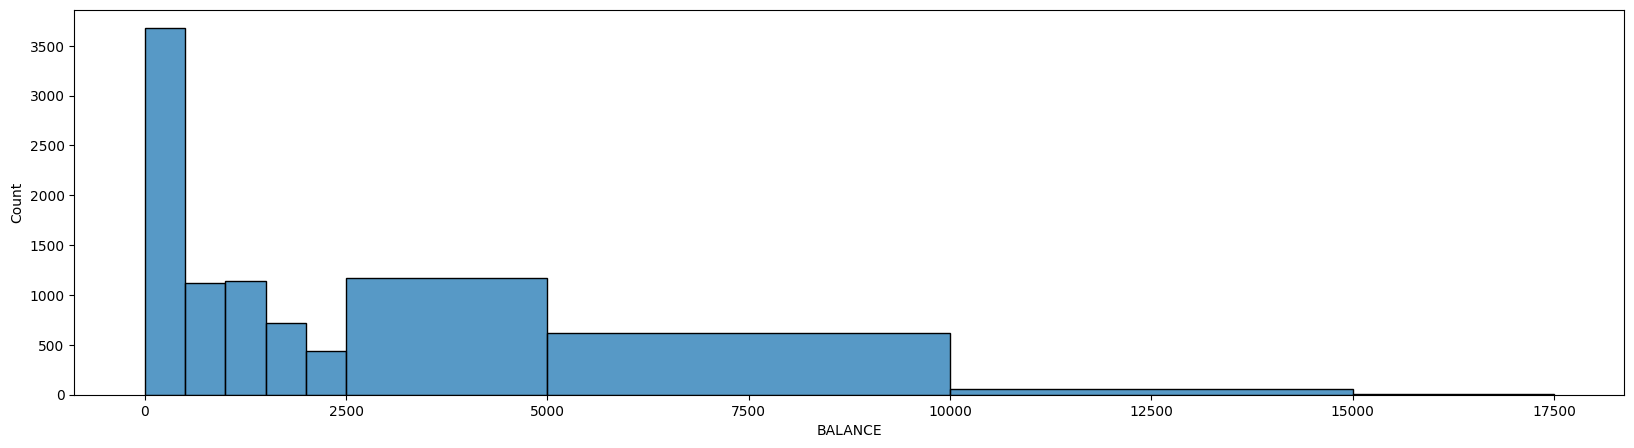

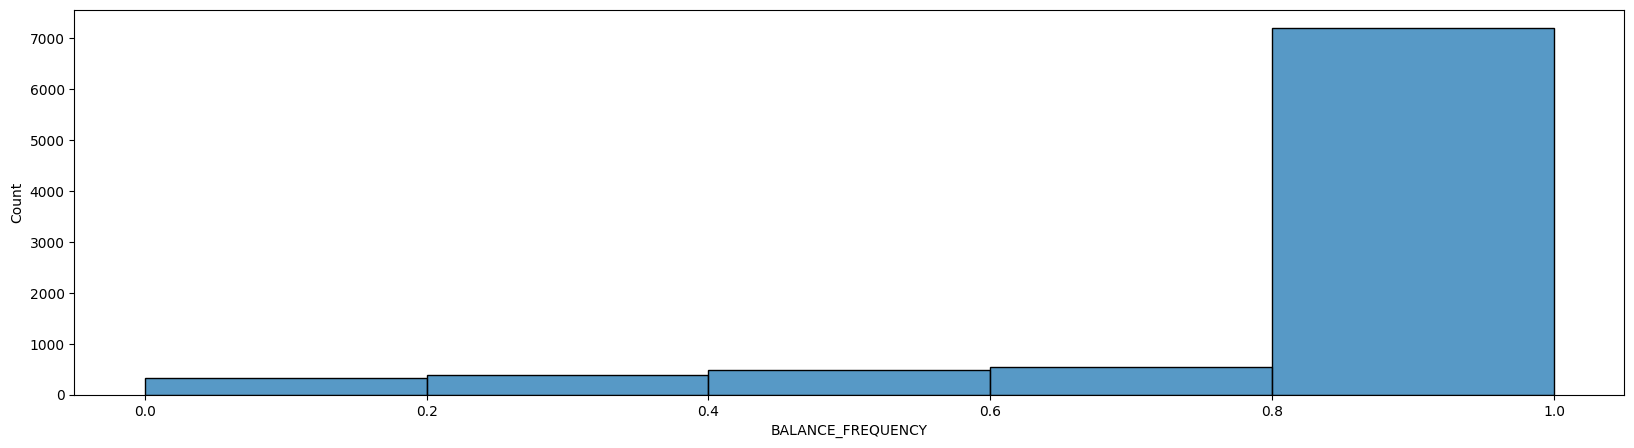

In [ ]:
# feel free to investigate what you want
import seaborn as sns
import matplotlib.pyplot as plt
col = ["BALANCE" ,"BALANCE_FREQUENCY" ]
bins = [[0,500,1000,1500,2000,2500 ,5000, 10000,15000 , 17500] , [0,0.2,0.4, 0.6,0.8 , 1] ]

for i in range(len(col)):
    plt.figure(figsize=(20,5))
    sns.histplot(data = df,x = col[i] , bins=bins[i])
    plt.show()

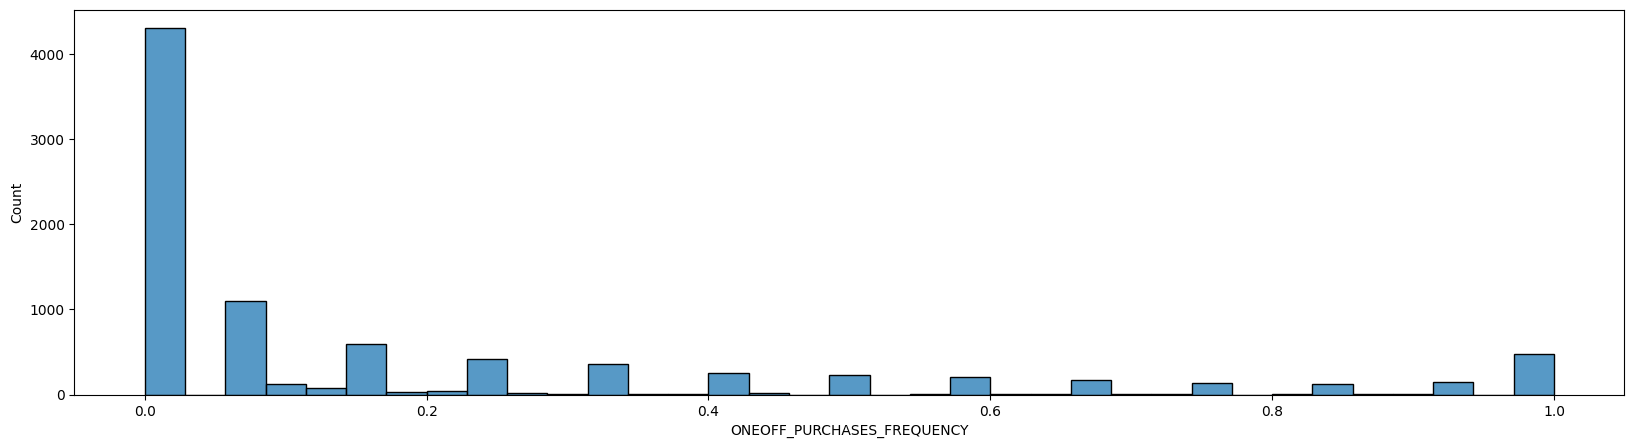

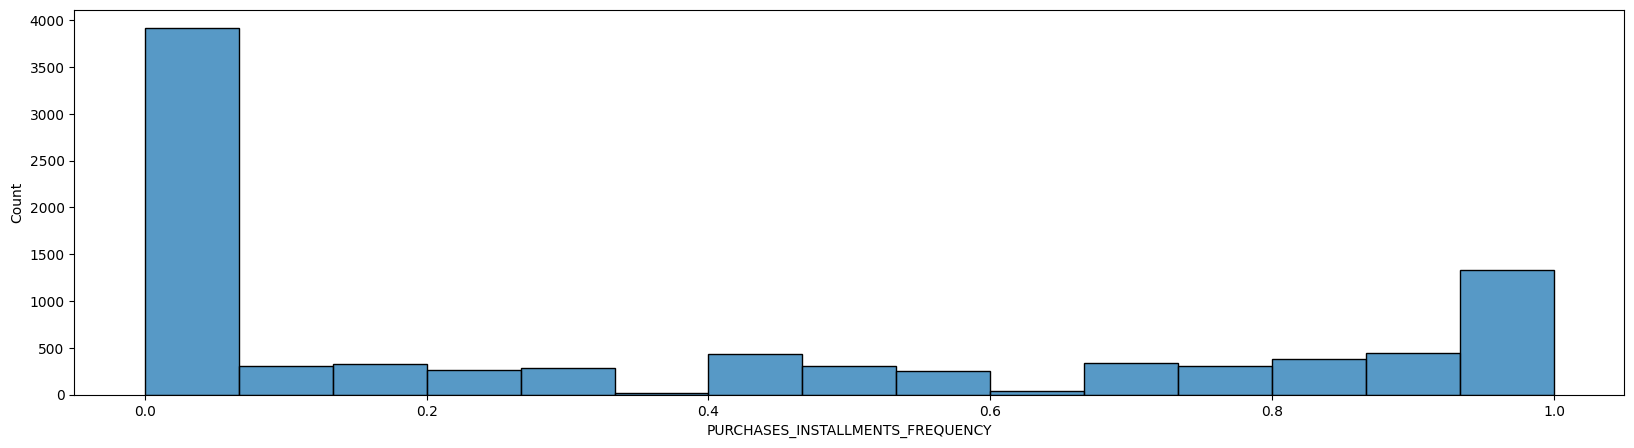

In [ ]:
col = ['ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']
for i in range(len(col)):
    plt.figure(figsize=(20,5))
    sns.histplot(data = df,x = col[i] )
    plt.show()

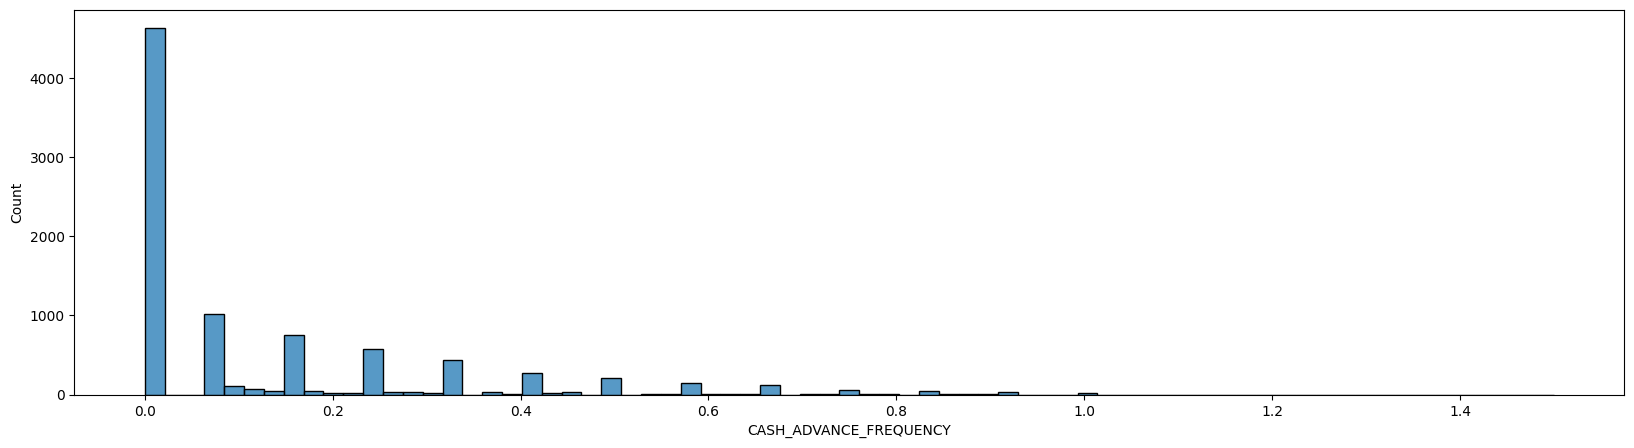

In [ ]:
col = ['CASH_ADVANCE_FREQUENCY']
for i in range(len(col)):
    plt.figure(figsize=(20,5))
    sns.histplot(data = df,x = col[i])
    plt.show()

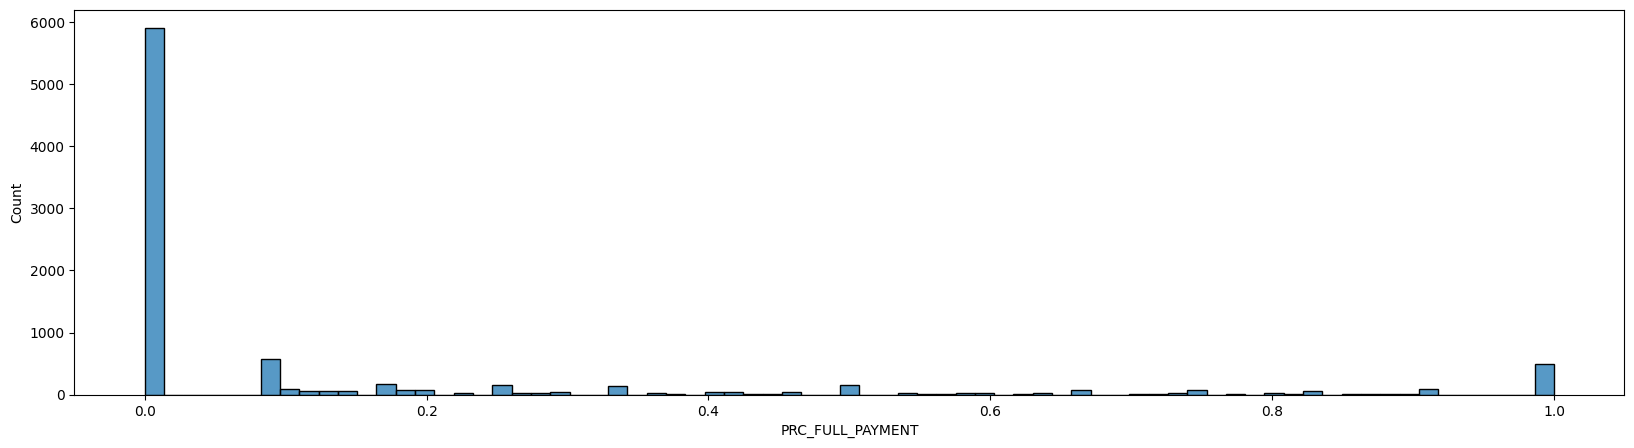

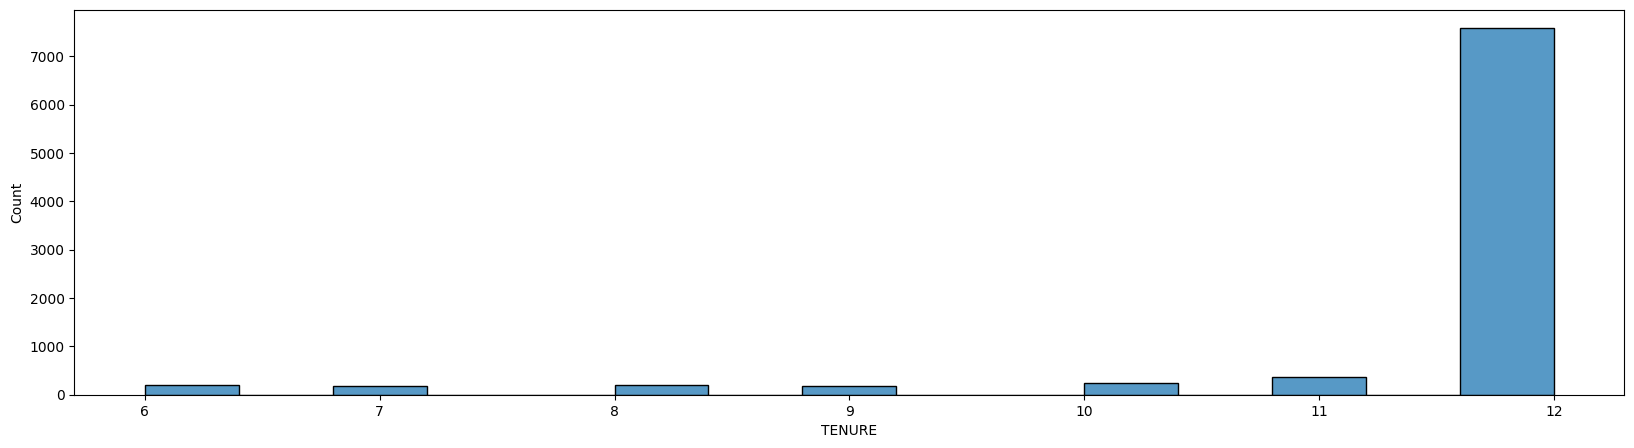

In [ ]:
col = ['PRC_FULL_PAYMENT','TENURE']
for i in range(len(col)):
    plt.figure(figsize=(20,5))
    sns.histplot(data = df,x = col[i])
    plt.show()

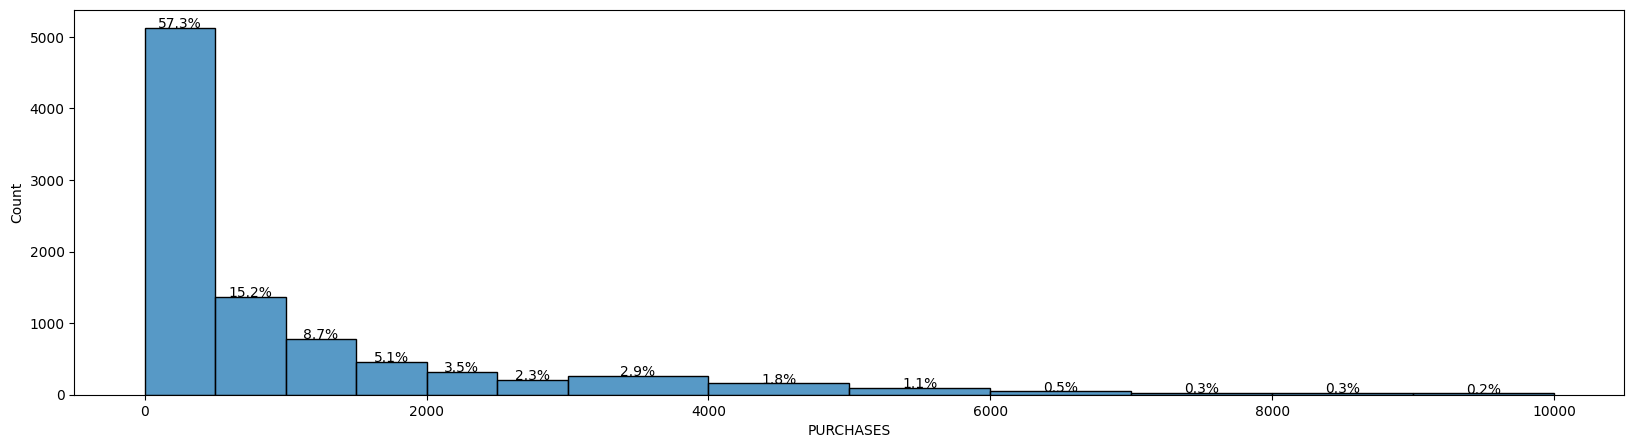

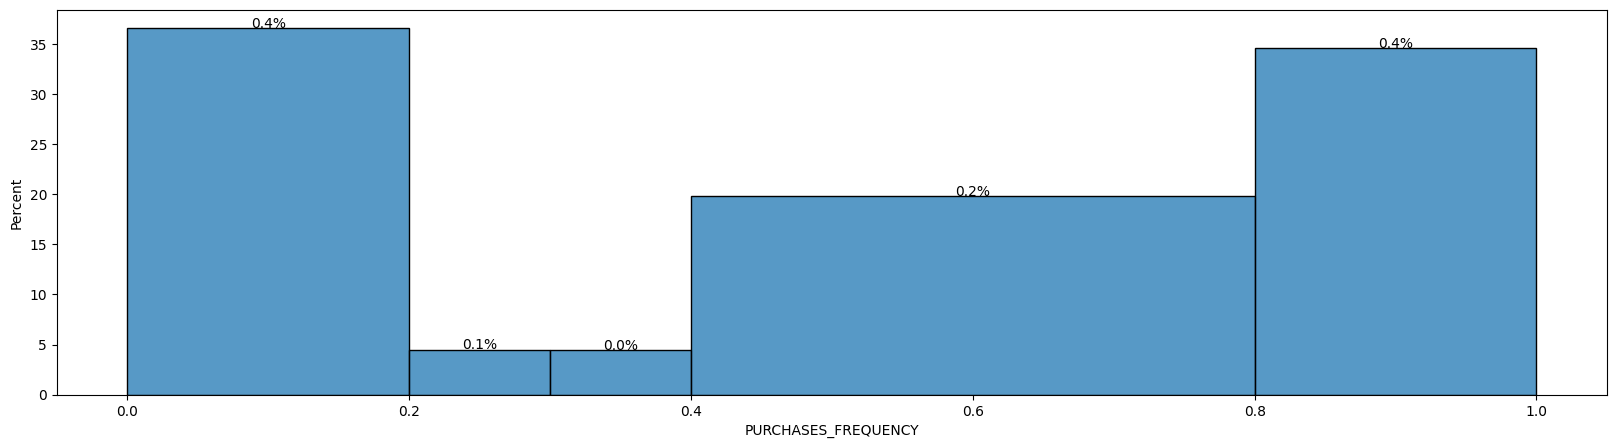

In [ ]:
col = ['PURCHASES', 'PURCHASES_FREQUENCY']
bins = [[0,500,1000,1500,2000,2500,3000,4000,5000,6000,7000 ,8000 ,9000,10000 ] , [0,0.2 ,0.3,0.4,0.8, 1] ]
stat = ['count' , 'percent']
for i in range(len(col)):
    plt.figure(figsize=(20,5))
    ax = sns.histplot(data = df,x = col[i] , bins=bins[i] , stat=stat[i] )

    total_count = len(df)

    patches = ax.patches
    for i in range(len(patches)):

        percentage = '{:.1f}%'.format(100 * (patches[i].get_height()/total_count))
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+.05
        ax.annotate(percentage, (x, y), ha='center')

    plt.show()

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

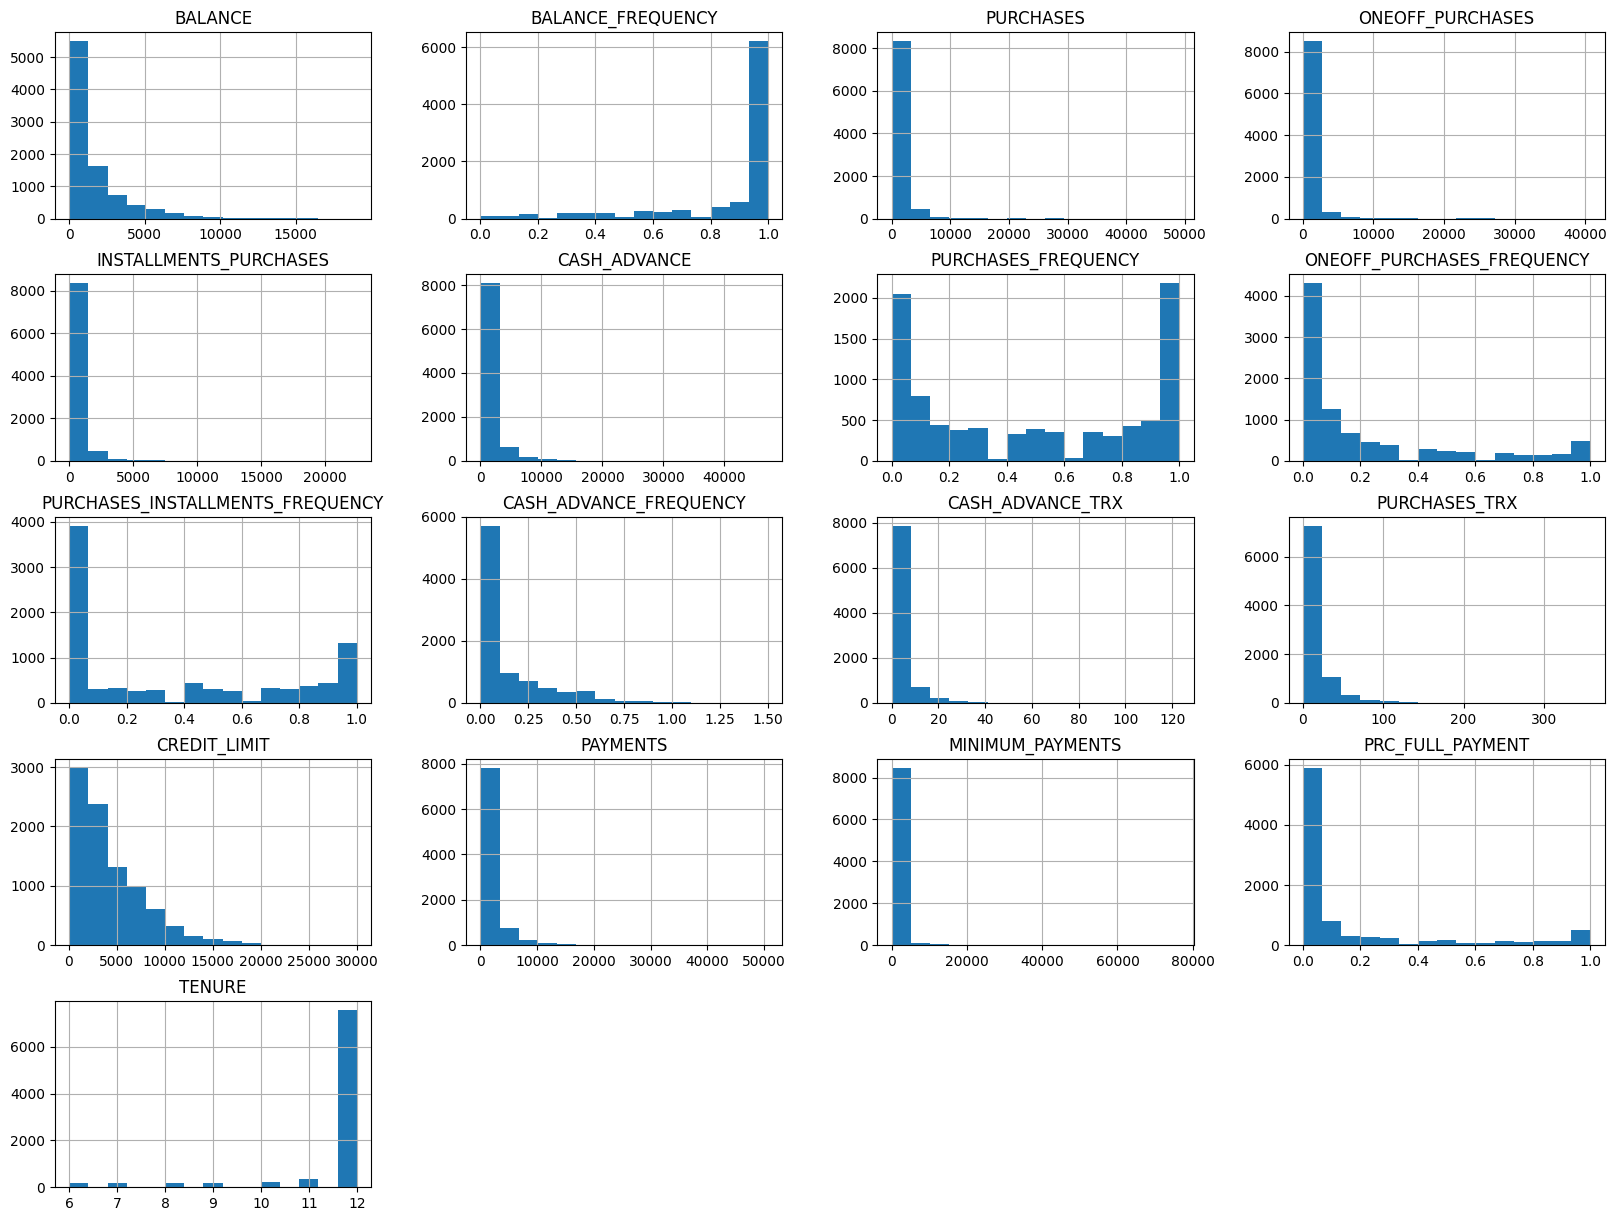

In [ ]:
df.hist(bins=15, figsize=(20, 15), layout=(5, 4))

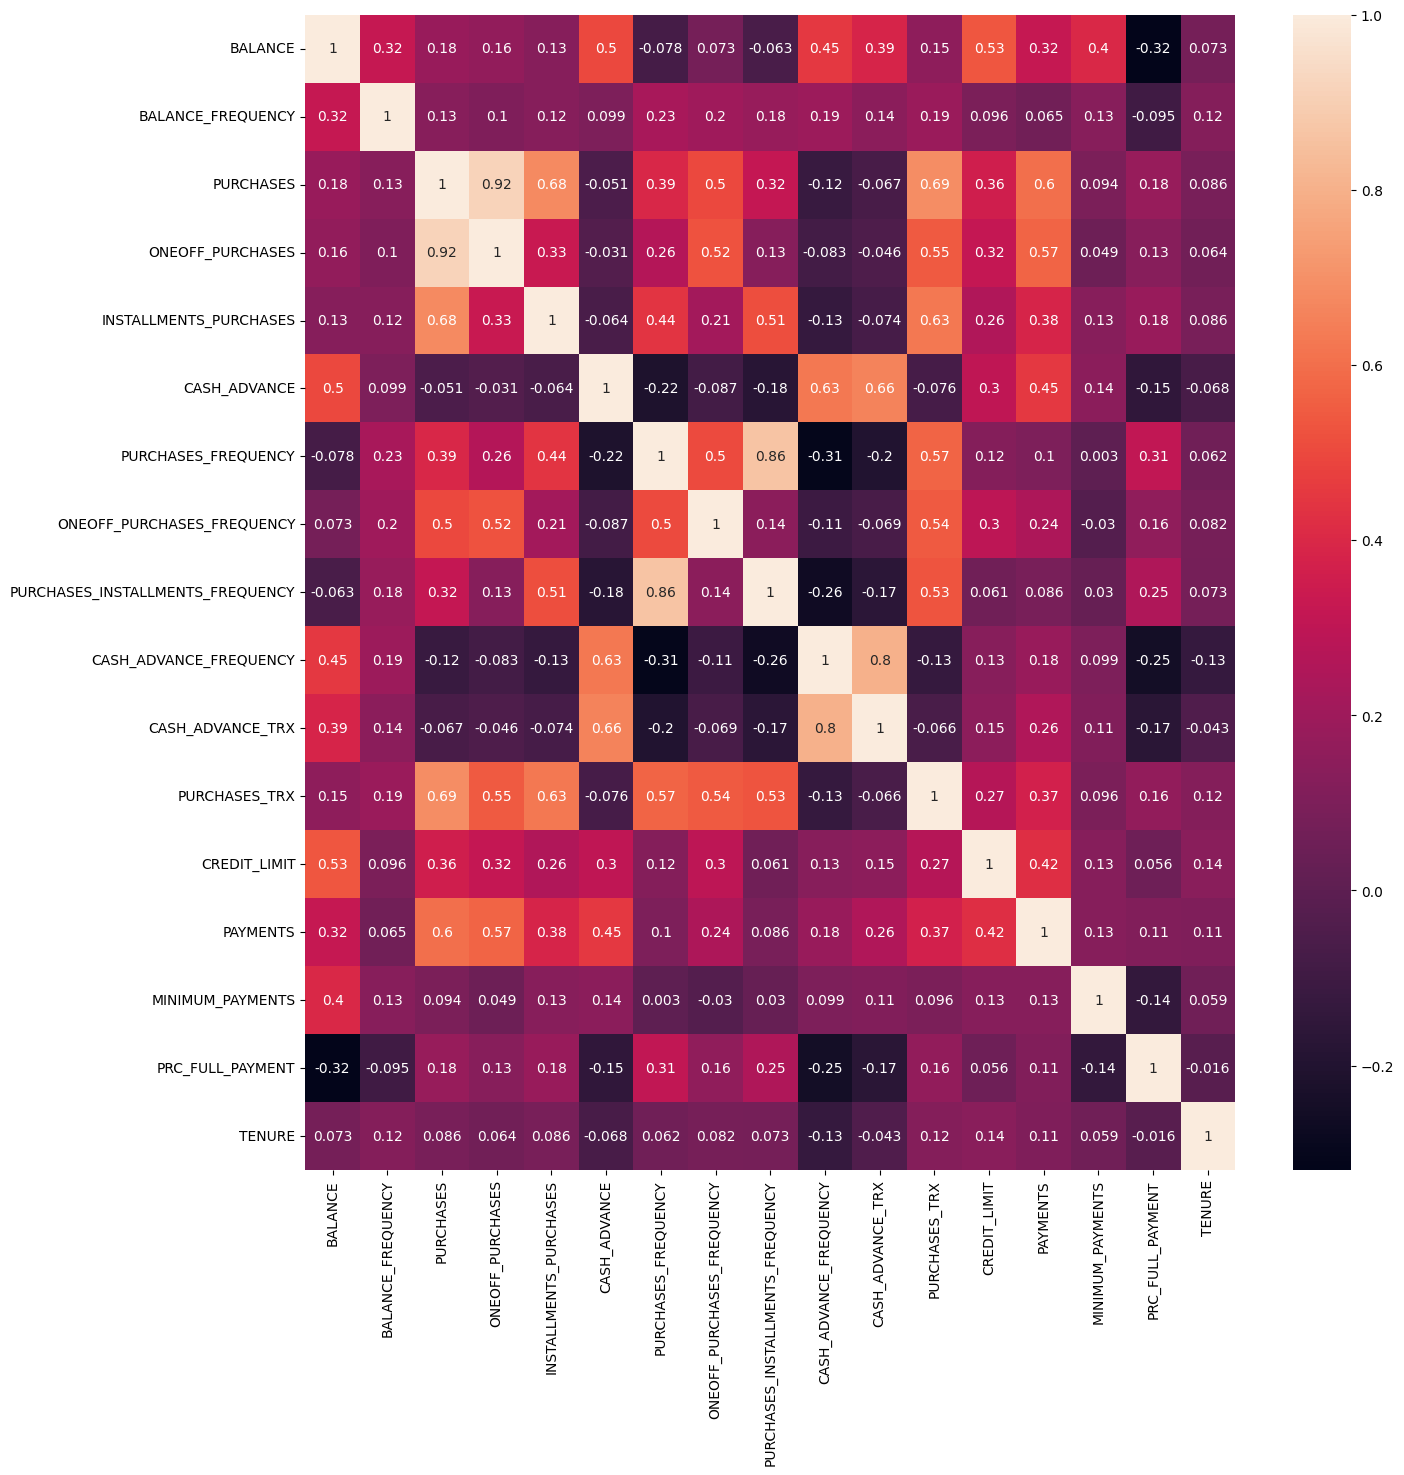

In [ ]:
plt.figure(figsize=(15,15))
corr_data = df.corr()
sns.heatmap(corr_data,annot=True)
plt.show()

In [ ]:
corr_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531283           0.095843   0.356963   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.398684           0.132569   0.093860   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319724                0.256499   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048755                0.132172   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303985             0.119788   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.140107             0.003030   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

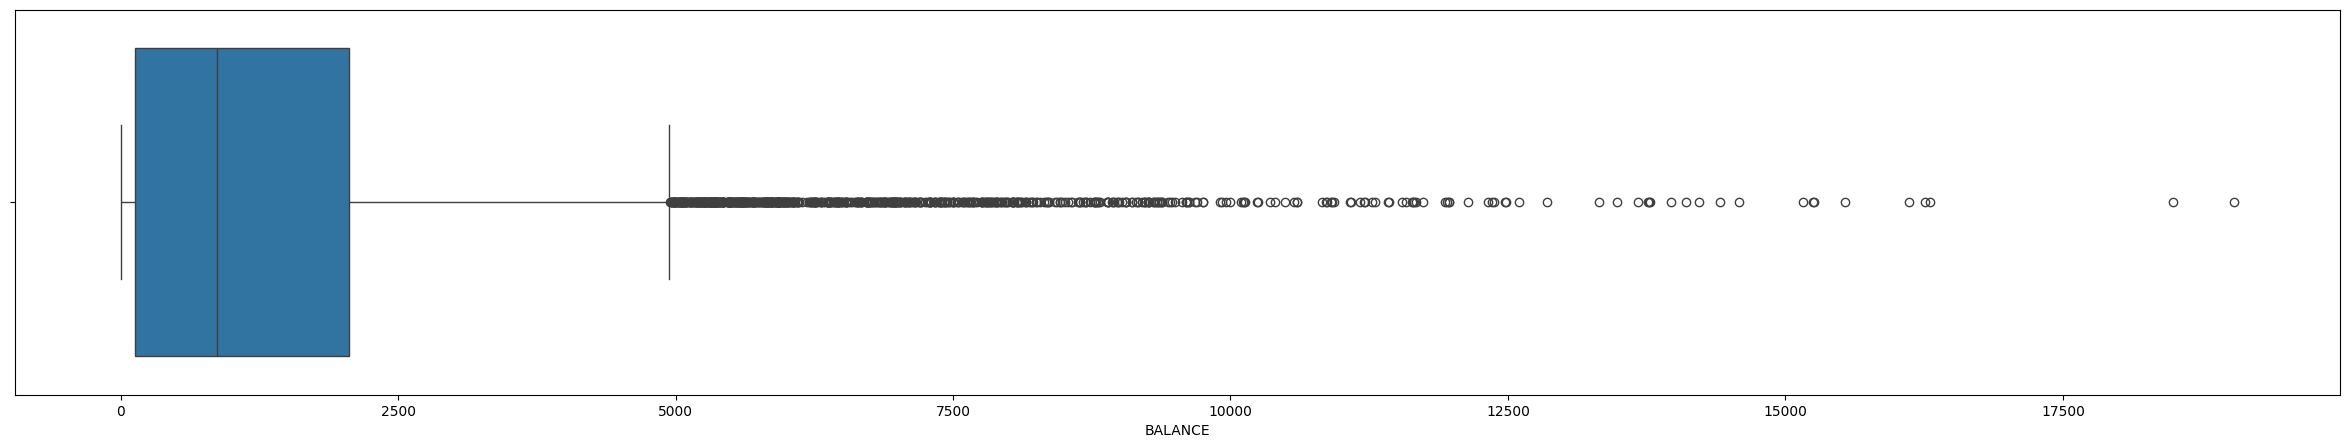

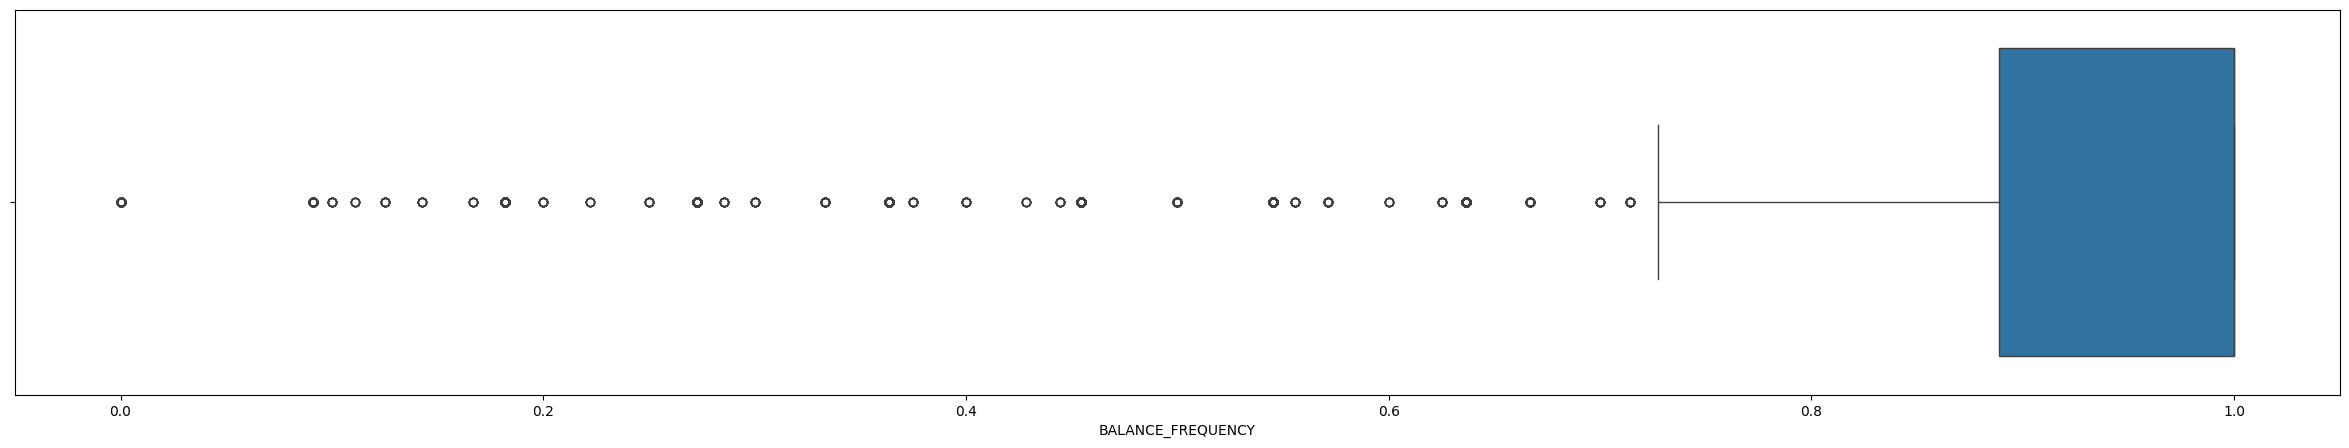

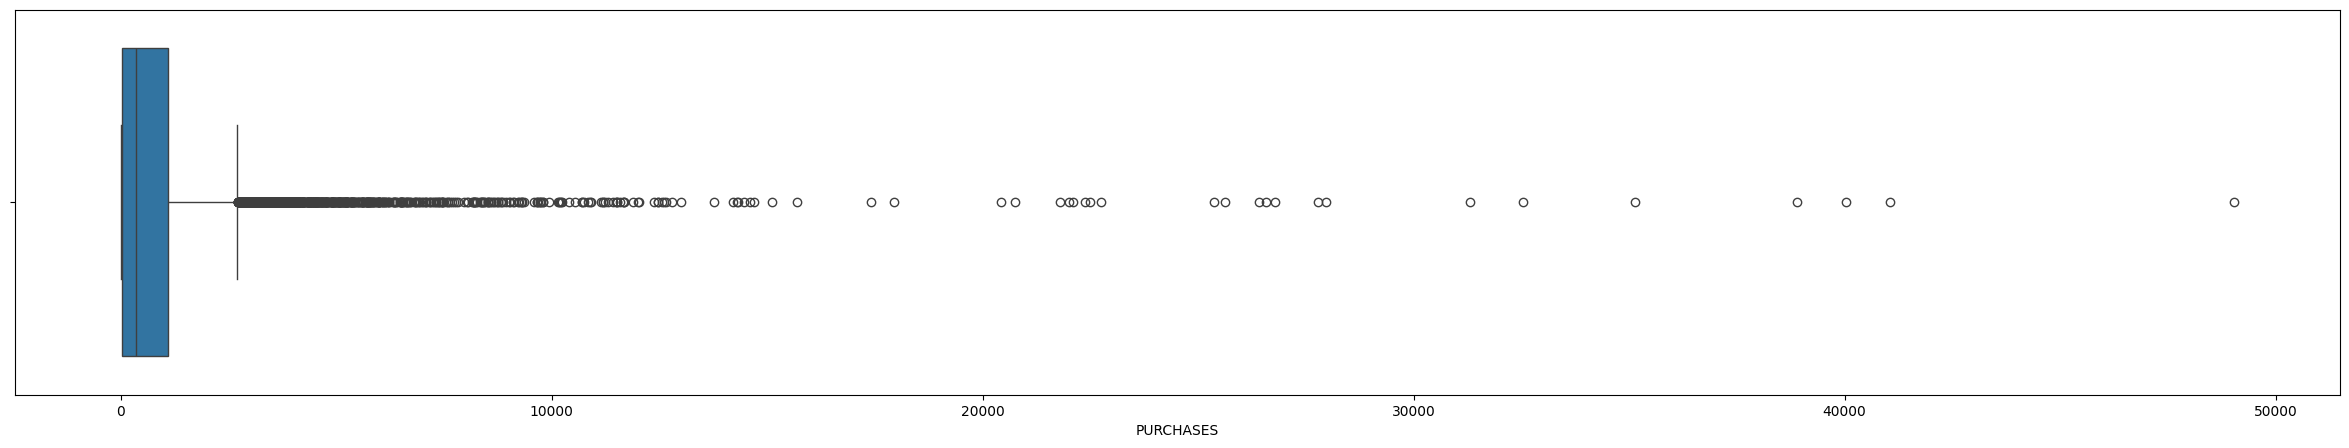

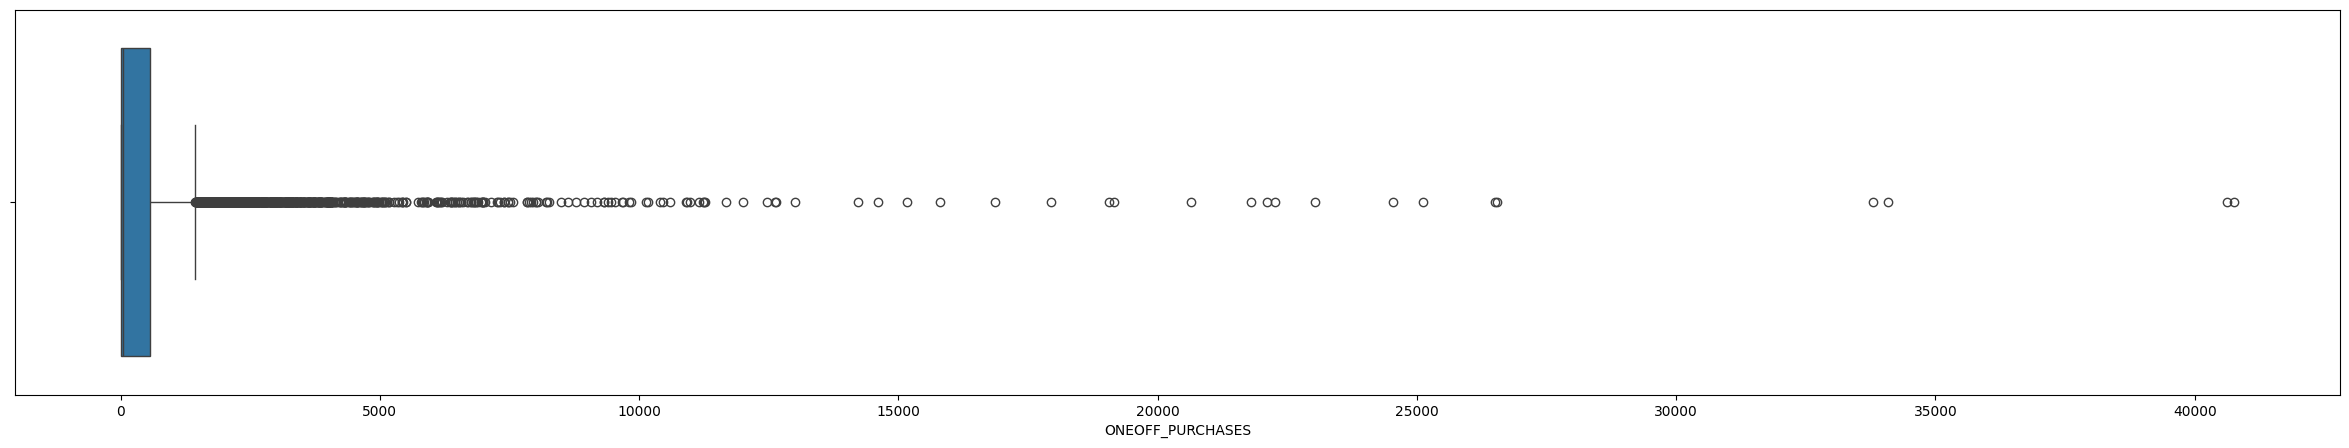

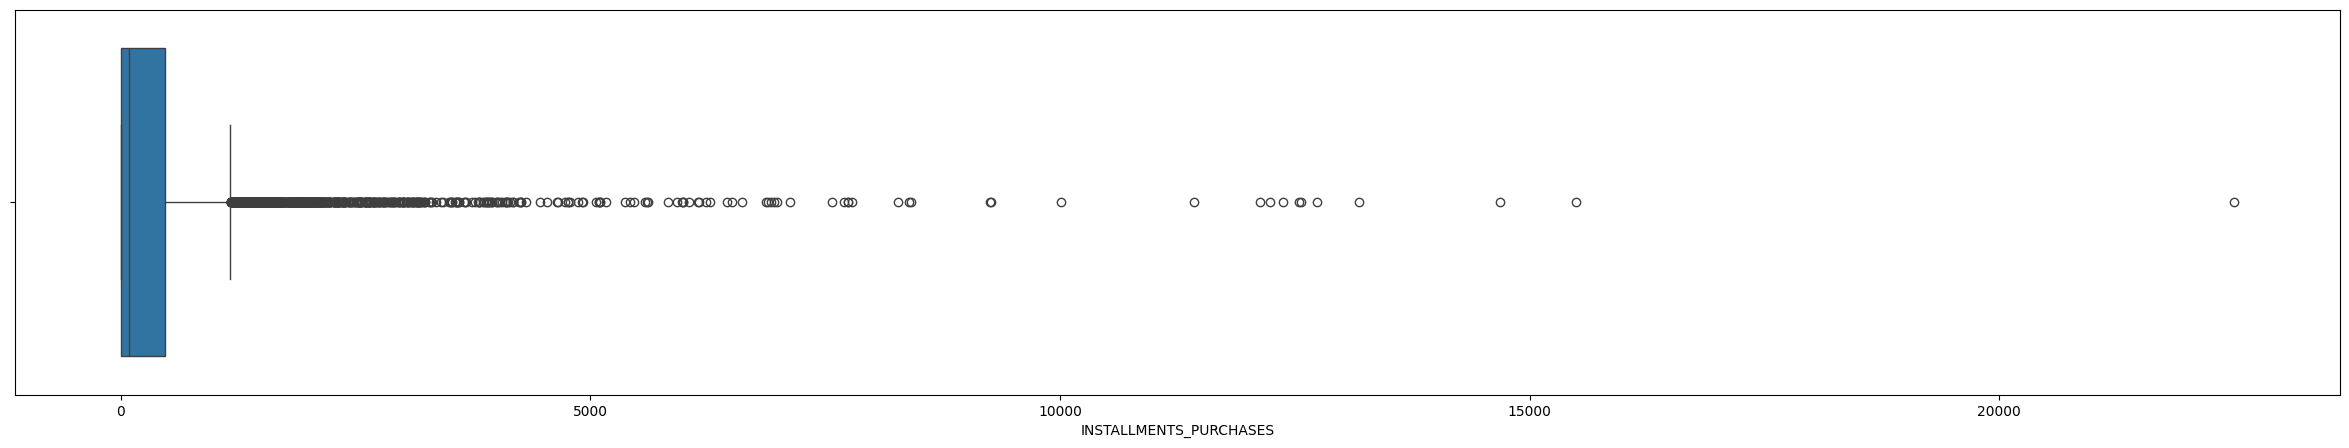

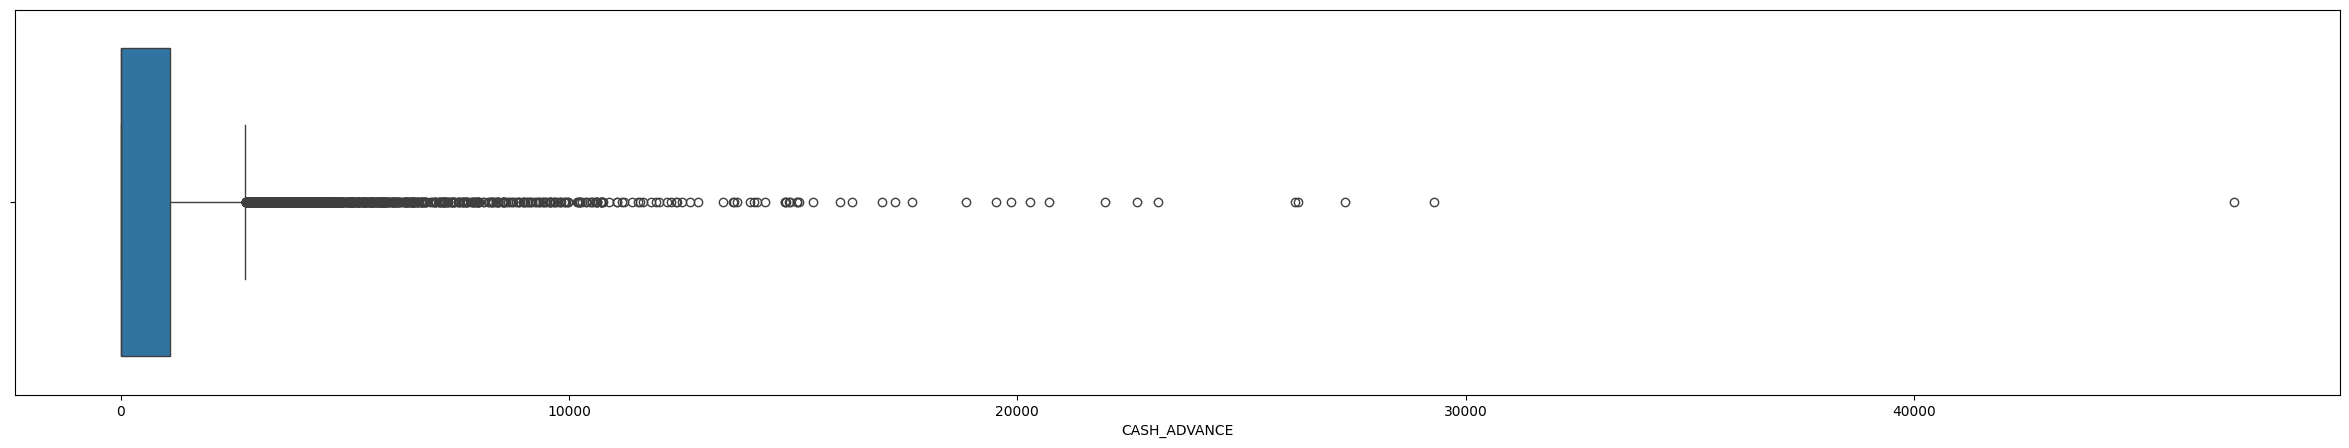

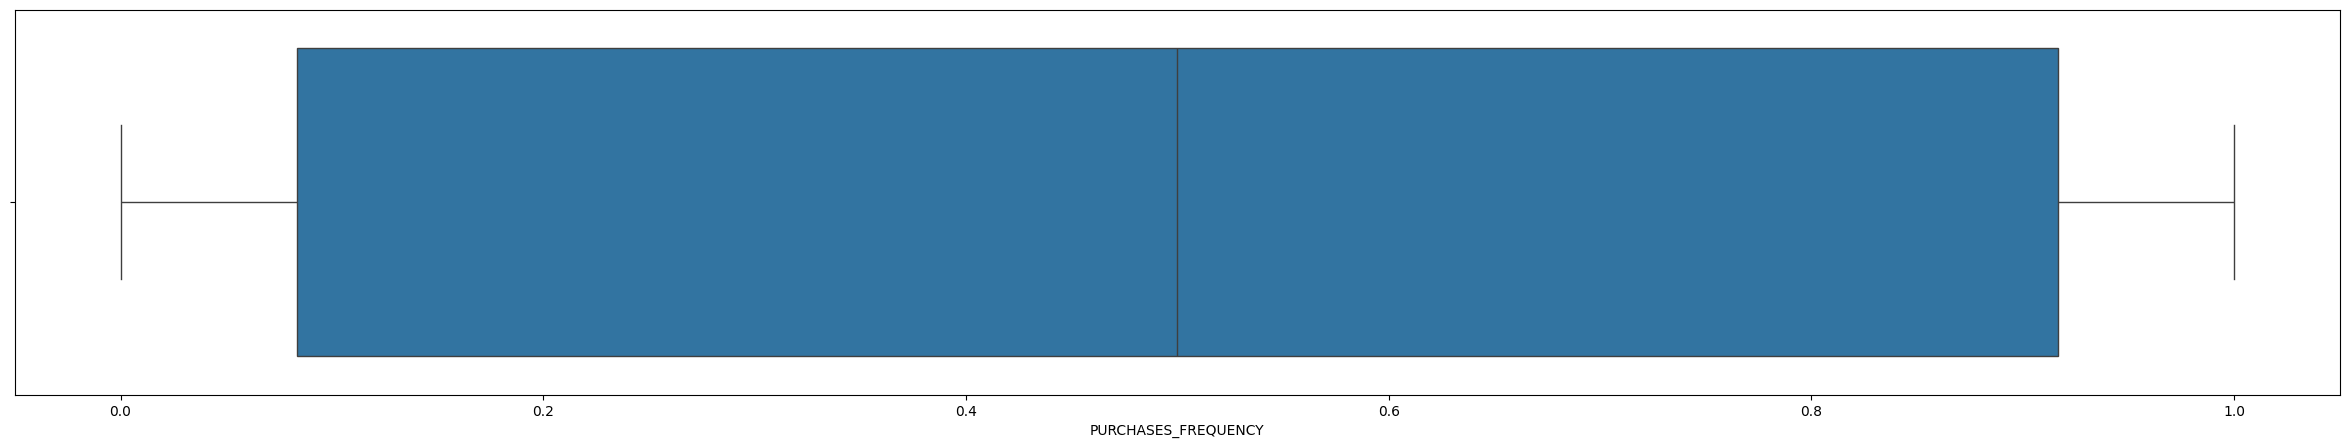

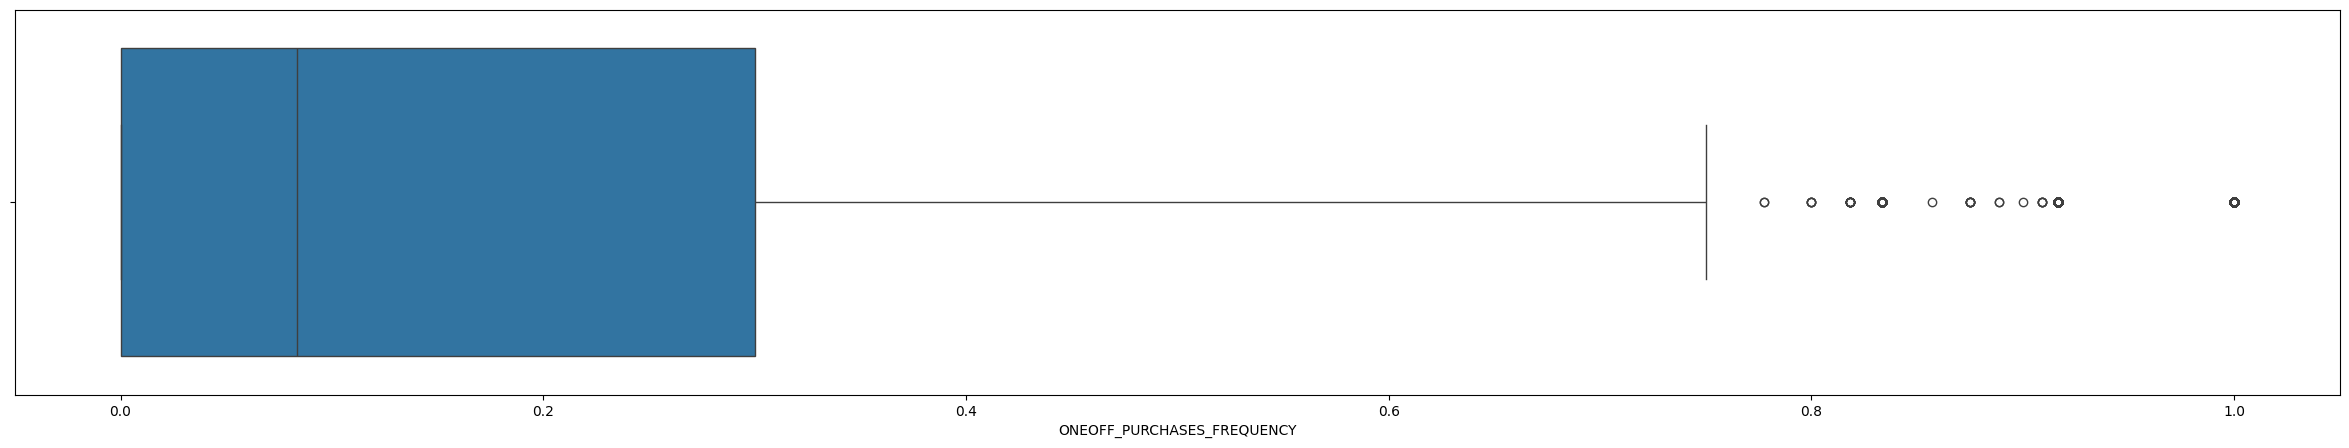

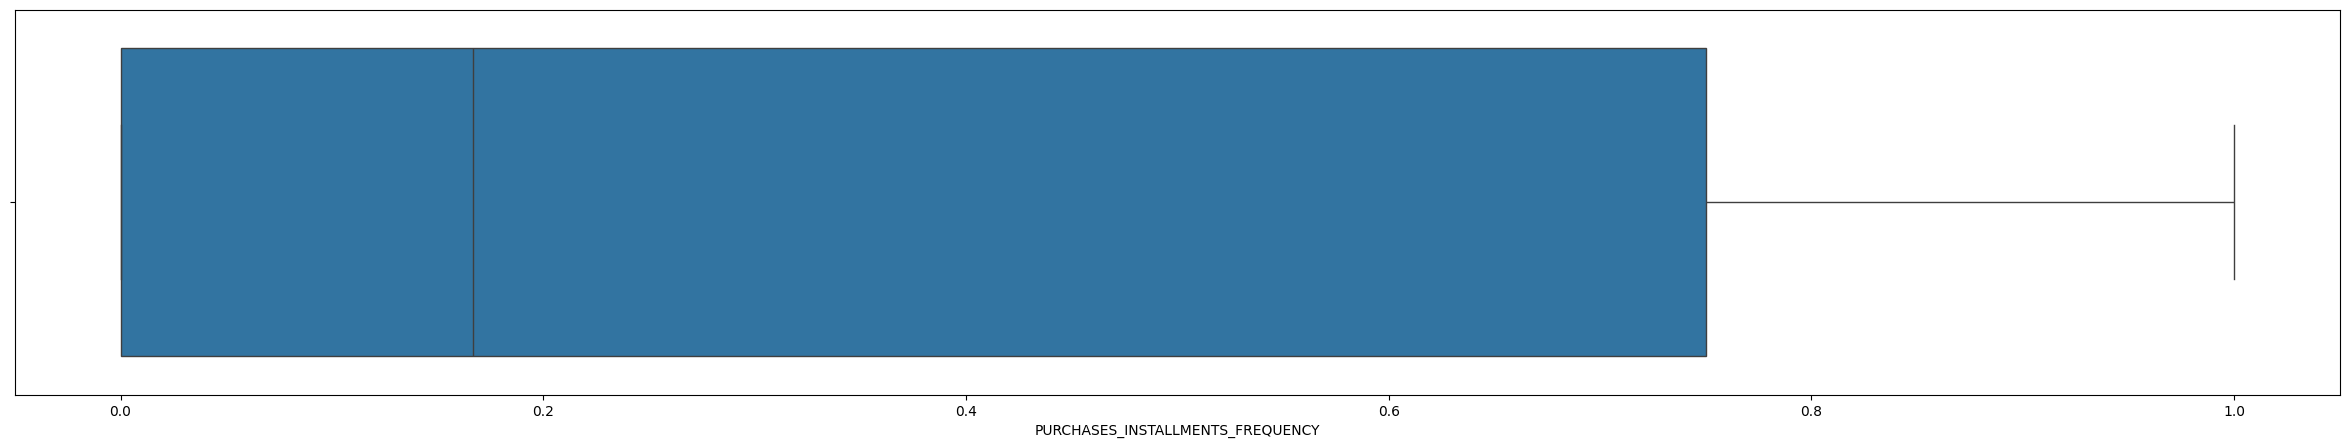

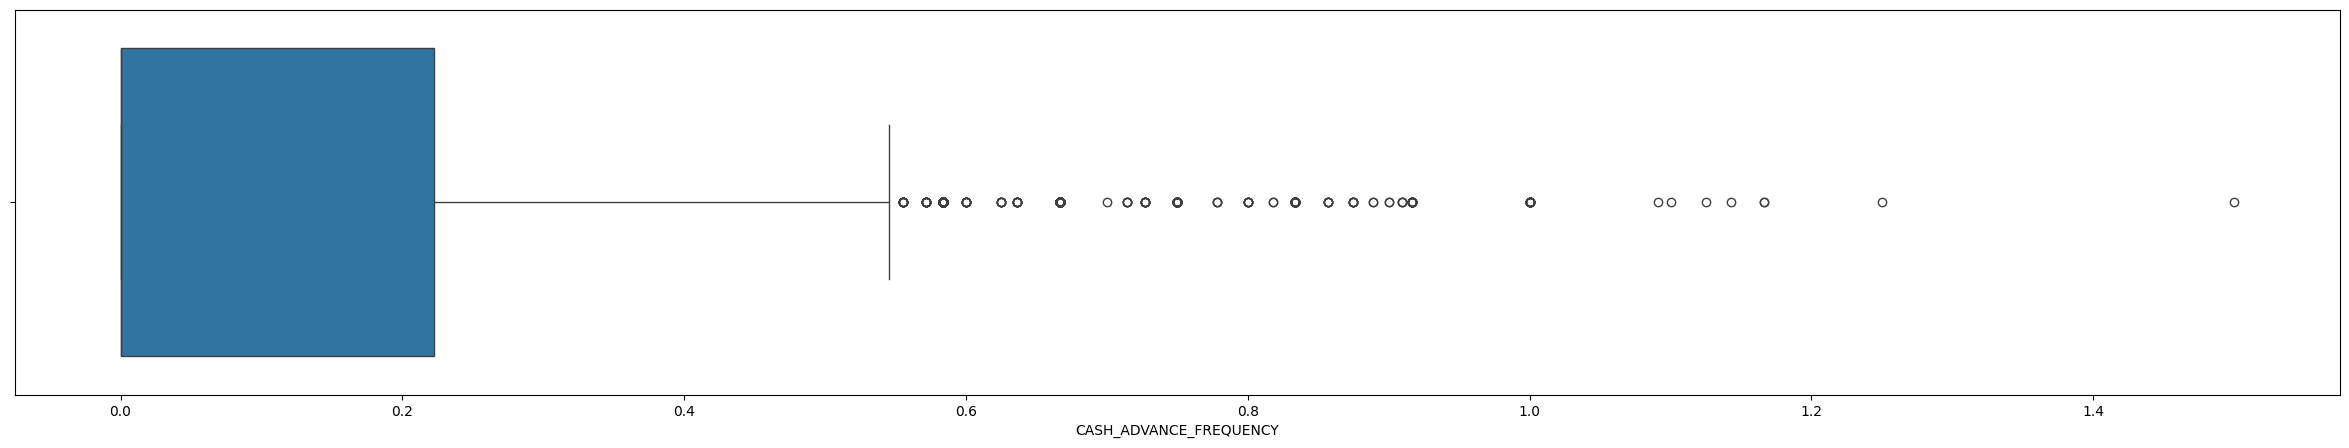

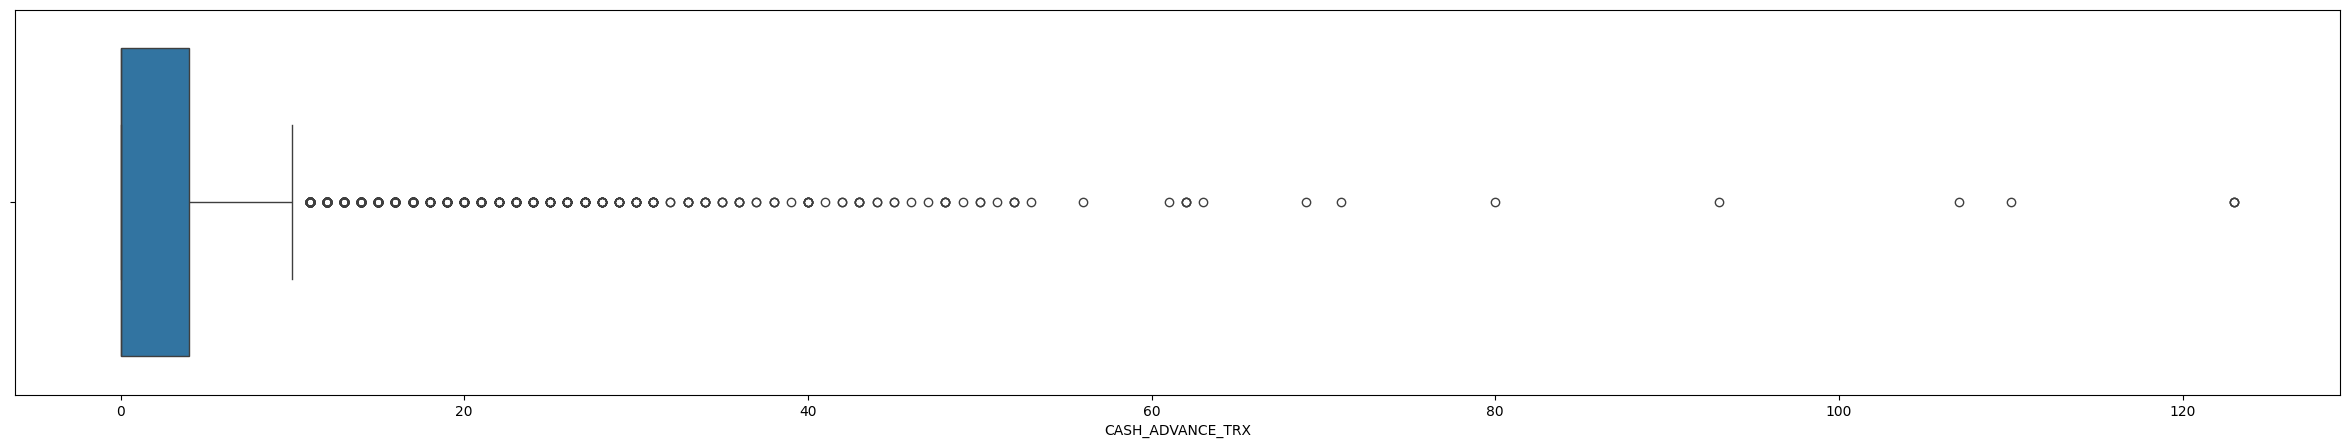

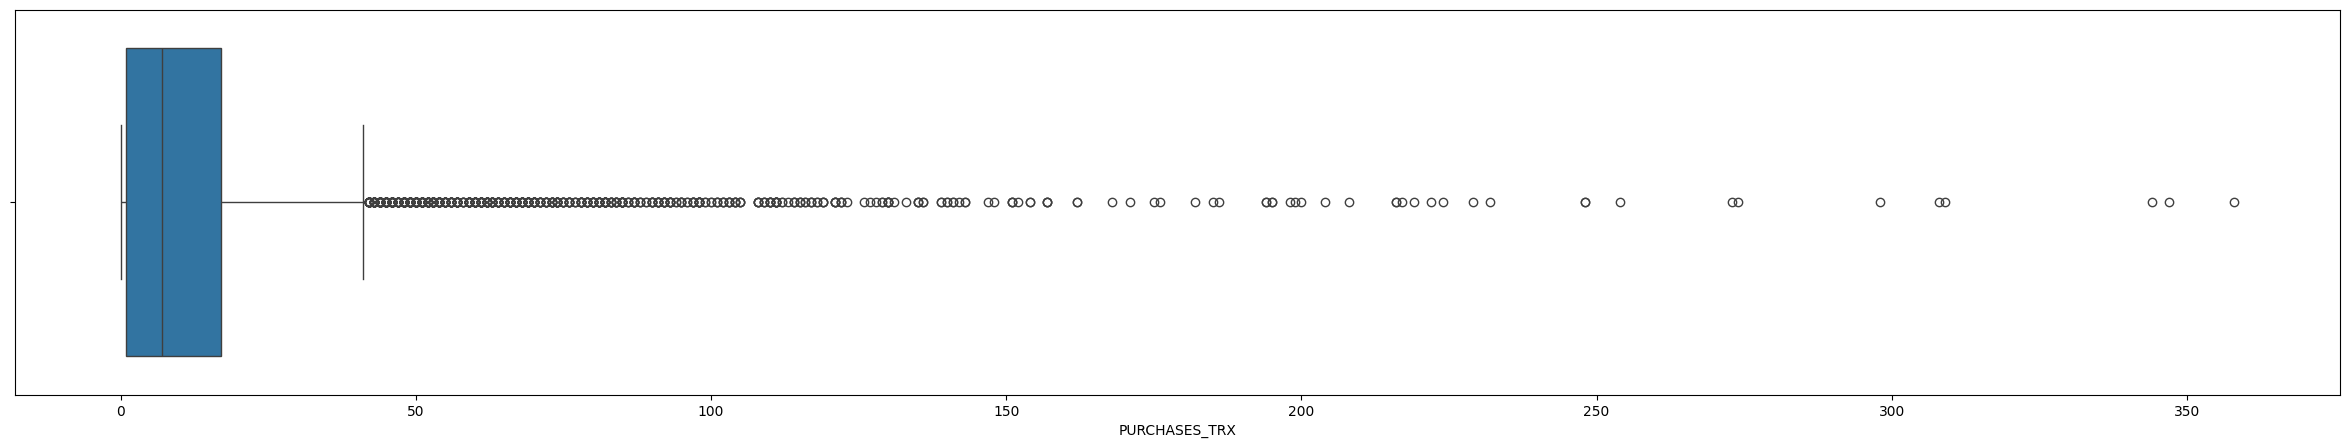

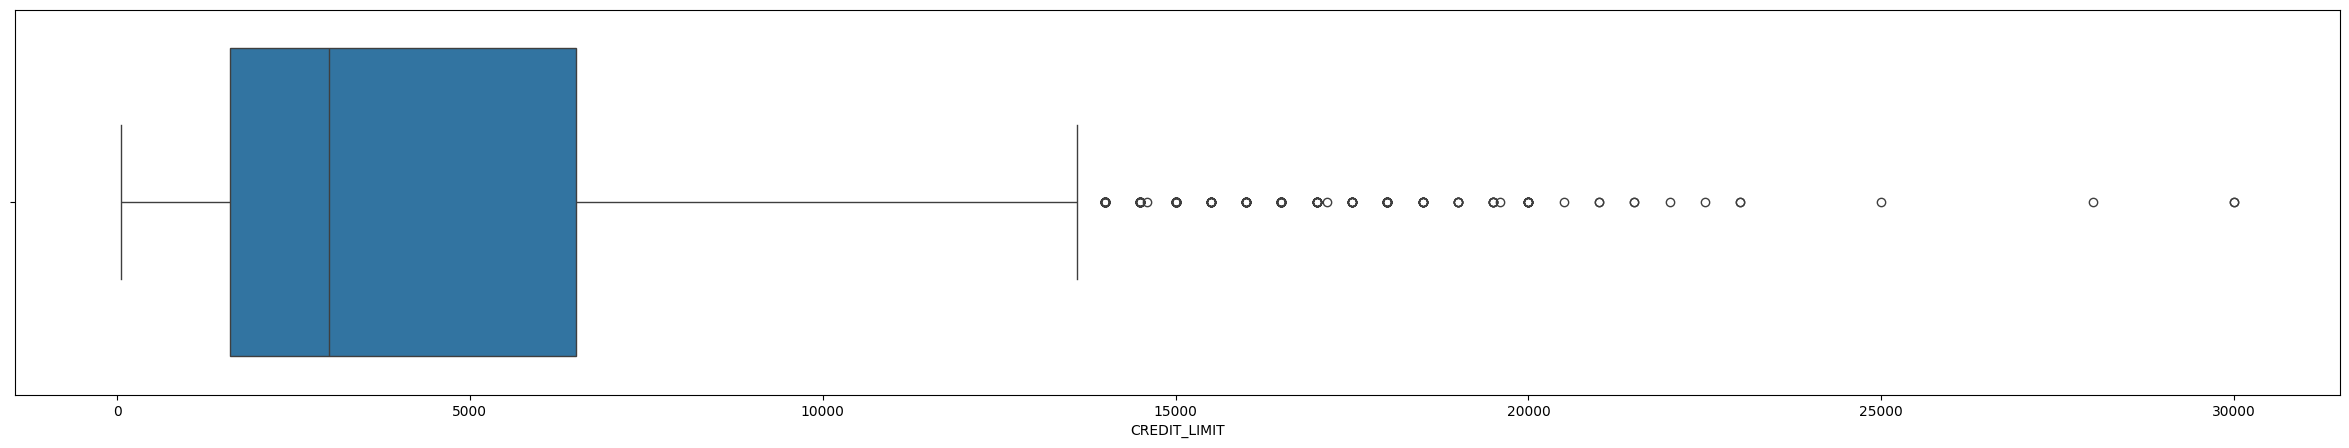

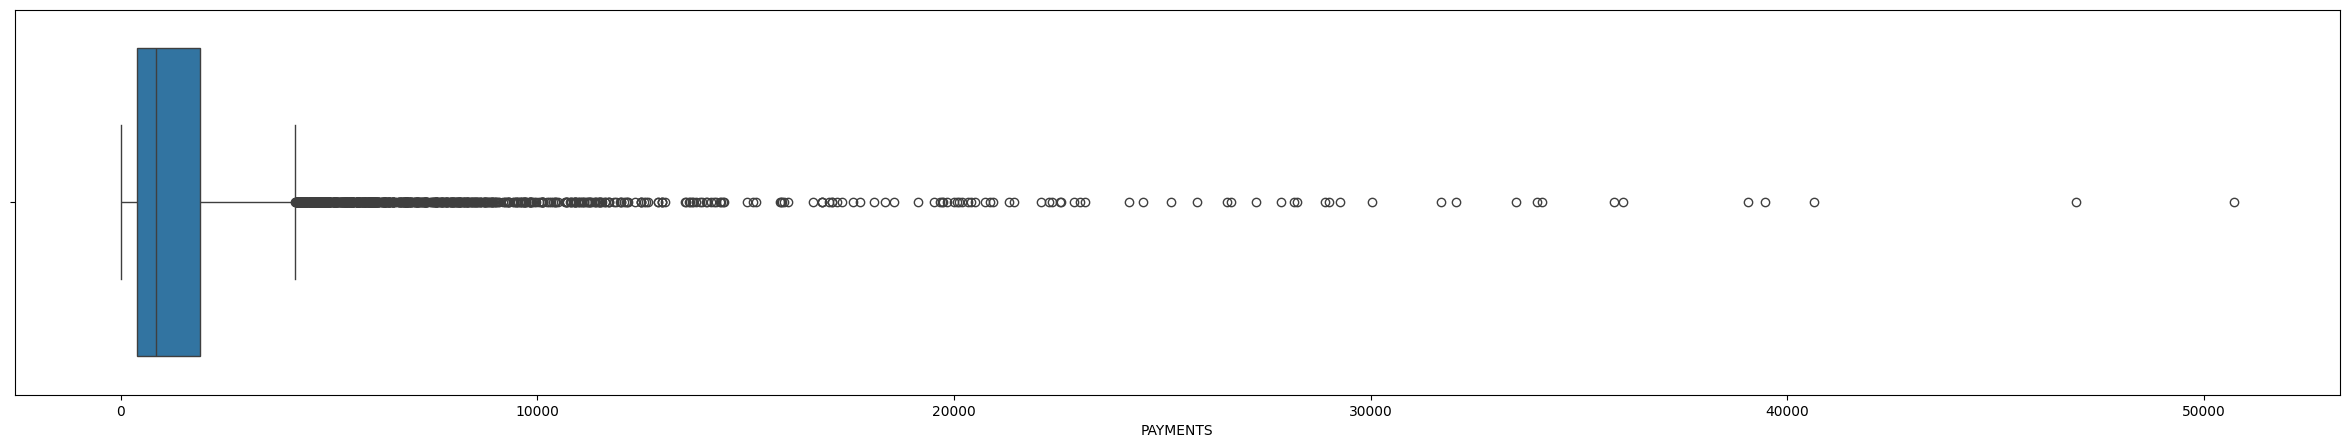

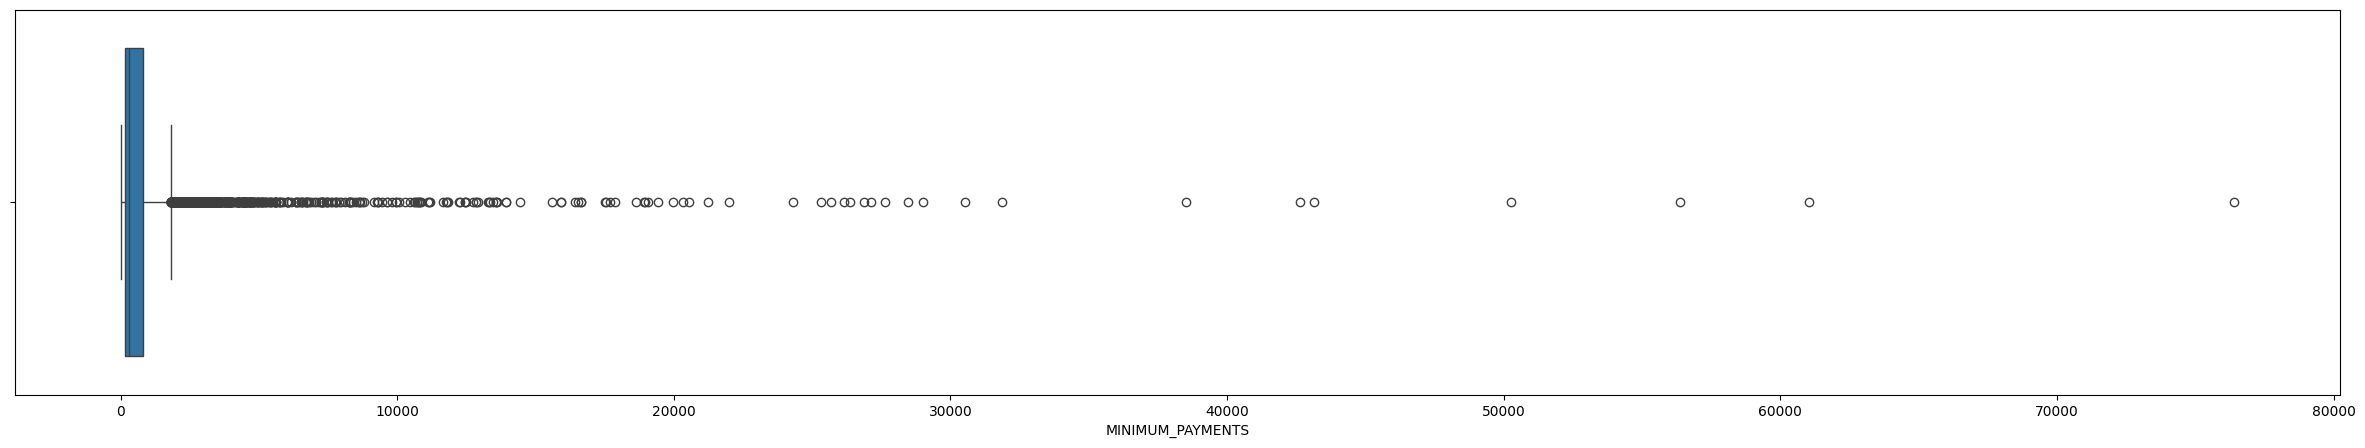

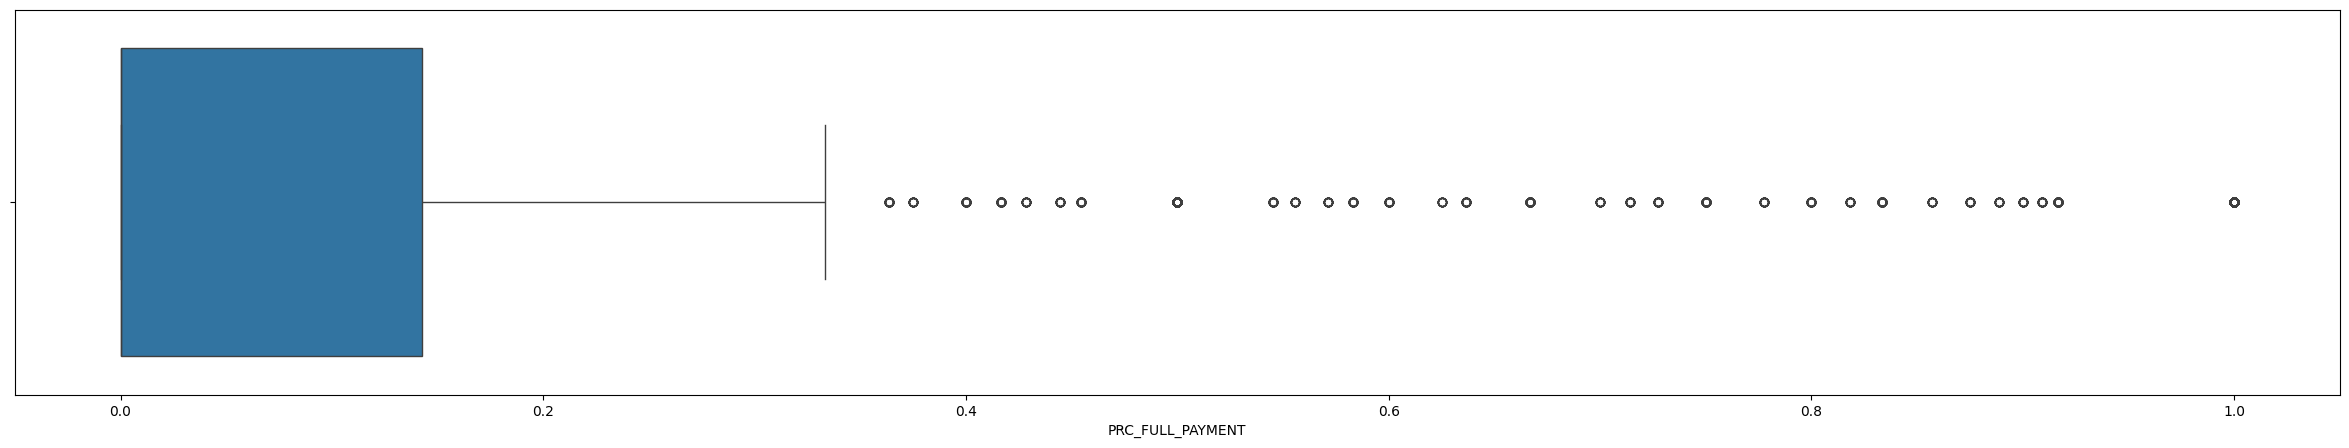

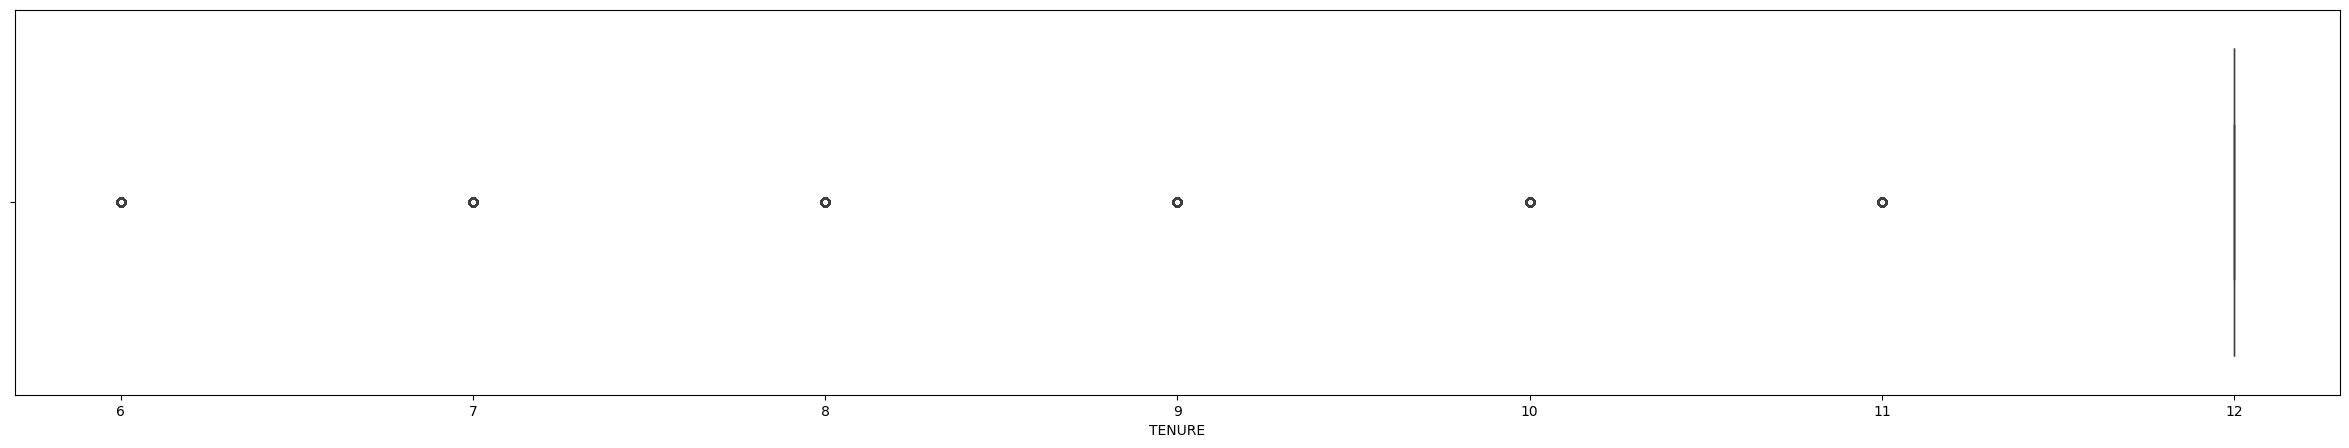

In [ ]:
for column in df.columns[1:]:
    plt.figure(figsize = (30,5))
    sns.boxplot(df[column] , orient='h')
    plt.show()

<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

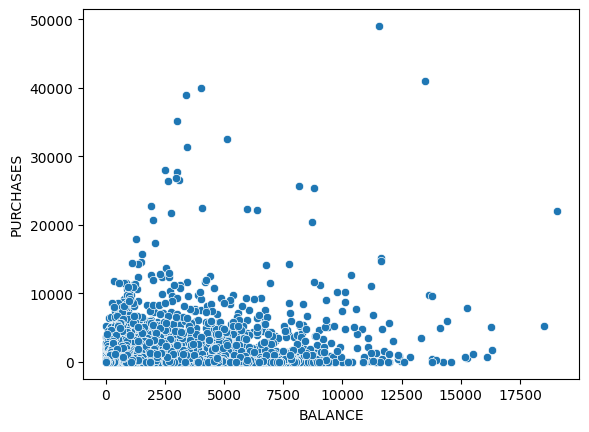

In [ ]:
sns.scatterplot(data=df , x='BALANCE' , y='PURCHASES')

<Axes: xlabel='CREDIT_LIMIT', ylabel='BALANCE'>

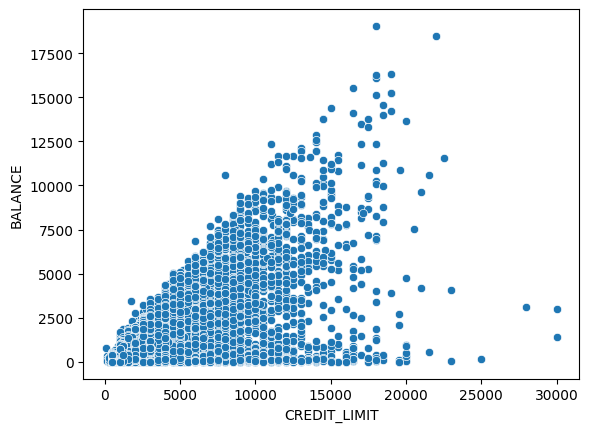

In [ ]:
sns.scatterplot(data=df , x='CREDIT_LIMIT' , y='BALANCE')

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-  Nulls <br>
2- cash advance Frequency greater than one <br>
3- outliers <br>
4- No need cusomer_id column , one_offpurchases , minimum payment    <br>

In [ ]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [ ]:
df_copy.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#solution
from sklearn.impute import KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors=2)

df_copy['MINIMUM_PAYMENTS'] = imputer.fit_transform(df_copy[['MINIMUM_PAYMENTS']])
df_copy['CREDIT_LIMIT'] = df_copy['CREDIT_LIMIT'].fillna(df_copy['CREDIT_LIMIT'].median())

In [ ]:
#test
df_copy.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Second issue**

In [ ]:
#solution
df_copy = df_copy[df_copy['CASH_ADVANCE_FREQUENCY']<=1]
df_copy.reset_index(drop=True, inplace=True)

In [ ]:
#test
df_copy

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8937  C19186    28.493517           1.000000     291.12              0.00   
8938  C19187    19.183215           1.000000     300.00              0.00   
8939  C19188    23.398673           0.833333     144.40              0.00   
8940  C19189    13.457564           0.833333       0.00              0.00   
8941  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8937                  291.12      0.000000             1.000000   
8938                  300.00      0.000000             1.000000   
8939                  144.40      0.000000             0.833333   
8940                    0.00     36.558778             0.000000   
8941                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8937                    0.000000                          0.833333   
8938                    0.000000                          0.833333   
8939                    0.000000                          0.666667   
8940                    0.000000                          0.000000   
8941                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8937                0.000000                 0              6        1000.0   
8938                0.000000                 0              6        1000.0   
8939                0.000000                 0              5        1000.0   
8940                0.166667                 2              0         500.0   
8941                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8937   325.594462         48.886365  

**Third issue**

In [ ]:
#handel outliers
columns_of_interest = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
dfnew = df_copy.copy()

for column in columns_of_interest:
    Q1 = df_copy[column].quantile(0.01)
    Q3 = df_copy[column].quantile(0.99)
    IQR = Q3 - Q1
    dfnew = dfnew[(dfnew[column] >= Q1 - 1.5*IQR) & (dfnew[column] <= Q3 + 1.5*IQR)]


In [ ]:
dfnew.reset_index(drop=True, inplace=True)

In [ ]:
dfnew_copy_original = dfnew.copy()

**Fourth issue**

In [ ]:
# solution
dfnew.drop('CUST_ID' ,  axis=1 , inplace=True)
dfnew.drop('ONEOFF_PURCHASES' ,  axis=1 , inplace=True)
dfnew.drop('MINIMUM_PAYMENTS' ,  axis=1 , inplace=True)

In [ ]:
#test
dfnew.reset_index(drop=True, inplace=True)

In [ ]:
dfnew_copy = dfnew.copy()

In [ ]:
df_copy.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
dfnew

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0       40.900749           0.818182      95.40                   95.40   
1     3202.467416           0.909091       0.00                    0.00   
2     2495.148862           1.000000     773.17                    0.00   
3     1666.670542           0.636364    1499.00                    0.00   
4      817.714335           1.000000      16.00                    0.00   
...           ...                ...        ...                     ...   
8912    28.493517           1.000000     291.12                  291.12   
8913    19.183215           1.000000     300.00                  300.00   
8914    23.398673           0.833333     144.40                  144.40   
8915    13.457564           0.833333       0.00                    0.00   
8916   372.708075           0.666667    1093.25                    0.00   

      CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0         0.000000             0.166667                    0.000000   
1      6442.945483             0.000000                    0.000000   
2         0.000000             1.000000                    1.000000   
3       205.788017             0.083333                    0.083333   
4         0.000000             0.083333                    0.083333   
...            ...                  ...                         ...   
8912      0.000000             1.000000                    0.000000   
8913      0.000000             1.000000                    0.000000   
8914      0.000000             0.833333                    0.000000   
8915     36.558778             0.000000                    0.000000   
8916    127.040008             0.666667                    0.666667   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0                             0.083333                0.000000   
1                             0.000000                0.250000   
2                             0.000000                0.000000   
3                             0.000000                0.083333   
4                             0.000000                0.000000   
...                                ...                     ...   
8912                          0.833333                0.000000   
8913                          0.833333                0.000000   
8914                          0.666667                0.000000   
8915                          0.000000                0.166667   
8916                          0.000000                0.333333   

      CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                    0              2        1000.0   201.802084   
1                    4              0        7000.0  4103.032597   
2                    0             12        7500.0   622.066742   
3                    1              1        7500.0     0.000000   
4                    0              1        1200.0   678.334763   
...                ...            ...           ...          ...   
8912                 0              6        1000.0   325.594462   
8913                 0              6        1000.0   275.861322   
8914                 0              5        1000.0    81.270775   
8915                 2              0         500.0    52.549959   
8916                 2             23        1200.0    63.165404   

      PRC_FULL_PAYMENT  TENURE  
0             0.000000      12  
1             0.222222      12  
2             0.000000      12  
3             0.000000      12  
4             0.000000      12  
...                ...     ...  
8912          0.500000       6  
8913          0.000000       6  
8914          0.250000       6  
8915          0.250000       6  
8916          0.000000       6  

[8917 rows x 15 columns]

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


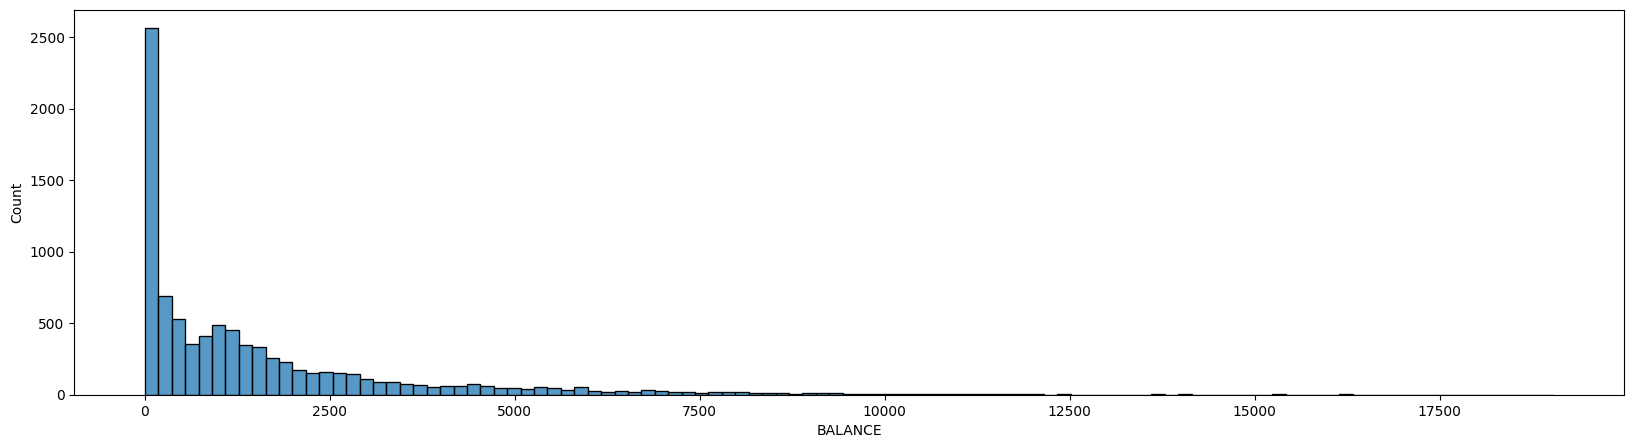

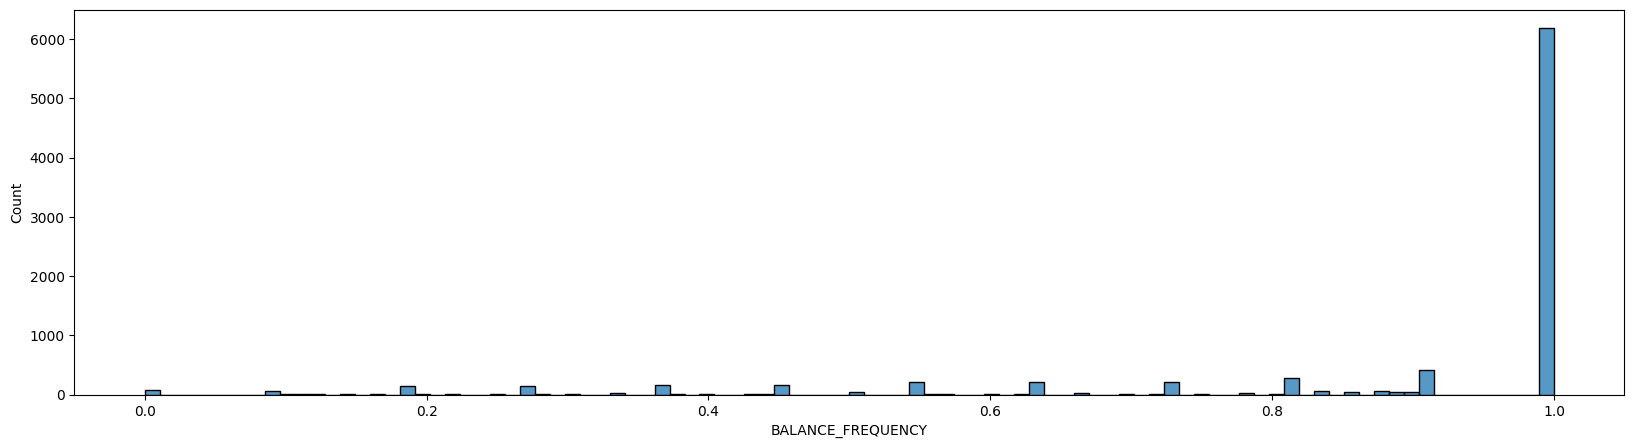

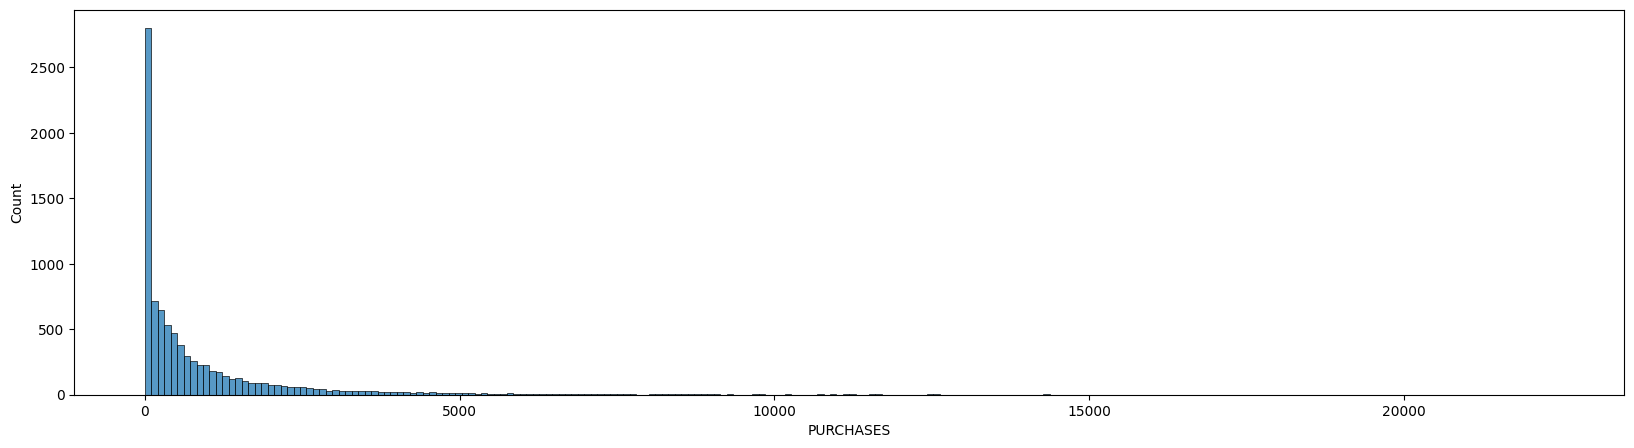

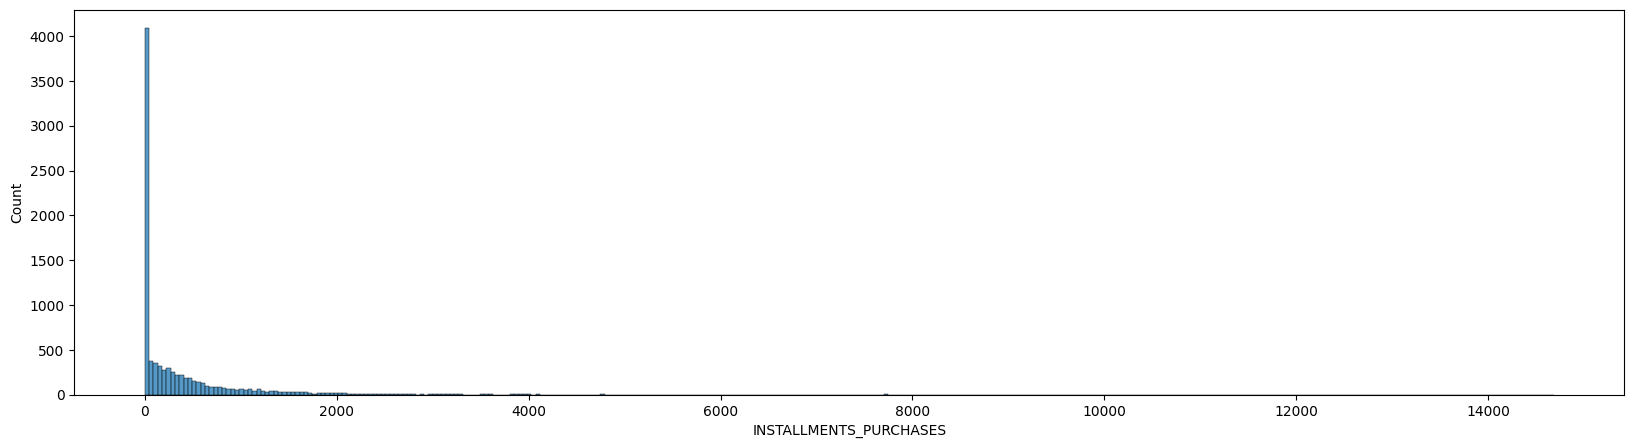

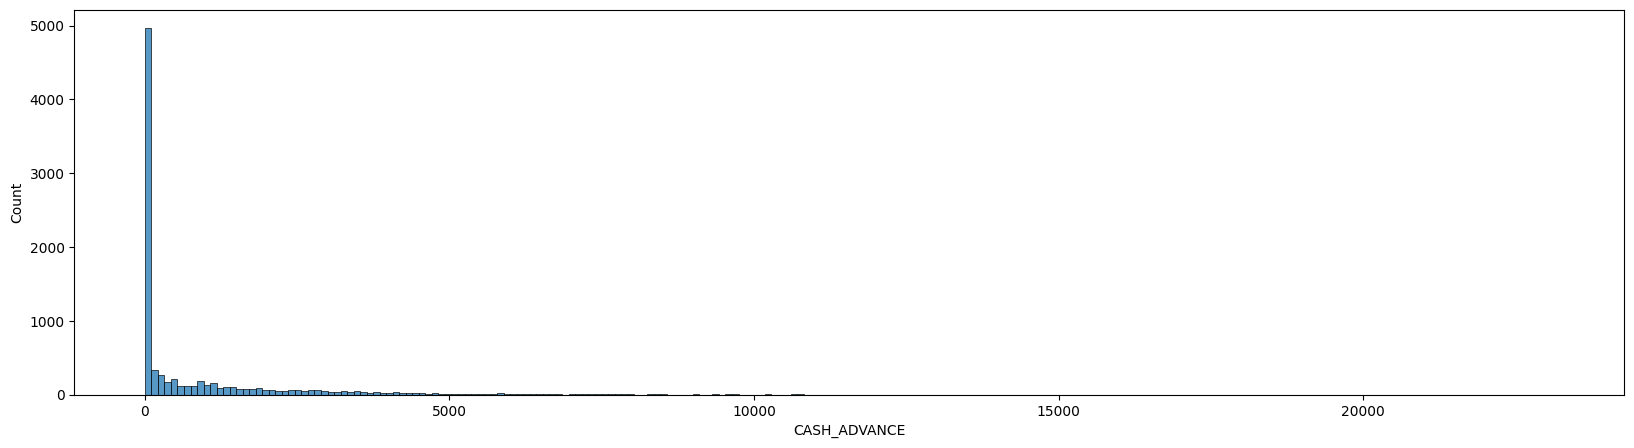

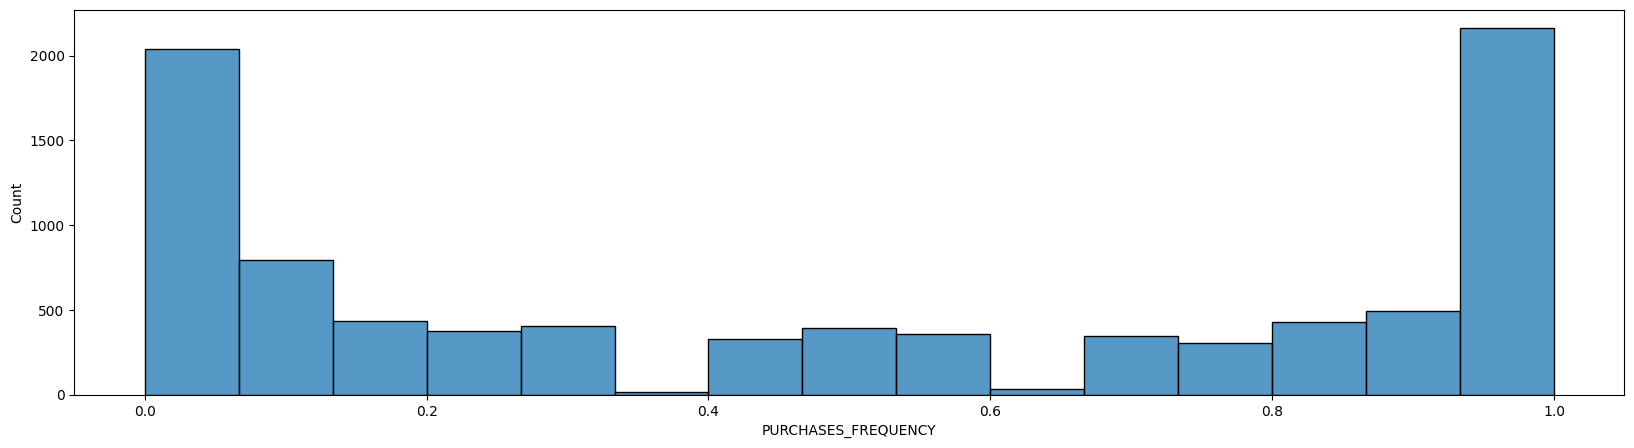

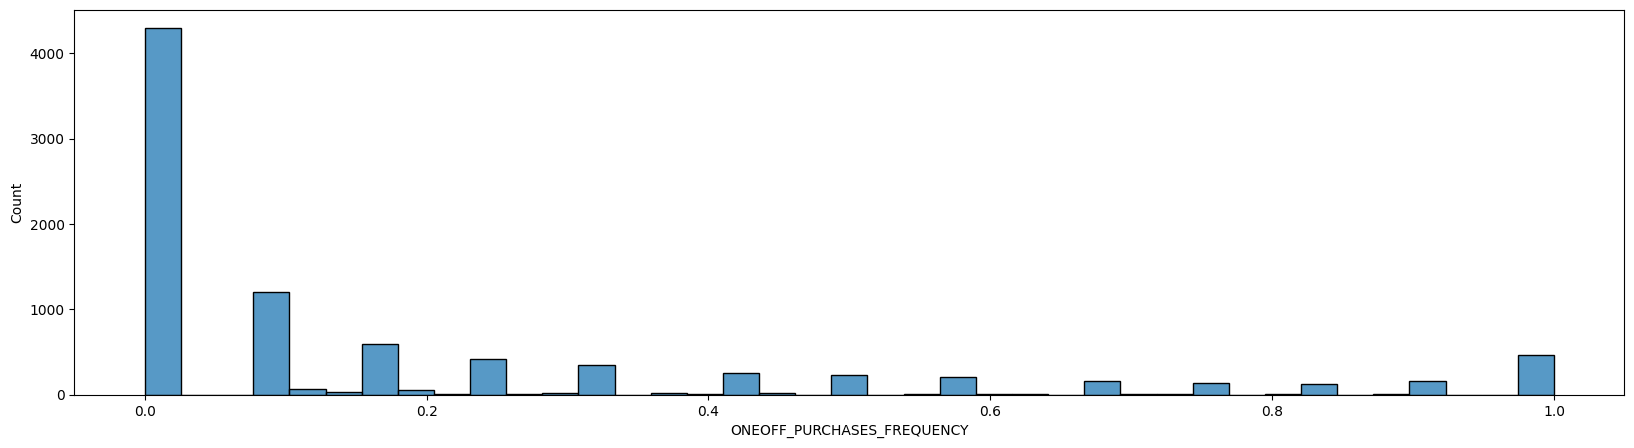

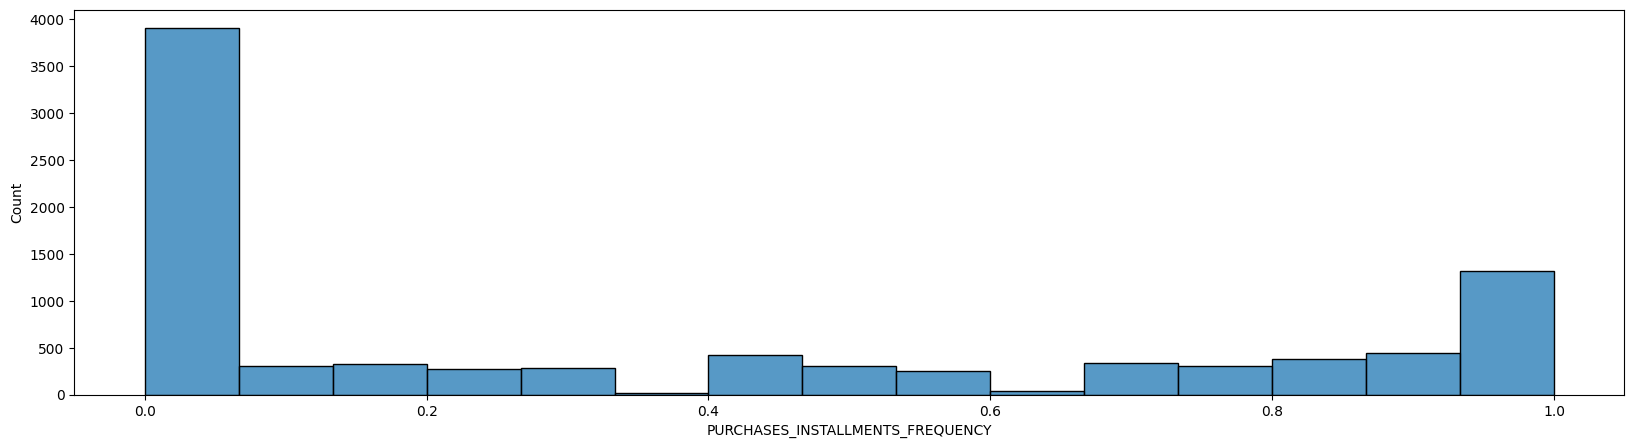

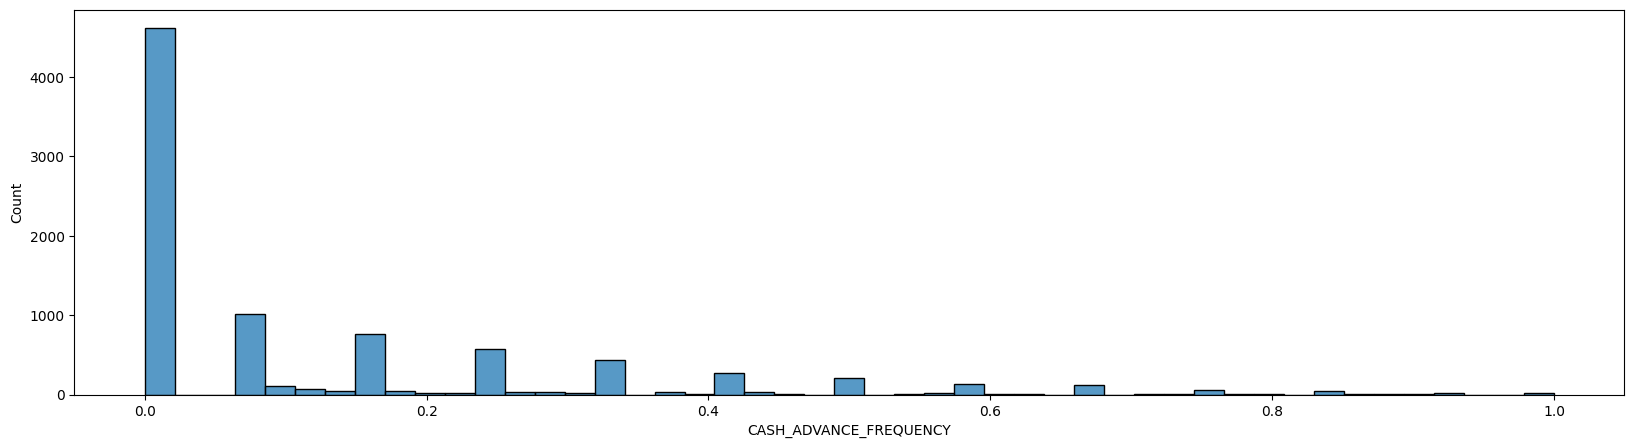

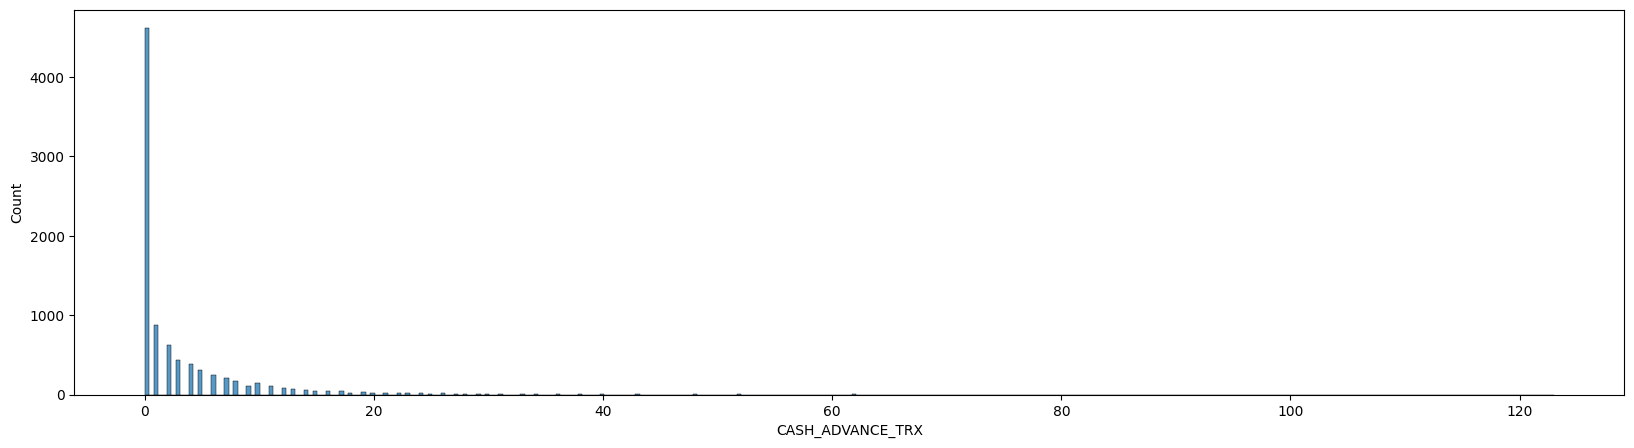

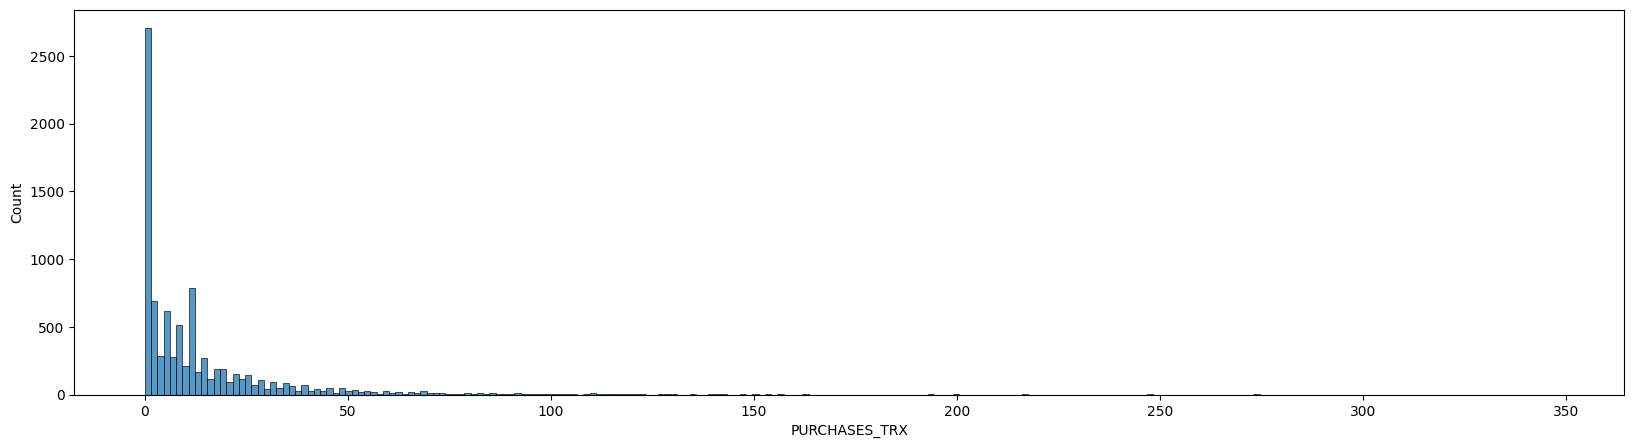

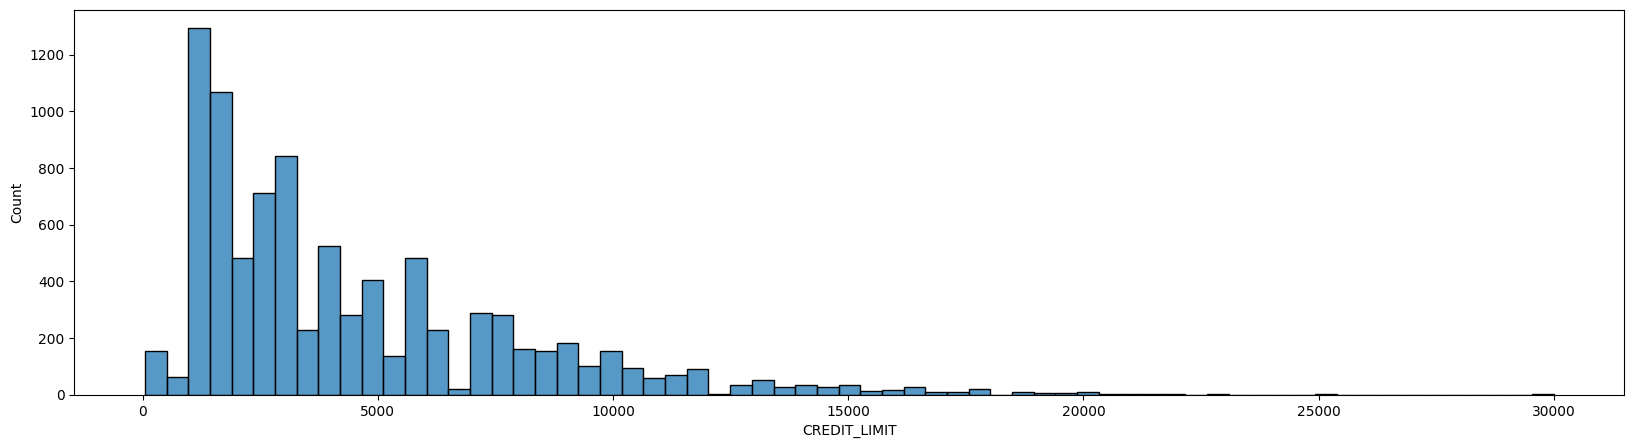

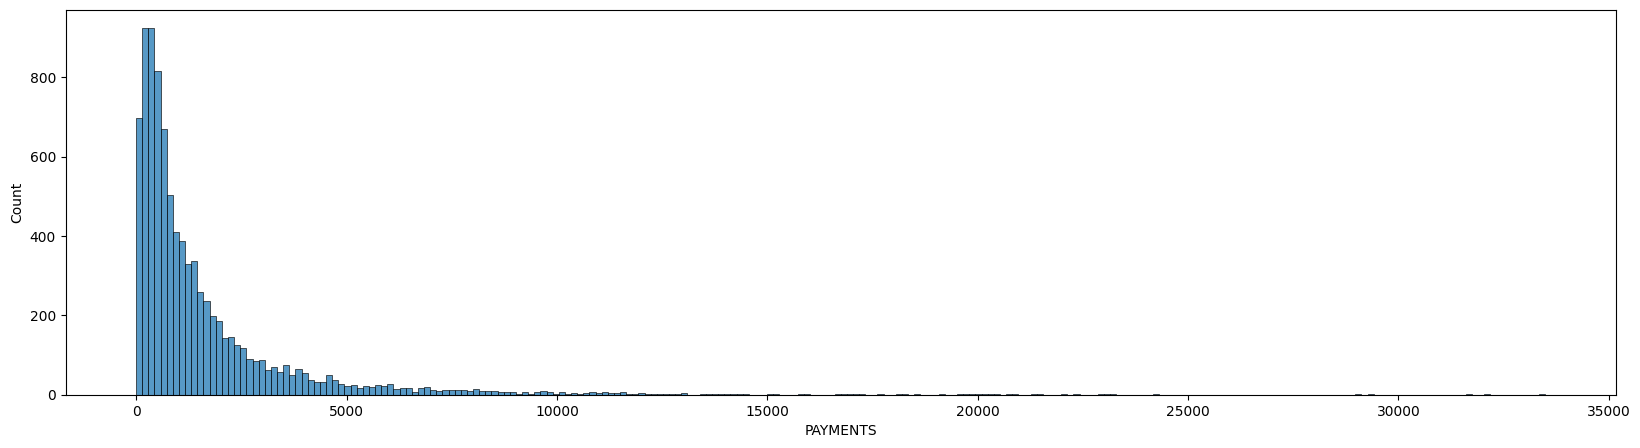

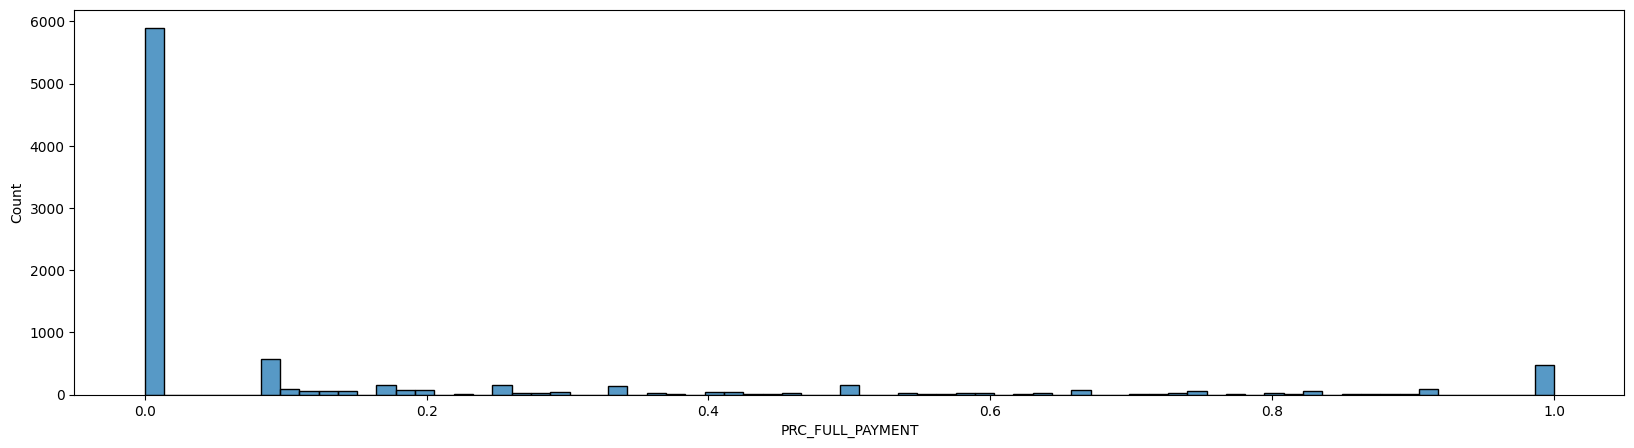

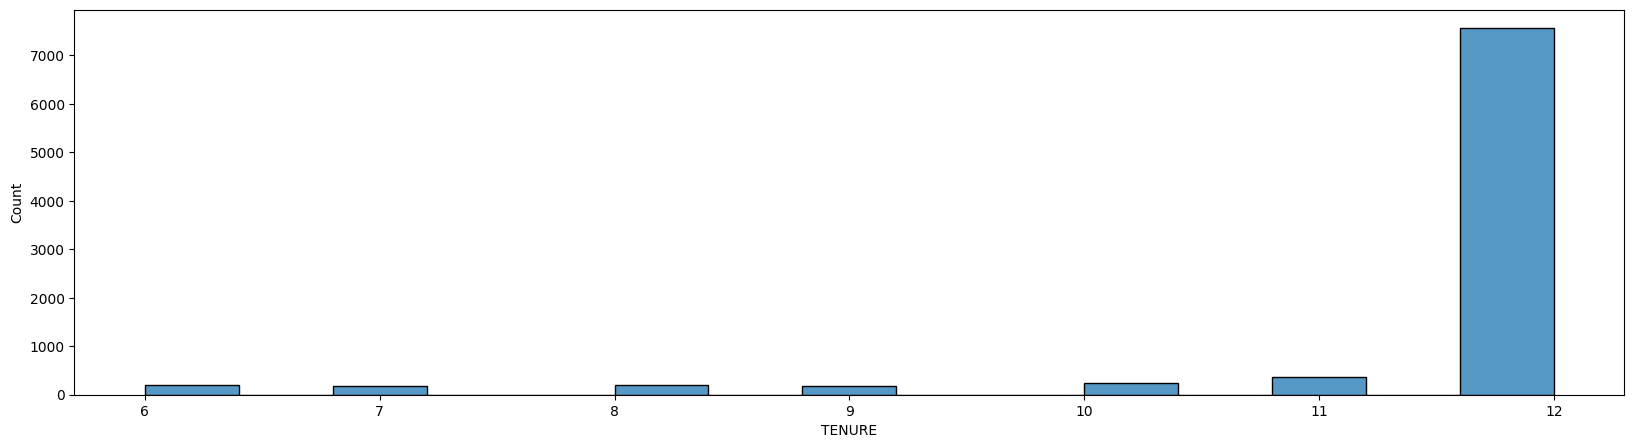

In [ ]:
col = dfnew.columns
for i in range(len(col)):
    plt.figure(figsize=(20,5))
    sns.histplot(data = dfnew,x = col[i])
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler , RobustScaler

In [ ]:
col = ['BALANCE', 'PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS']
for c in col:
    dfnew[c] = dfnew[c] + 1e-4
    dfnew[c] = np.log(dfnew[c])

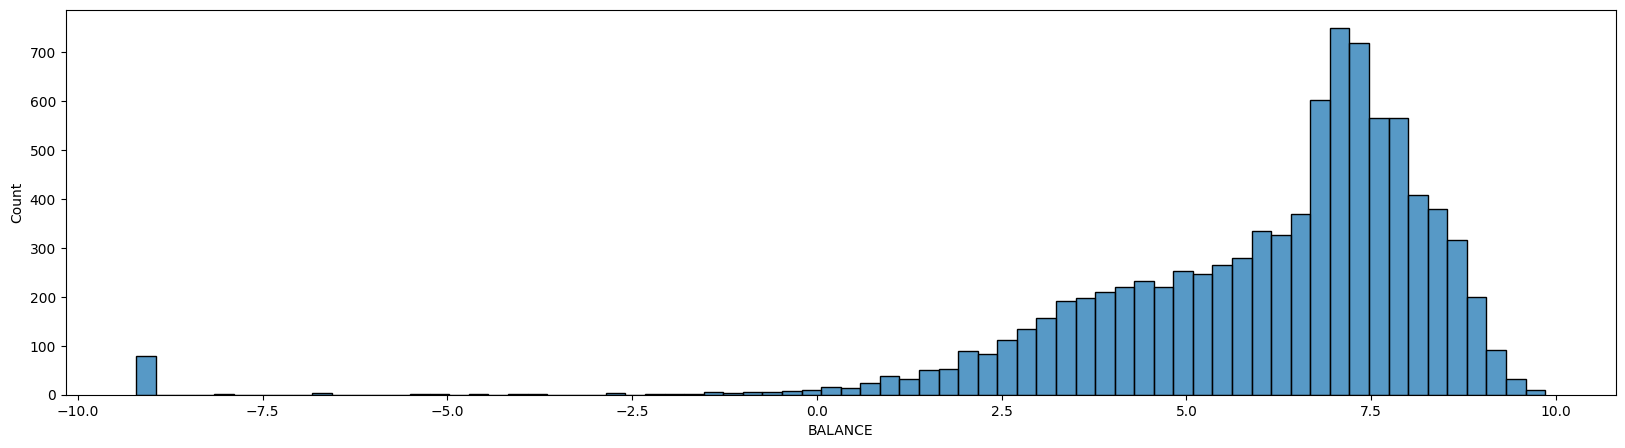

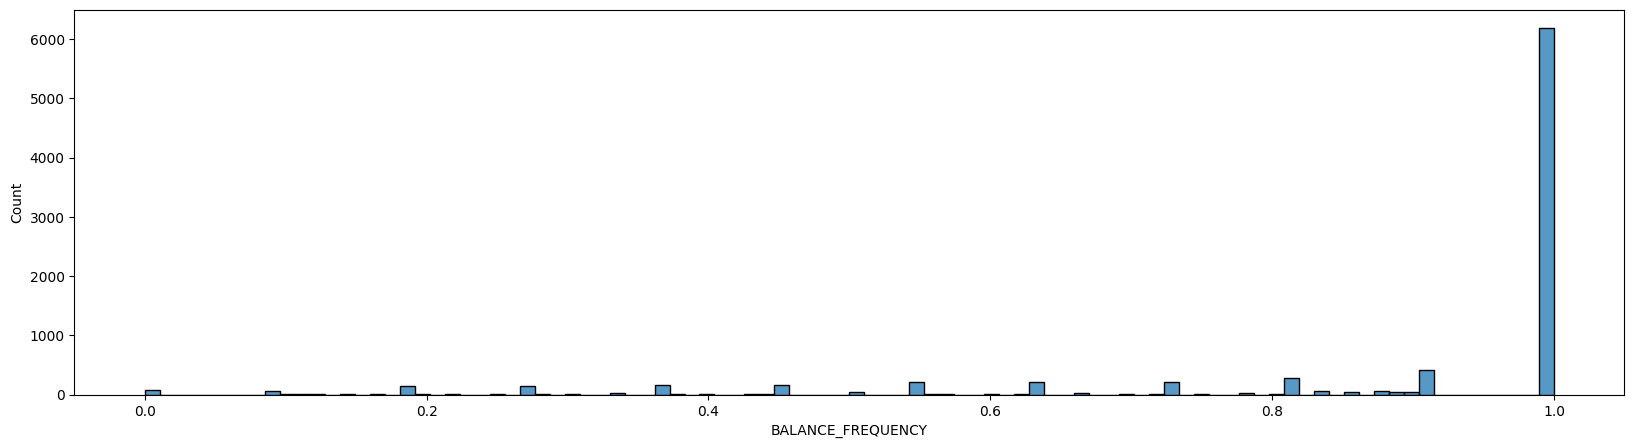

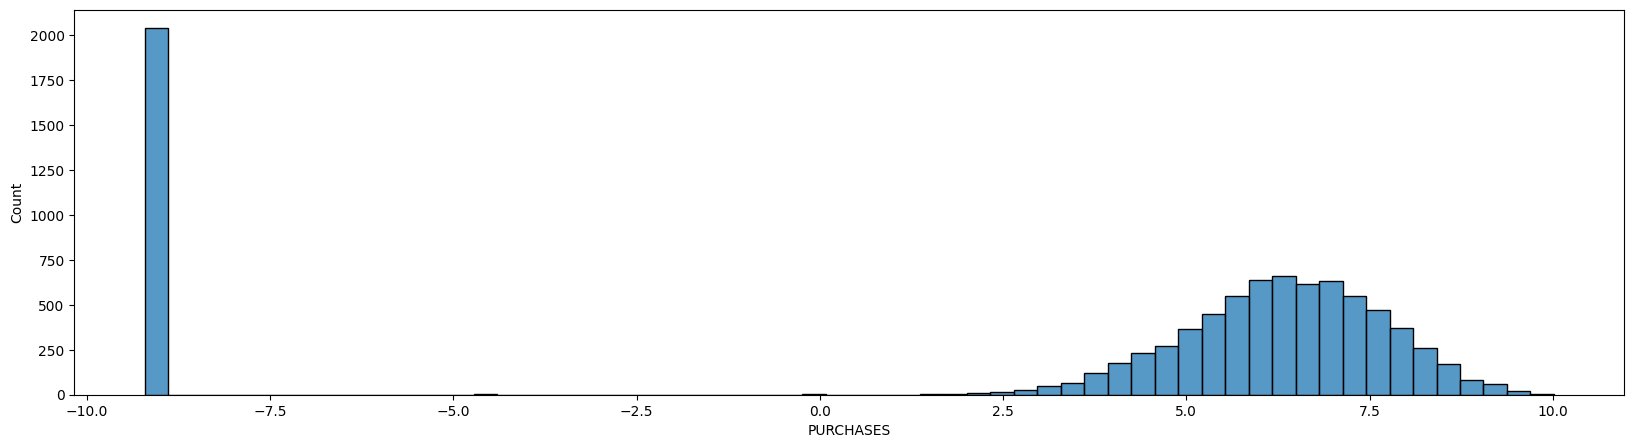

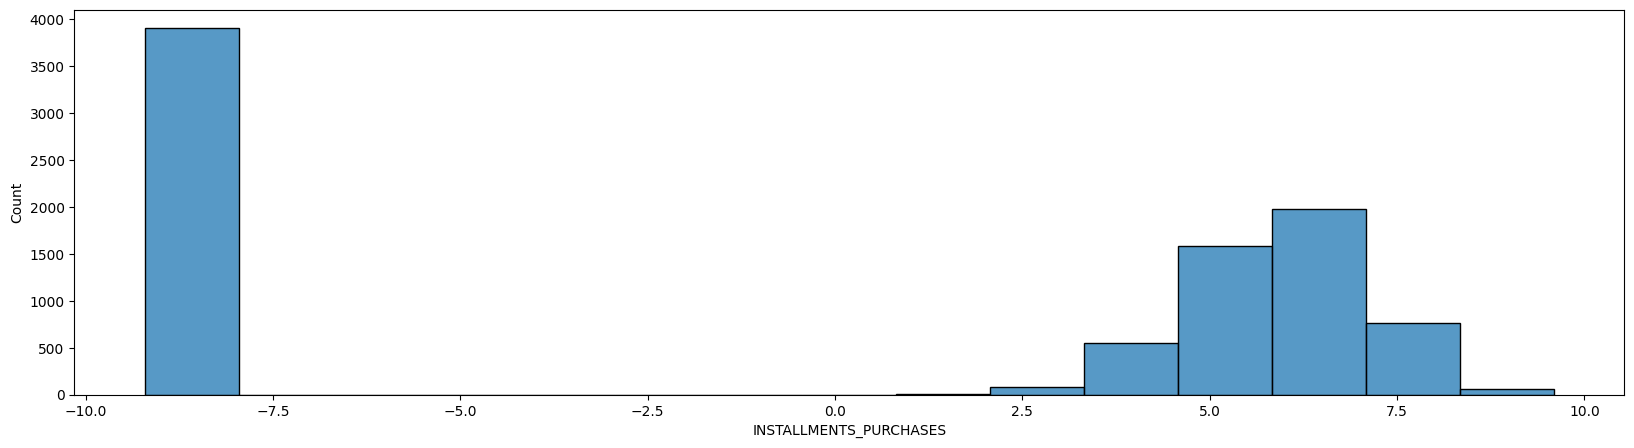

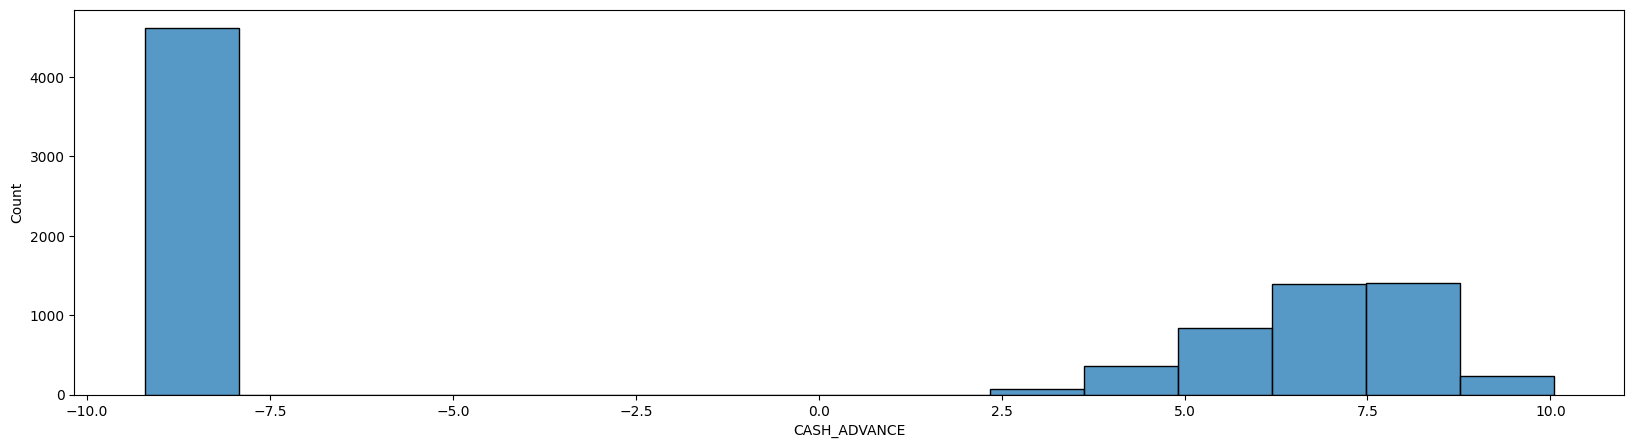

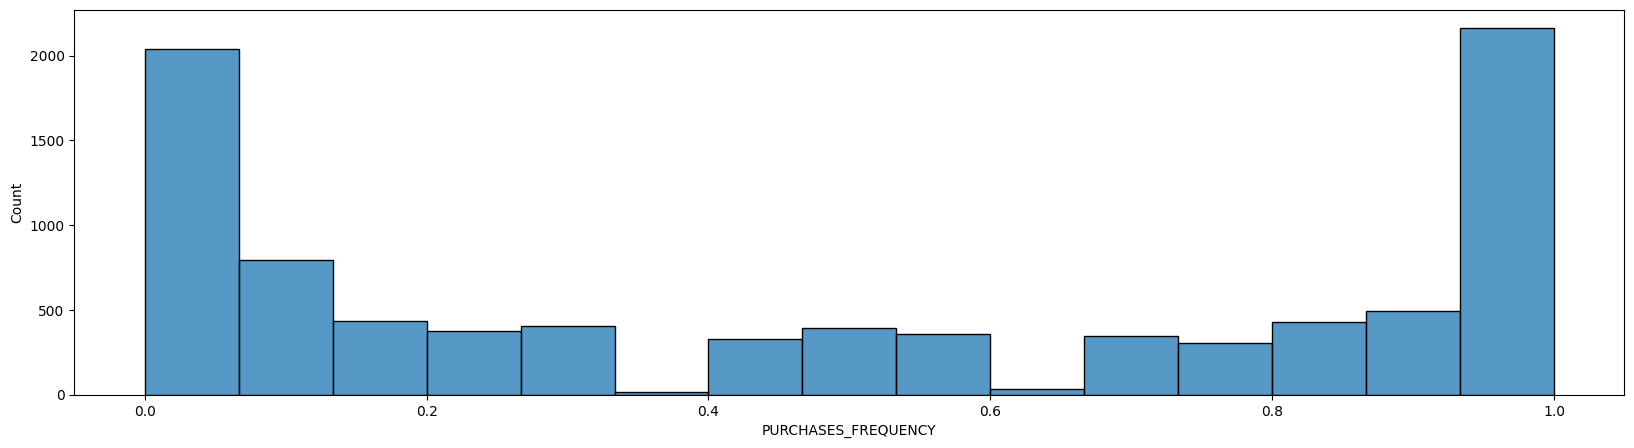

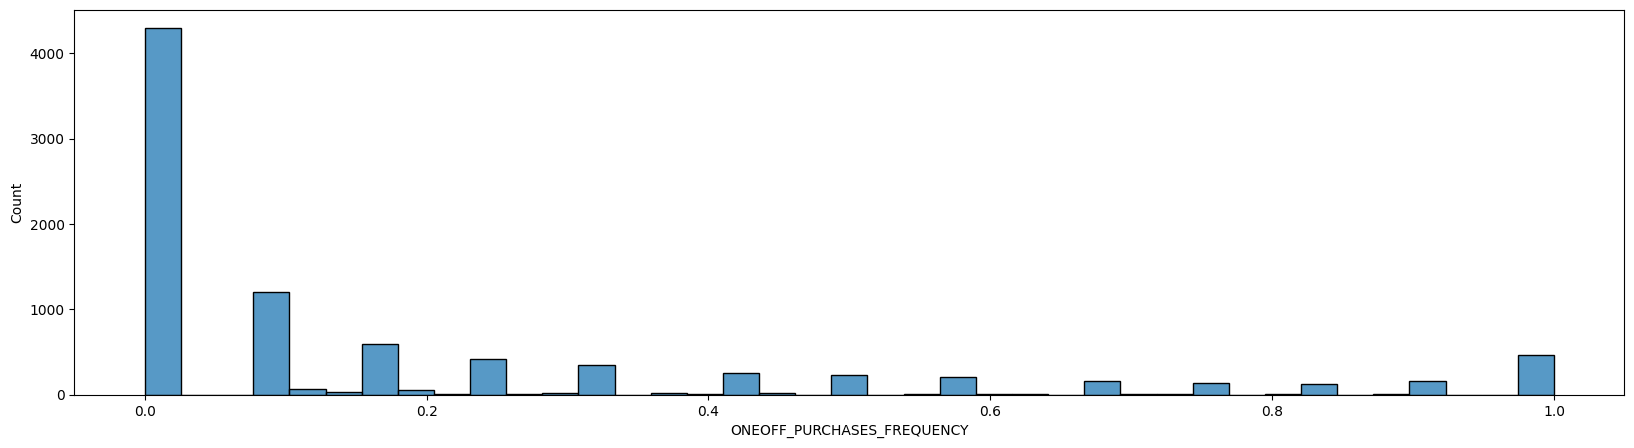

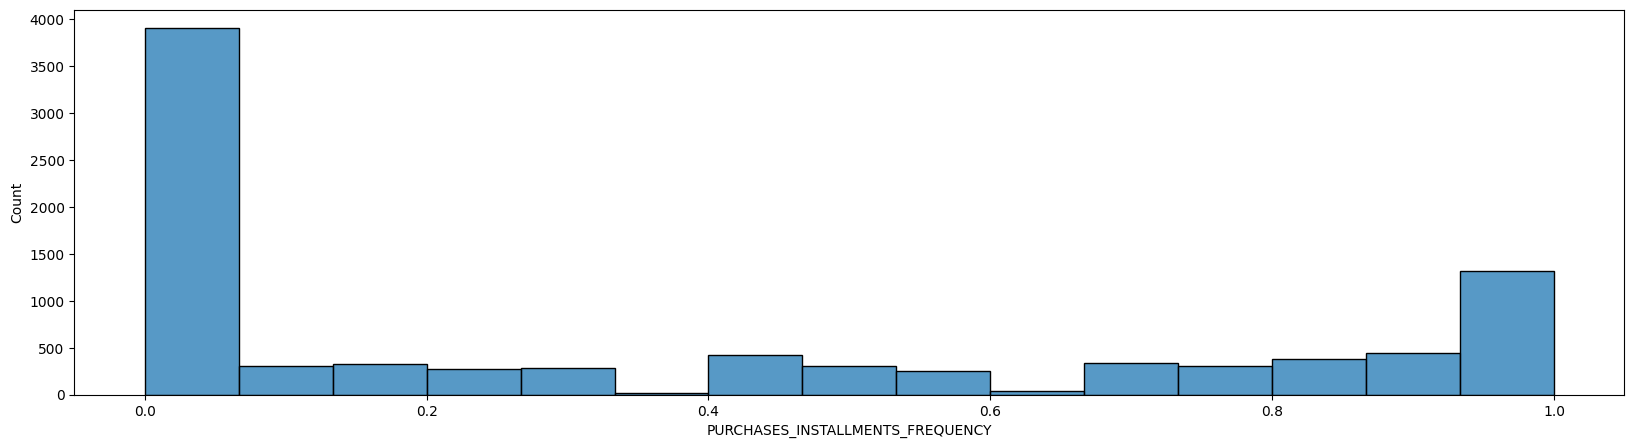

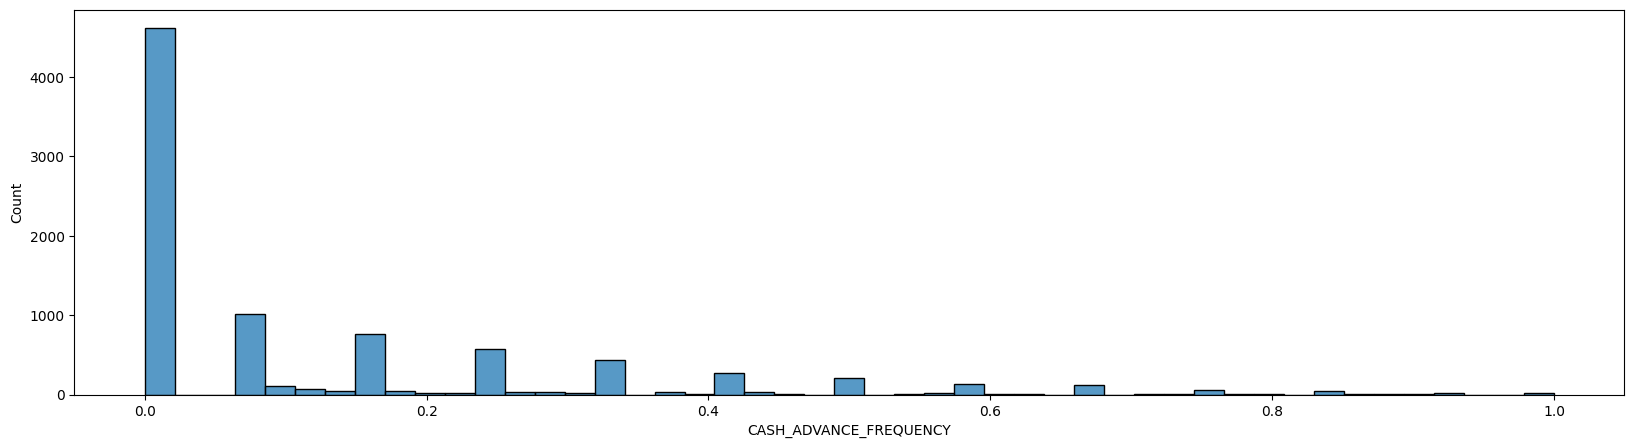

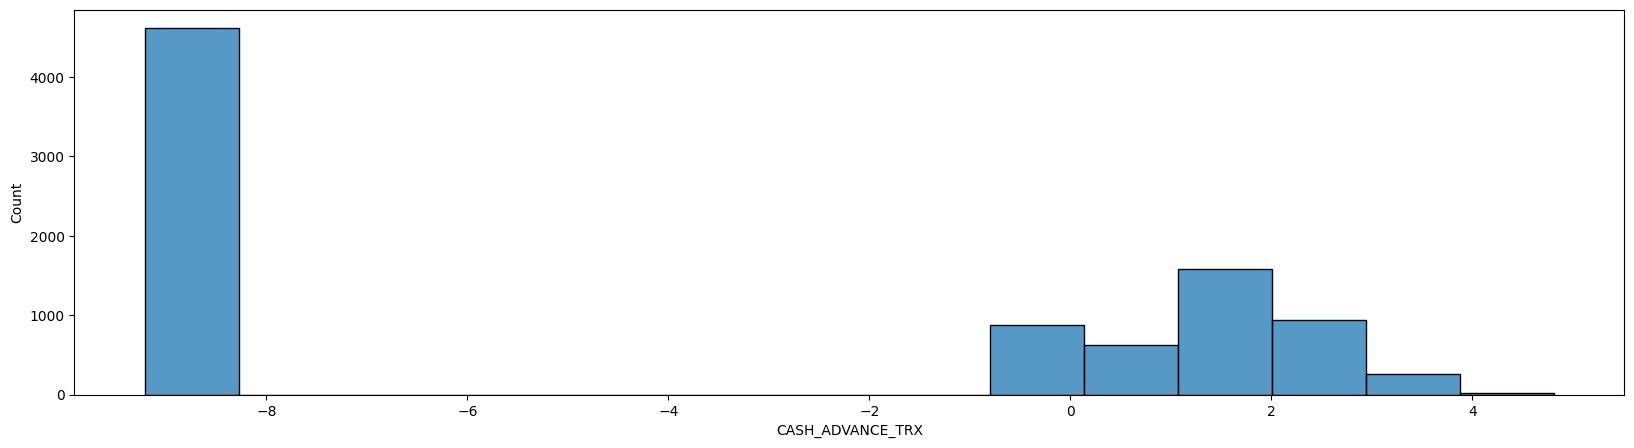

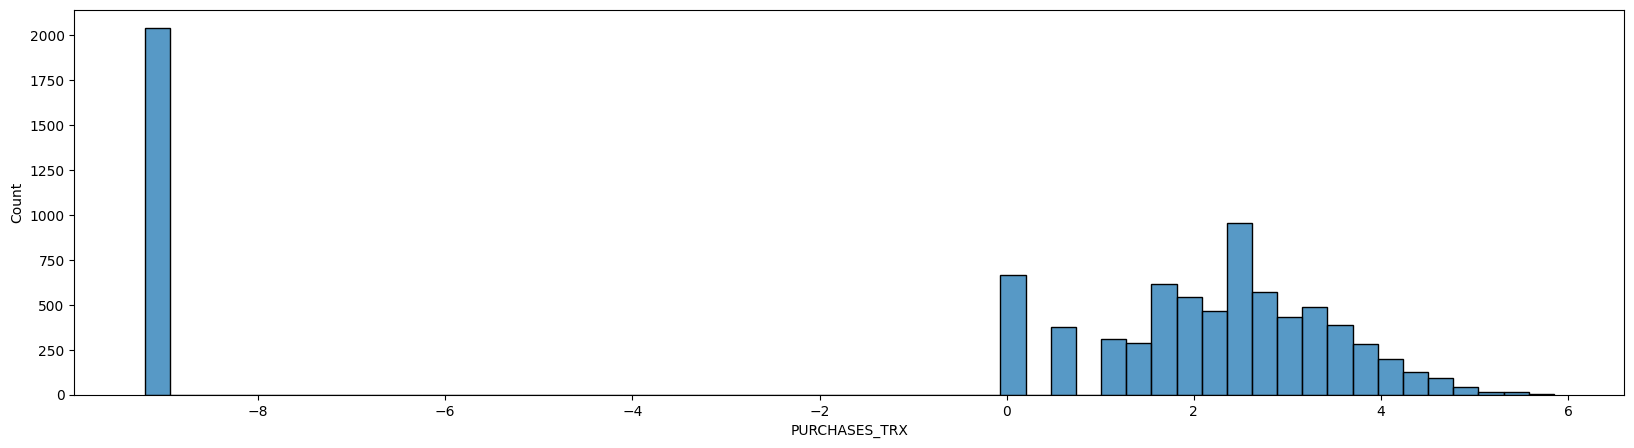

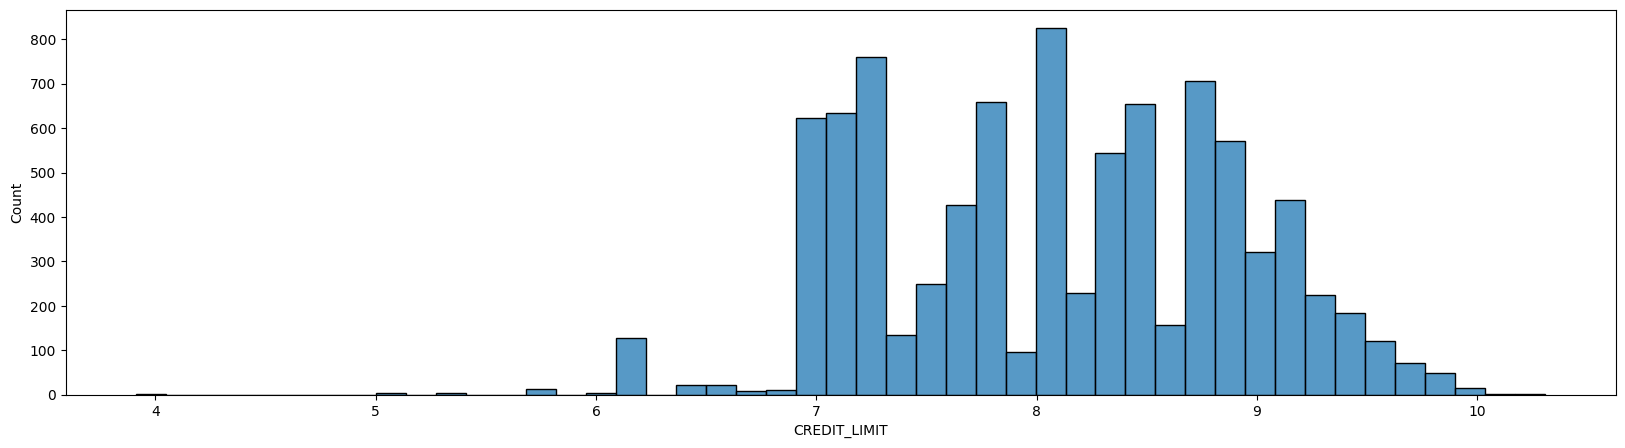

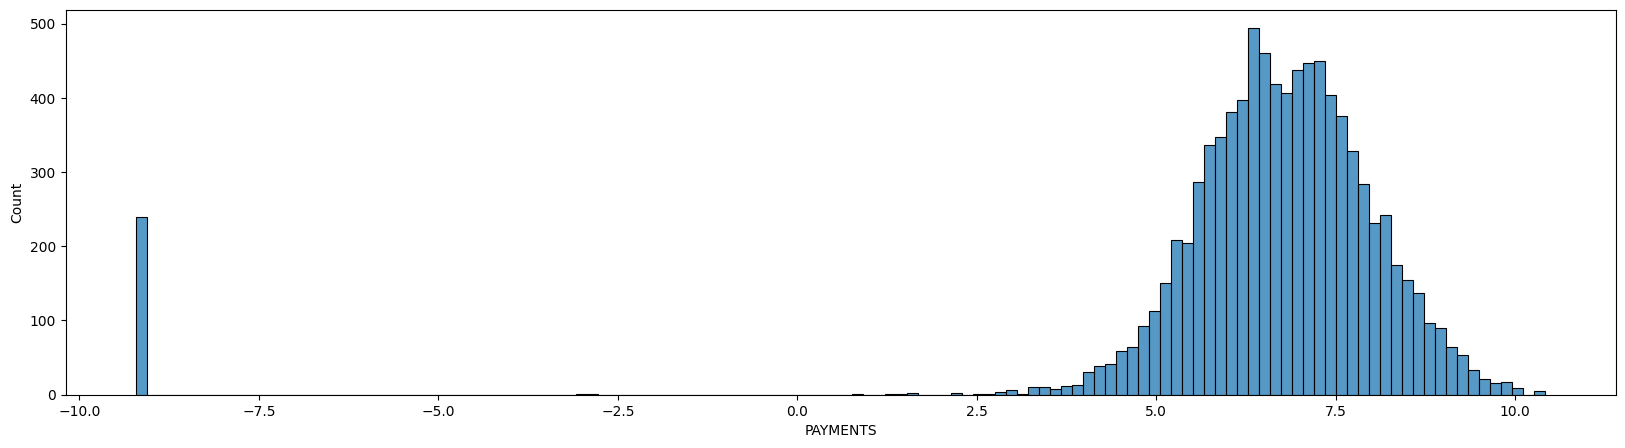

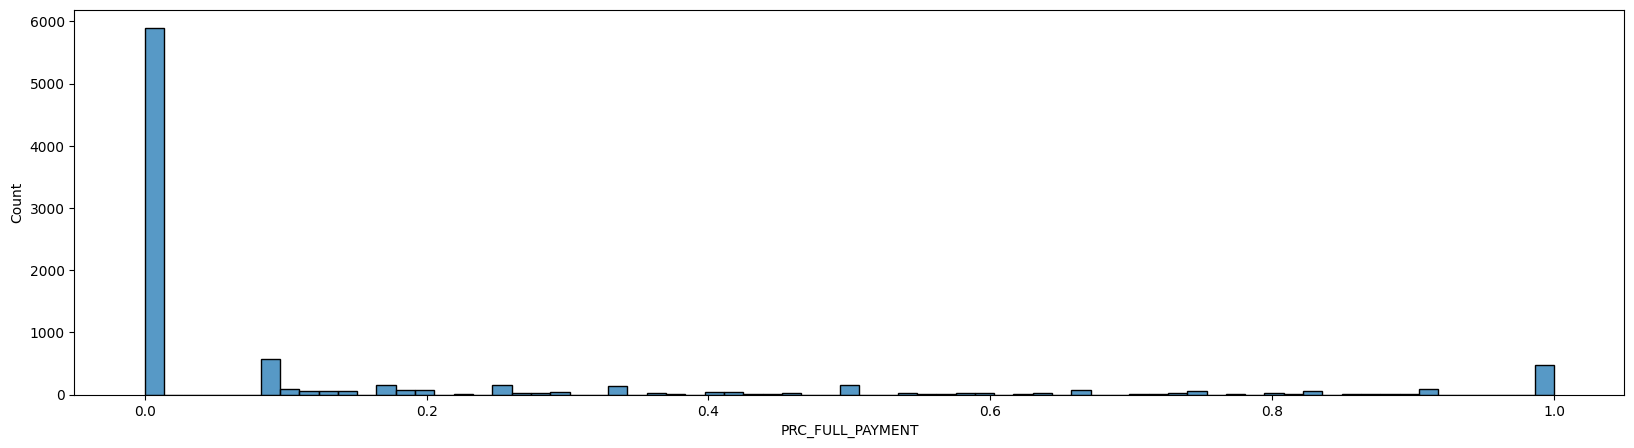

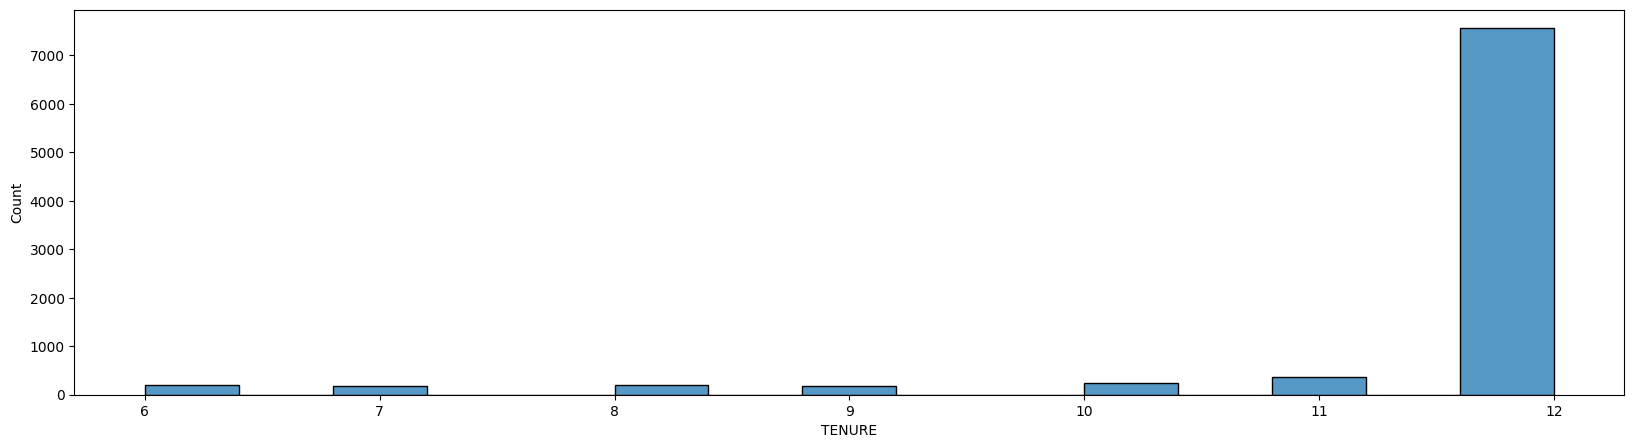

In [ ]:
col = dfnew.columns
for i in range(len(col)):
    plt.figure(figsize=(20,5))
    sns.histplot(data = dfnew,x = col[i])
    plt.show()

In [ ]:
from sklearn.manifold import TSNE
def draw_tsne(data , c=None):
    tsne = TSNE(n_components=2)
    tsne_data = tsne.fit_transform(data)

    plt.figure(figsize=(20,10))
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1],c=c ,  cmap='viridis')
    plt.title('tsne Cluster Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

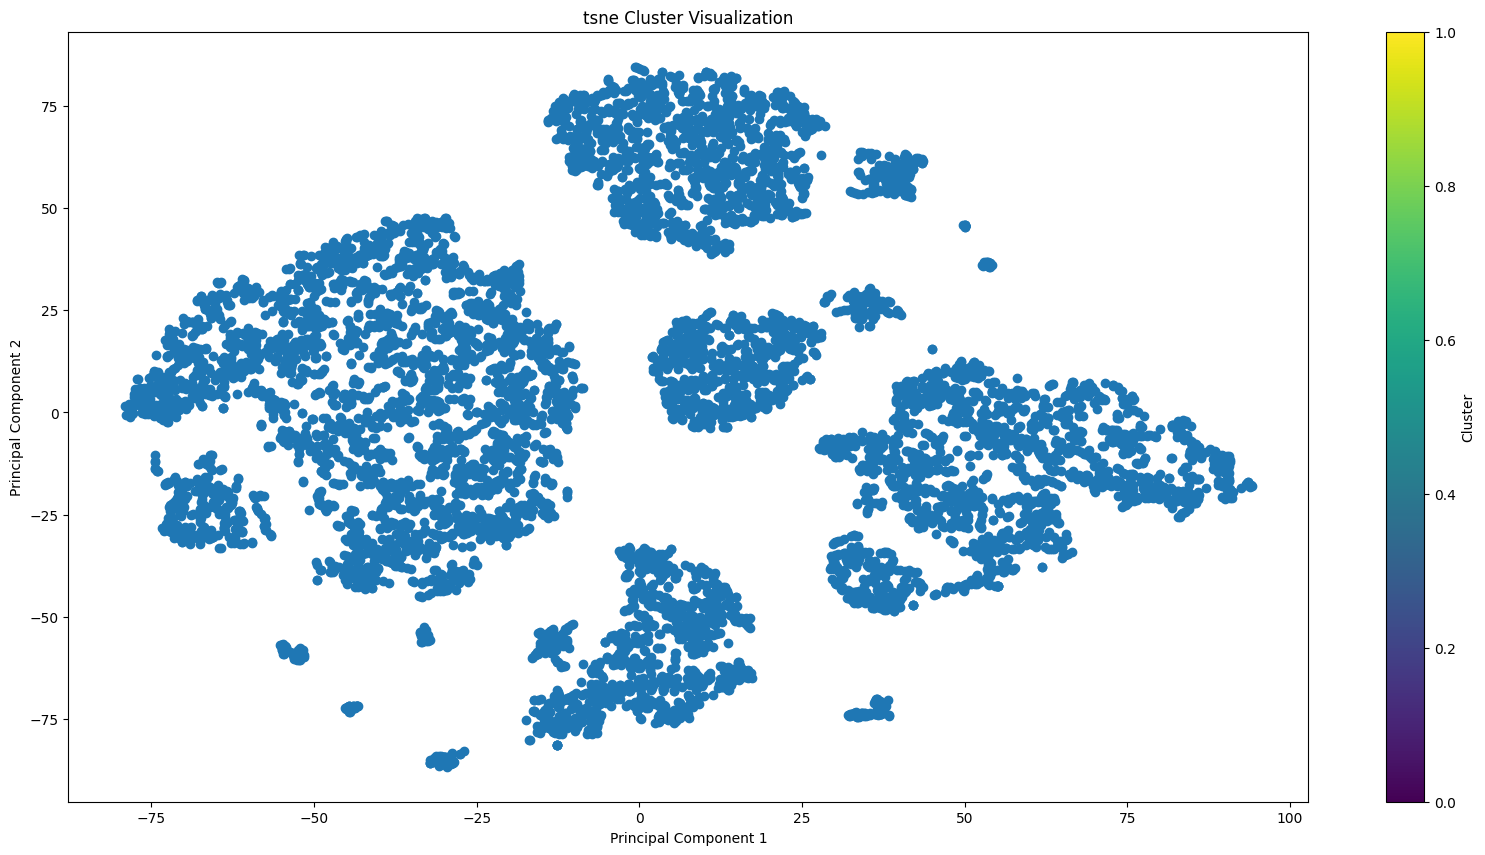

In [ ]:
draw_tsne(dfnew)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dfnew)
data_scaled_df = pd.DataFrame(data_scaled, columns=dfnew.columns)

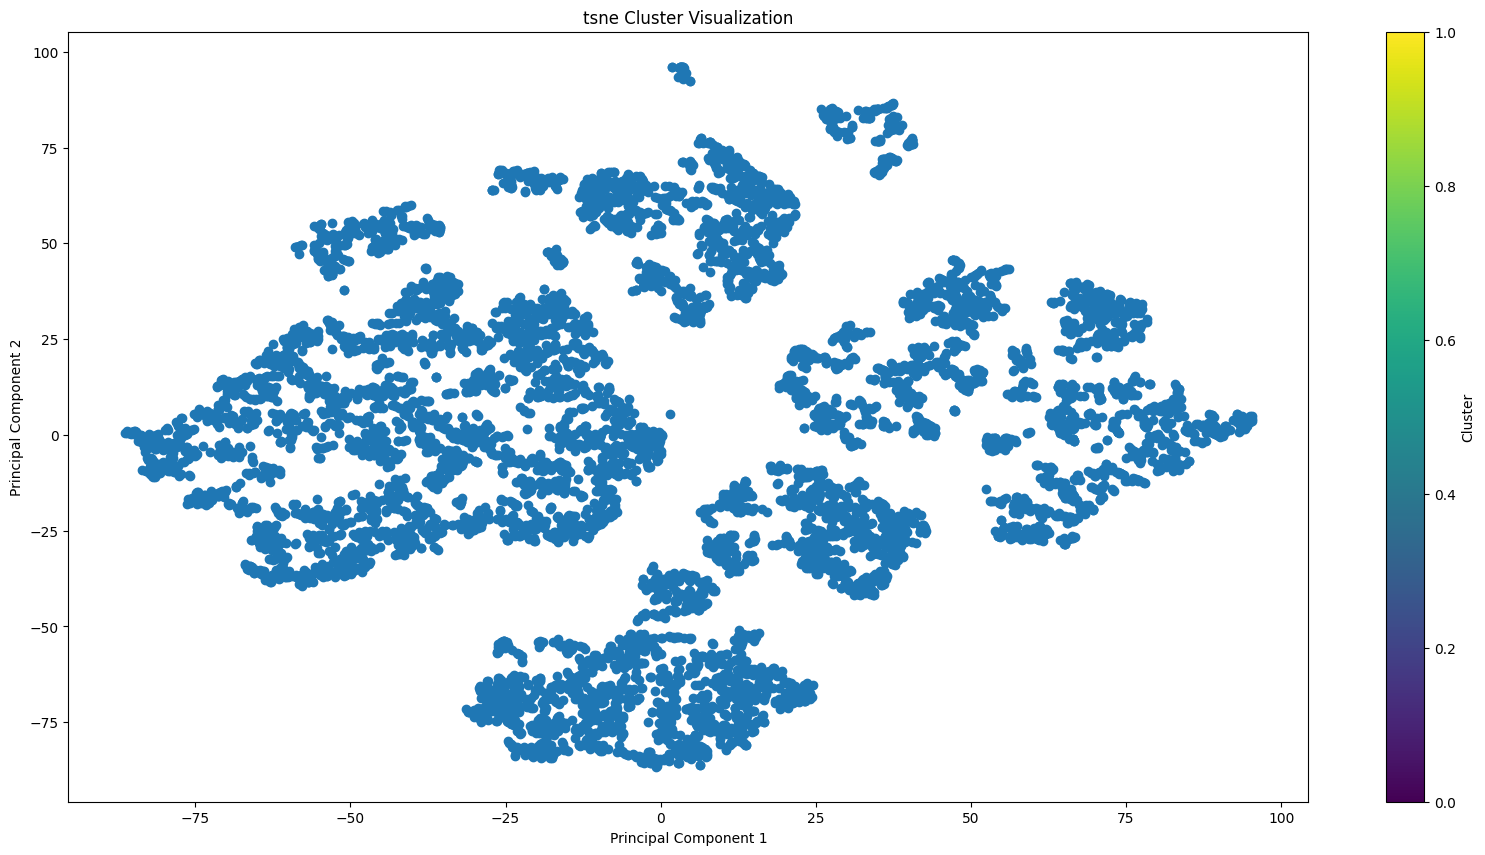

In [ ]:
draw_tsne(data_scaled)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
pca_data = pca.fit_transform(dfnew)

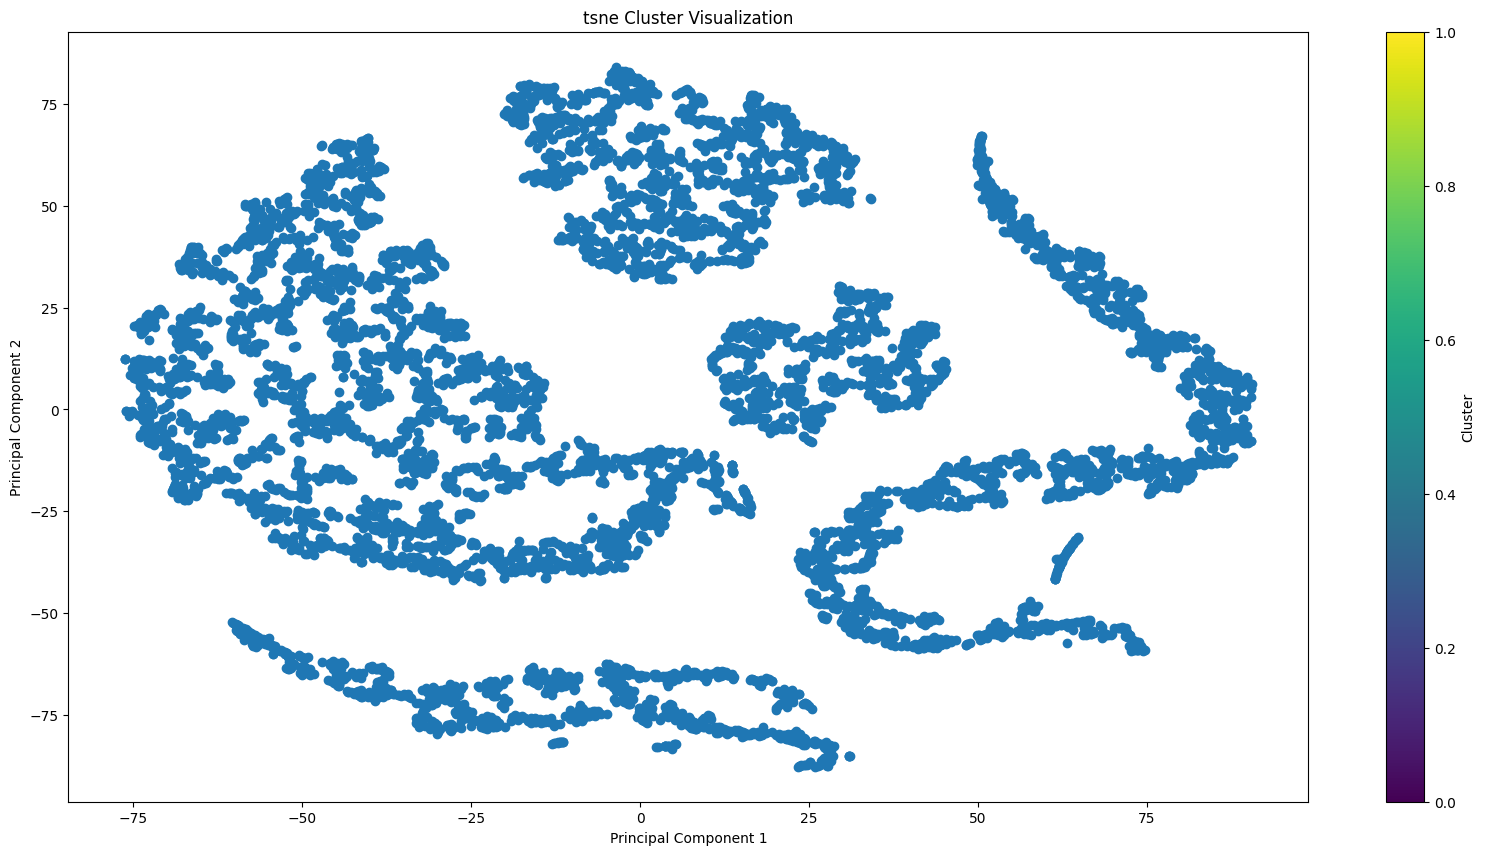

In [ ]:
draw_tsne(pca_data)

In [ ]:
pca = PCA(n_components=0.99)
pca_data = pca.fit_transform(dfnew)

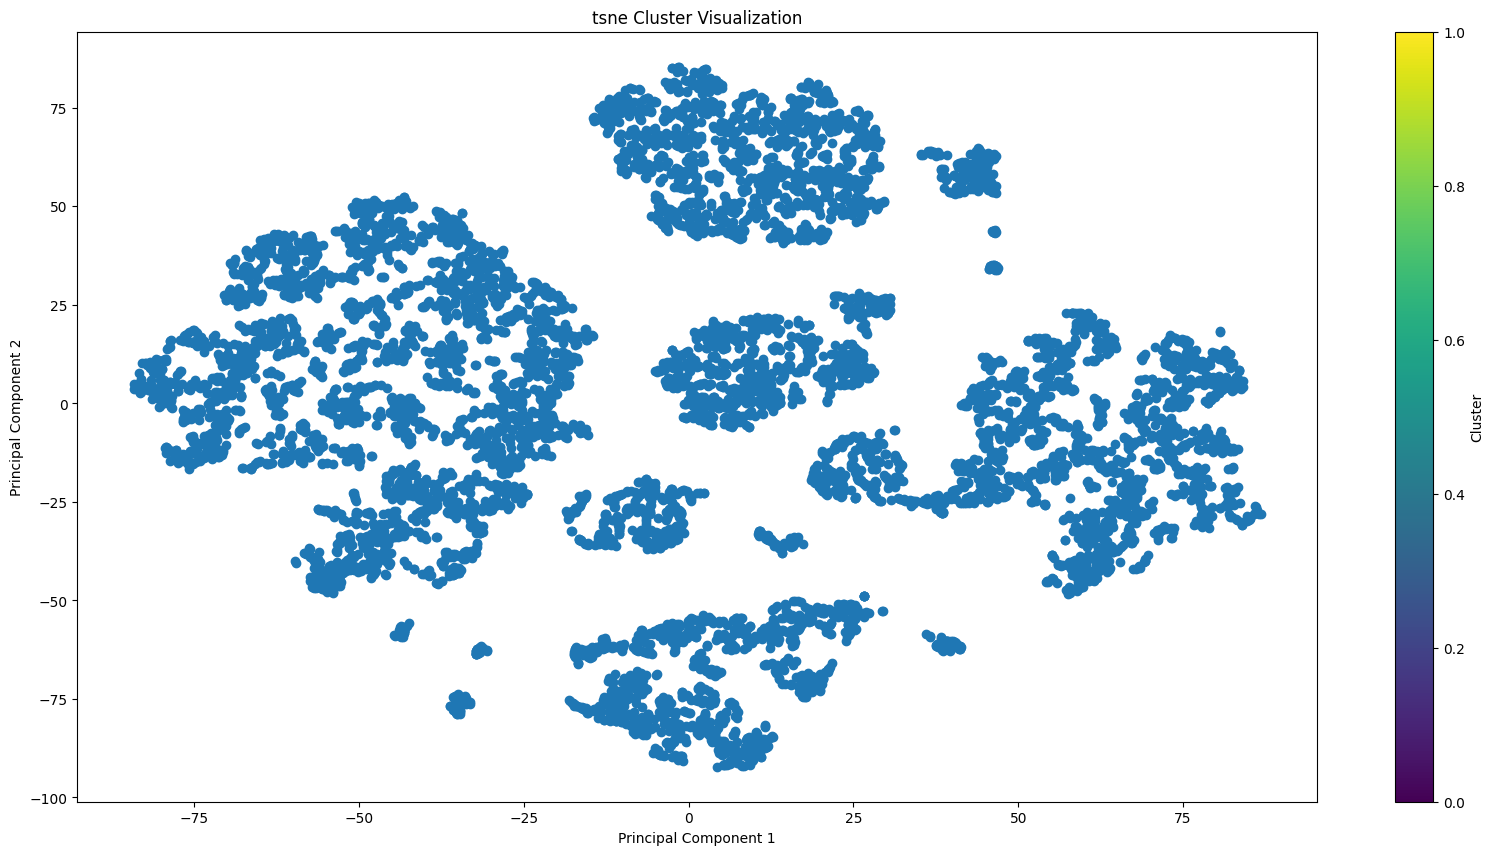

In [ ]:
draw_tsne(pca_data)

In [ ]:
pca = PCA(n_components=0.999)
pca_data = pca.fit_transform(dfnew)

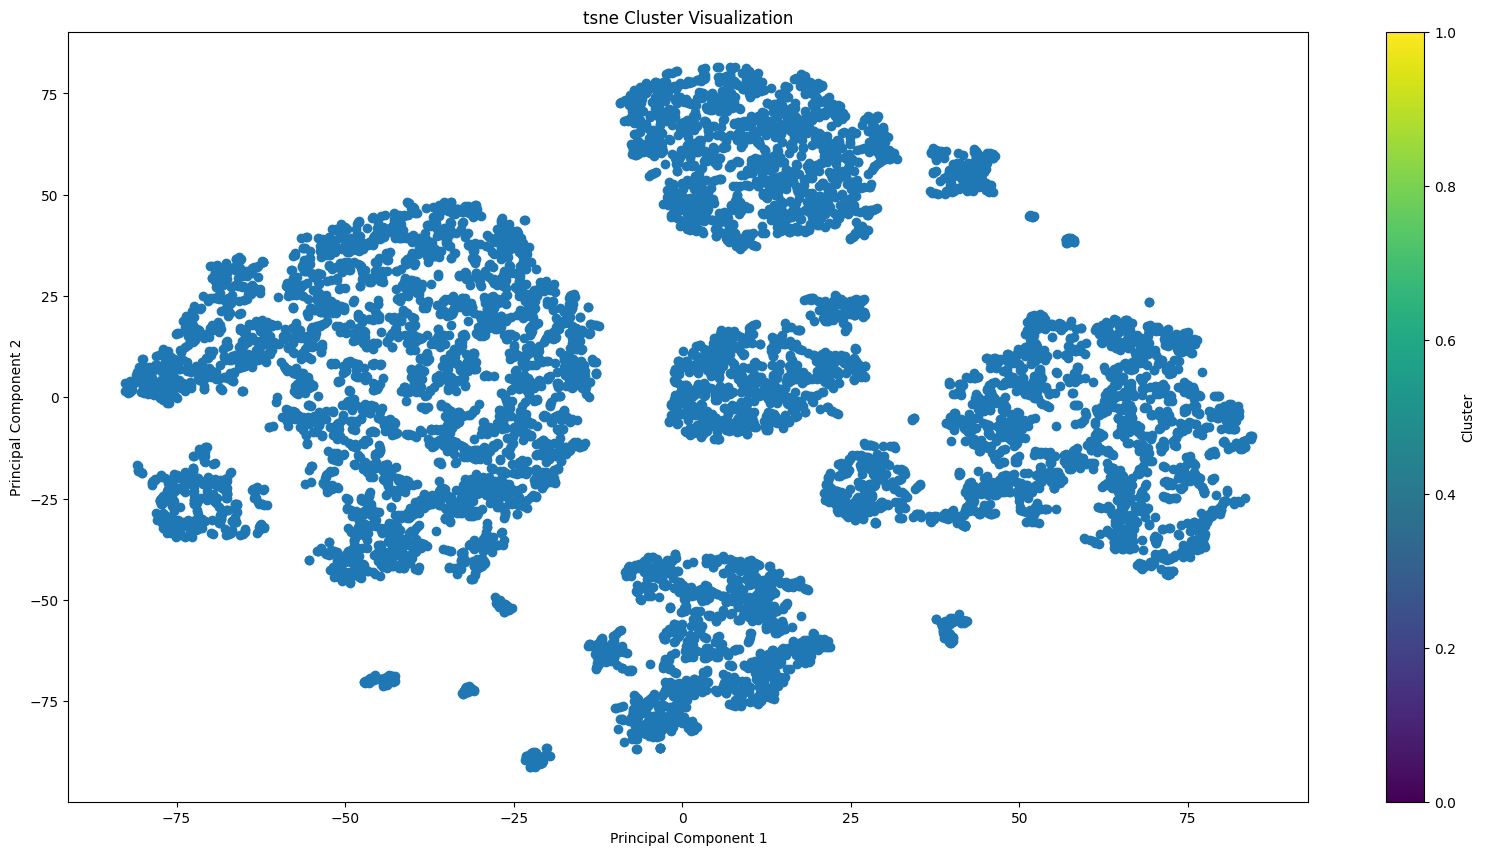

In [ ]:
draw_tsne(pca_data)

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you
5- Using different techniques for scaling and comment on the result

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(dfnew)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 5.02561608e+00  8.38455706e-01  6.35164185e+00  2.43641020e+00
  -9.21034037e+00  6.64122860e-01  2.55022631e-01  5.05977074e-01
  -2.69229083e-15 -9.21034037e+00  2.32212821e+00  8.06676077e+00
   6.15126569e+00  2.46854077e-01  1.16309627e+01]
 [ 6.92308867e+00  8.82435033e-01 -9.19844578e+00 -9.19779981e+00
   6.84209858e+00  3.30024963e-04  1.66866373e-04  2.85527655e-04
   2.70833293e-01  1.33452534e+00 -9.17844307e+00  7.98686128e+00
   6.21307311e+00  4.38085649e-02  1.13264807e+01]
 [ 7.32409711e+00  9.50998268e-01  6.30601827e+00  6.21266403e-01
   6.87575333e+00  5.76609151e-01  2.73512681e-01  4.02894758e-01
   2.83794718e-01  1.43440813e+00  2.19167540e+00  8.22936850e+00
   6.93189952e+00  6.01496459e-02  1.14672856e+01]]
[0 1 0 ... 0 1 2]


In [ ]:
!pip install scipy

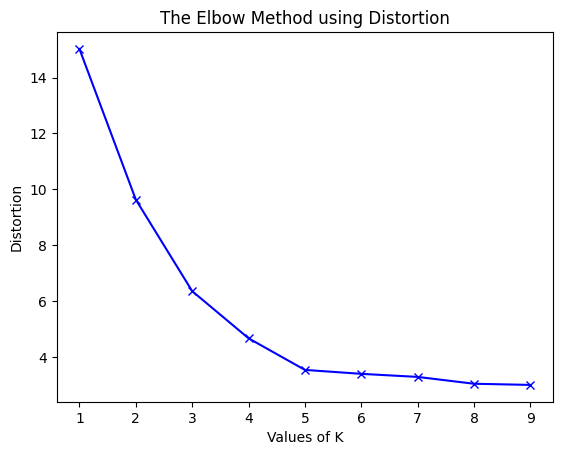

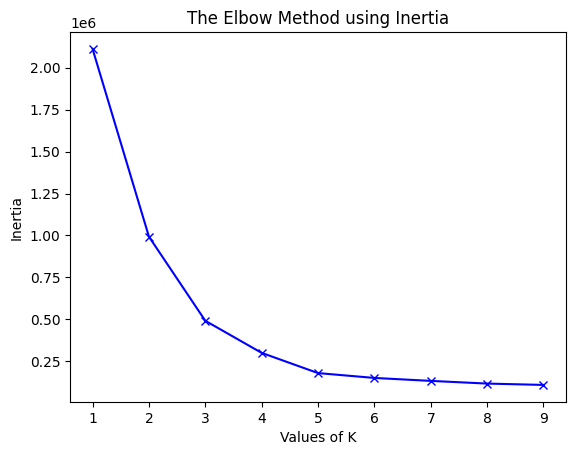

In [ ]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfnew)
    distortions.append(sum(np.min(cdist(dfnew, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dfnew.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(dfnew, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dfnew.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

**K Means Before PCA**

In [ ]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=5 )
kmeans1.fit(data_scaled)

KMeans(n_clusters=5)

In [ ]:
dfnew2 = dfnew.copy()
dfnew2['cluster1'] = kmeans1.predict(dfnew)

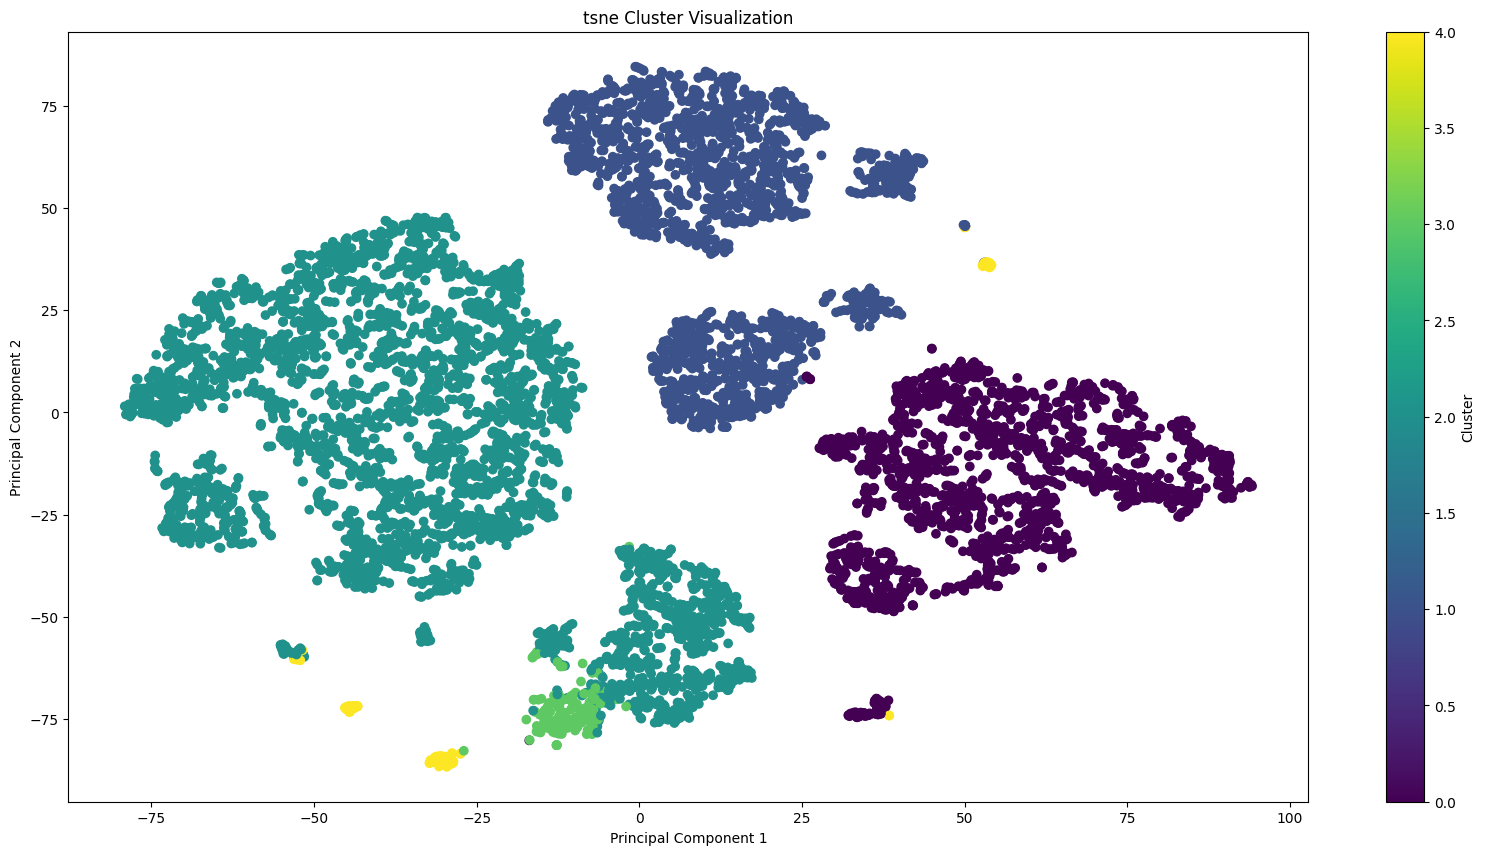

In [ ]:
draw_tsne(dfnew , kmeans1.predict(dfnew))

**results are so bad , try DBSCAN with pca**

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=2).fit(pca_data)

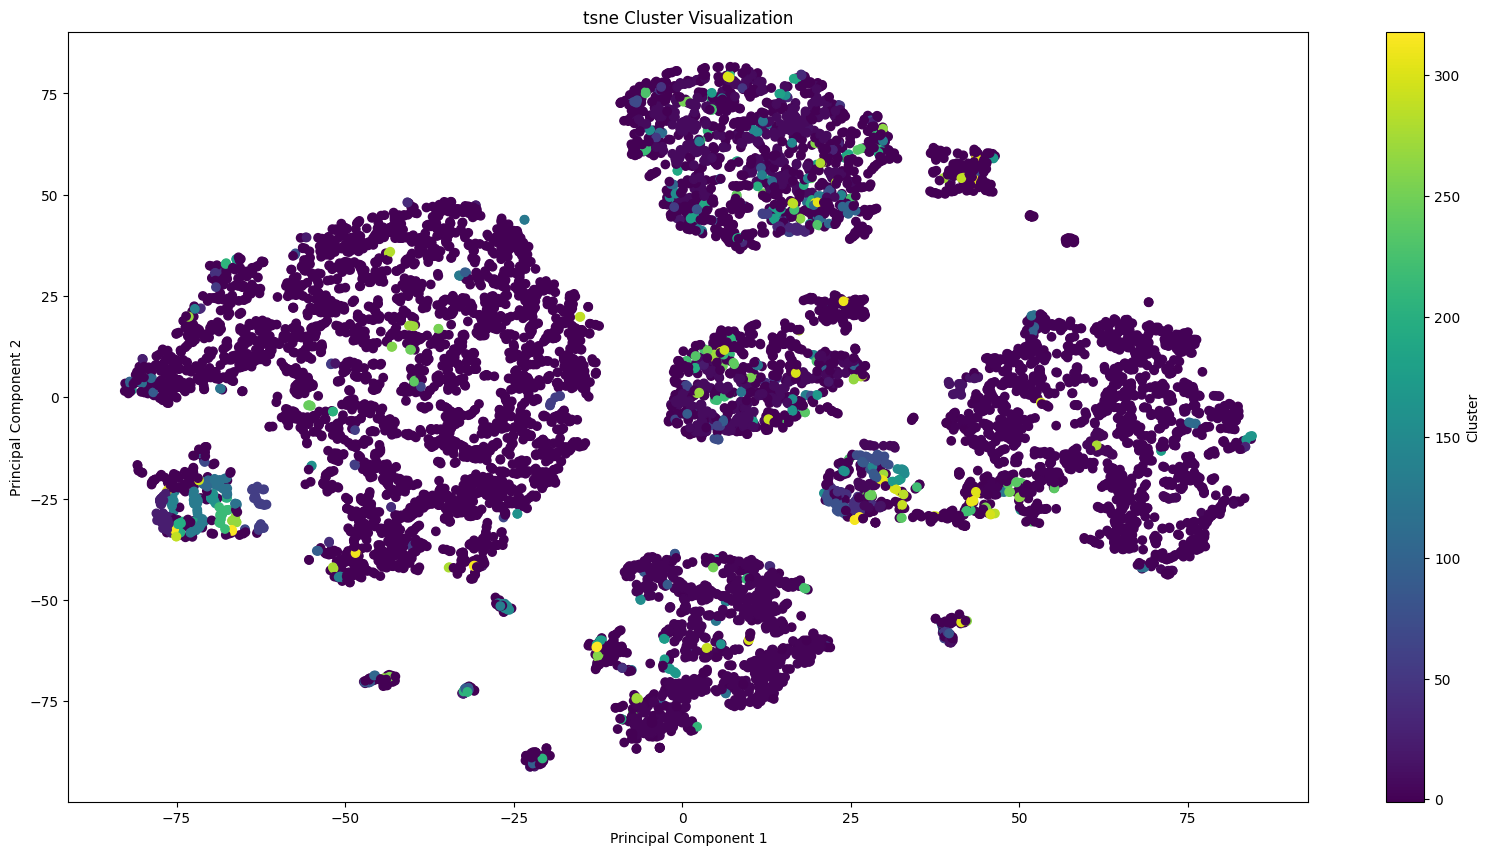

In [ ]:
draw_tsne(pca_data , c=clustering.labels_)

**dbscan results are very bad , try kmeans with pca**

In [ ]:
from sklearn.cluster import KMeans
kmeans7 = KMeans(n_clusters=5 )
kmeans7.fit(pca_data)

KMeans(n_clusters=5)

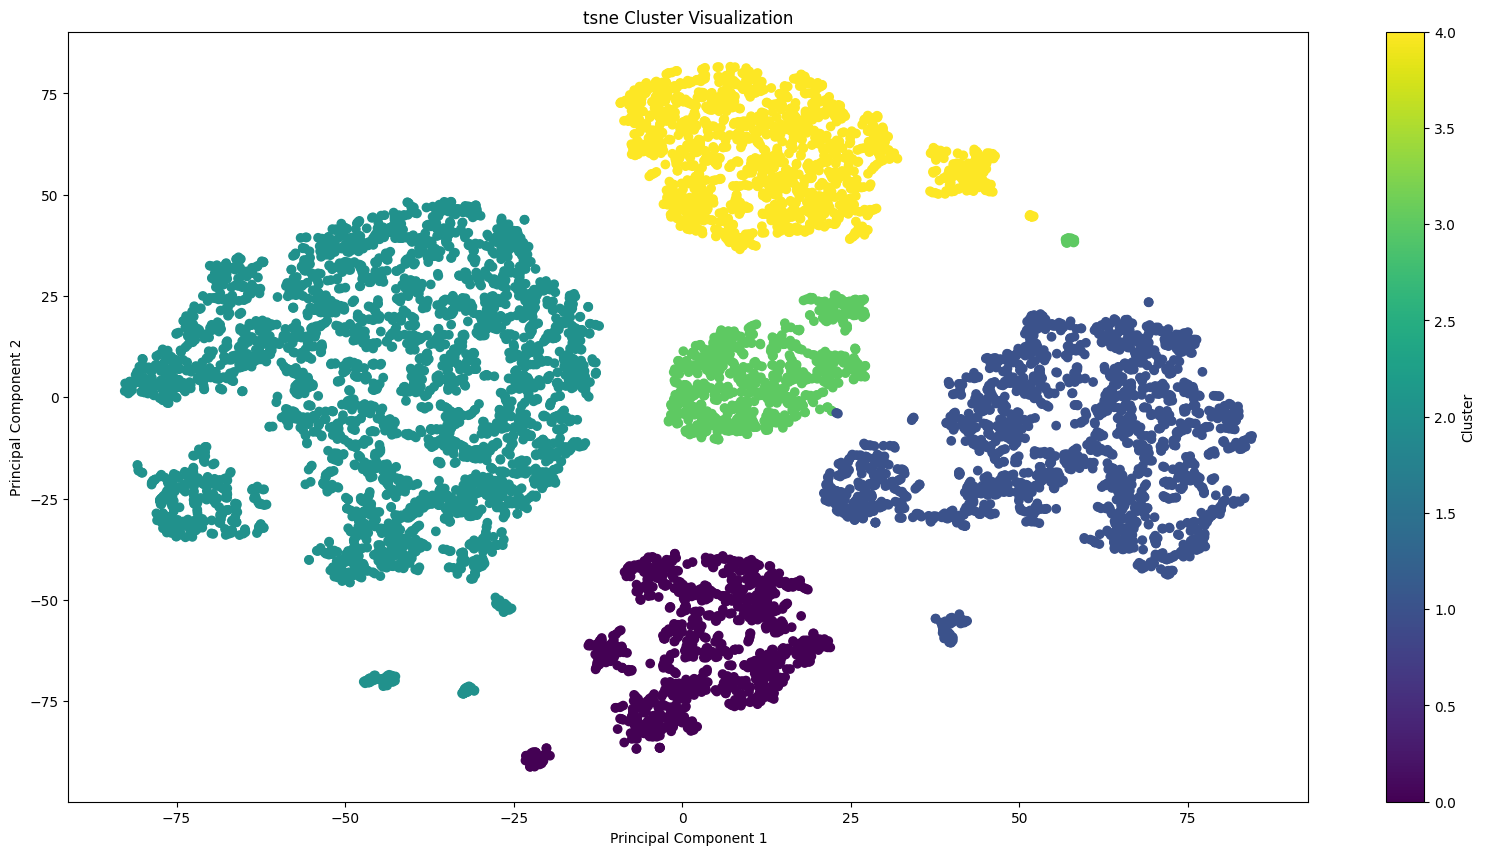

In [ ]:
draw_tsne(pca_data , c=kmeans7.predict(pca_data))

In [ ]:
dfnew_copy2 = dfnew_copy_original.copy()

In [ ]:
dfnew_copy2['pca_clusters'] = kmeans7.labels_

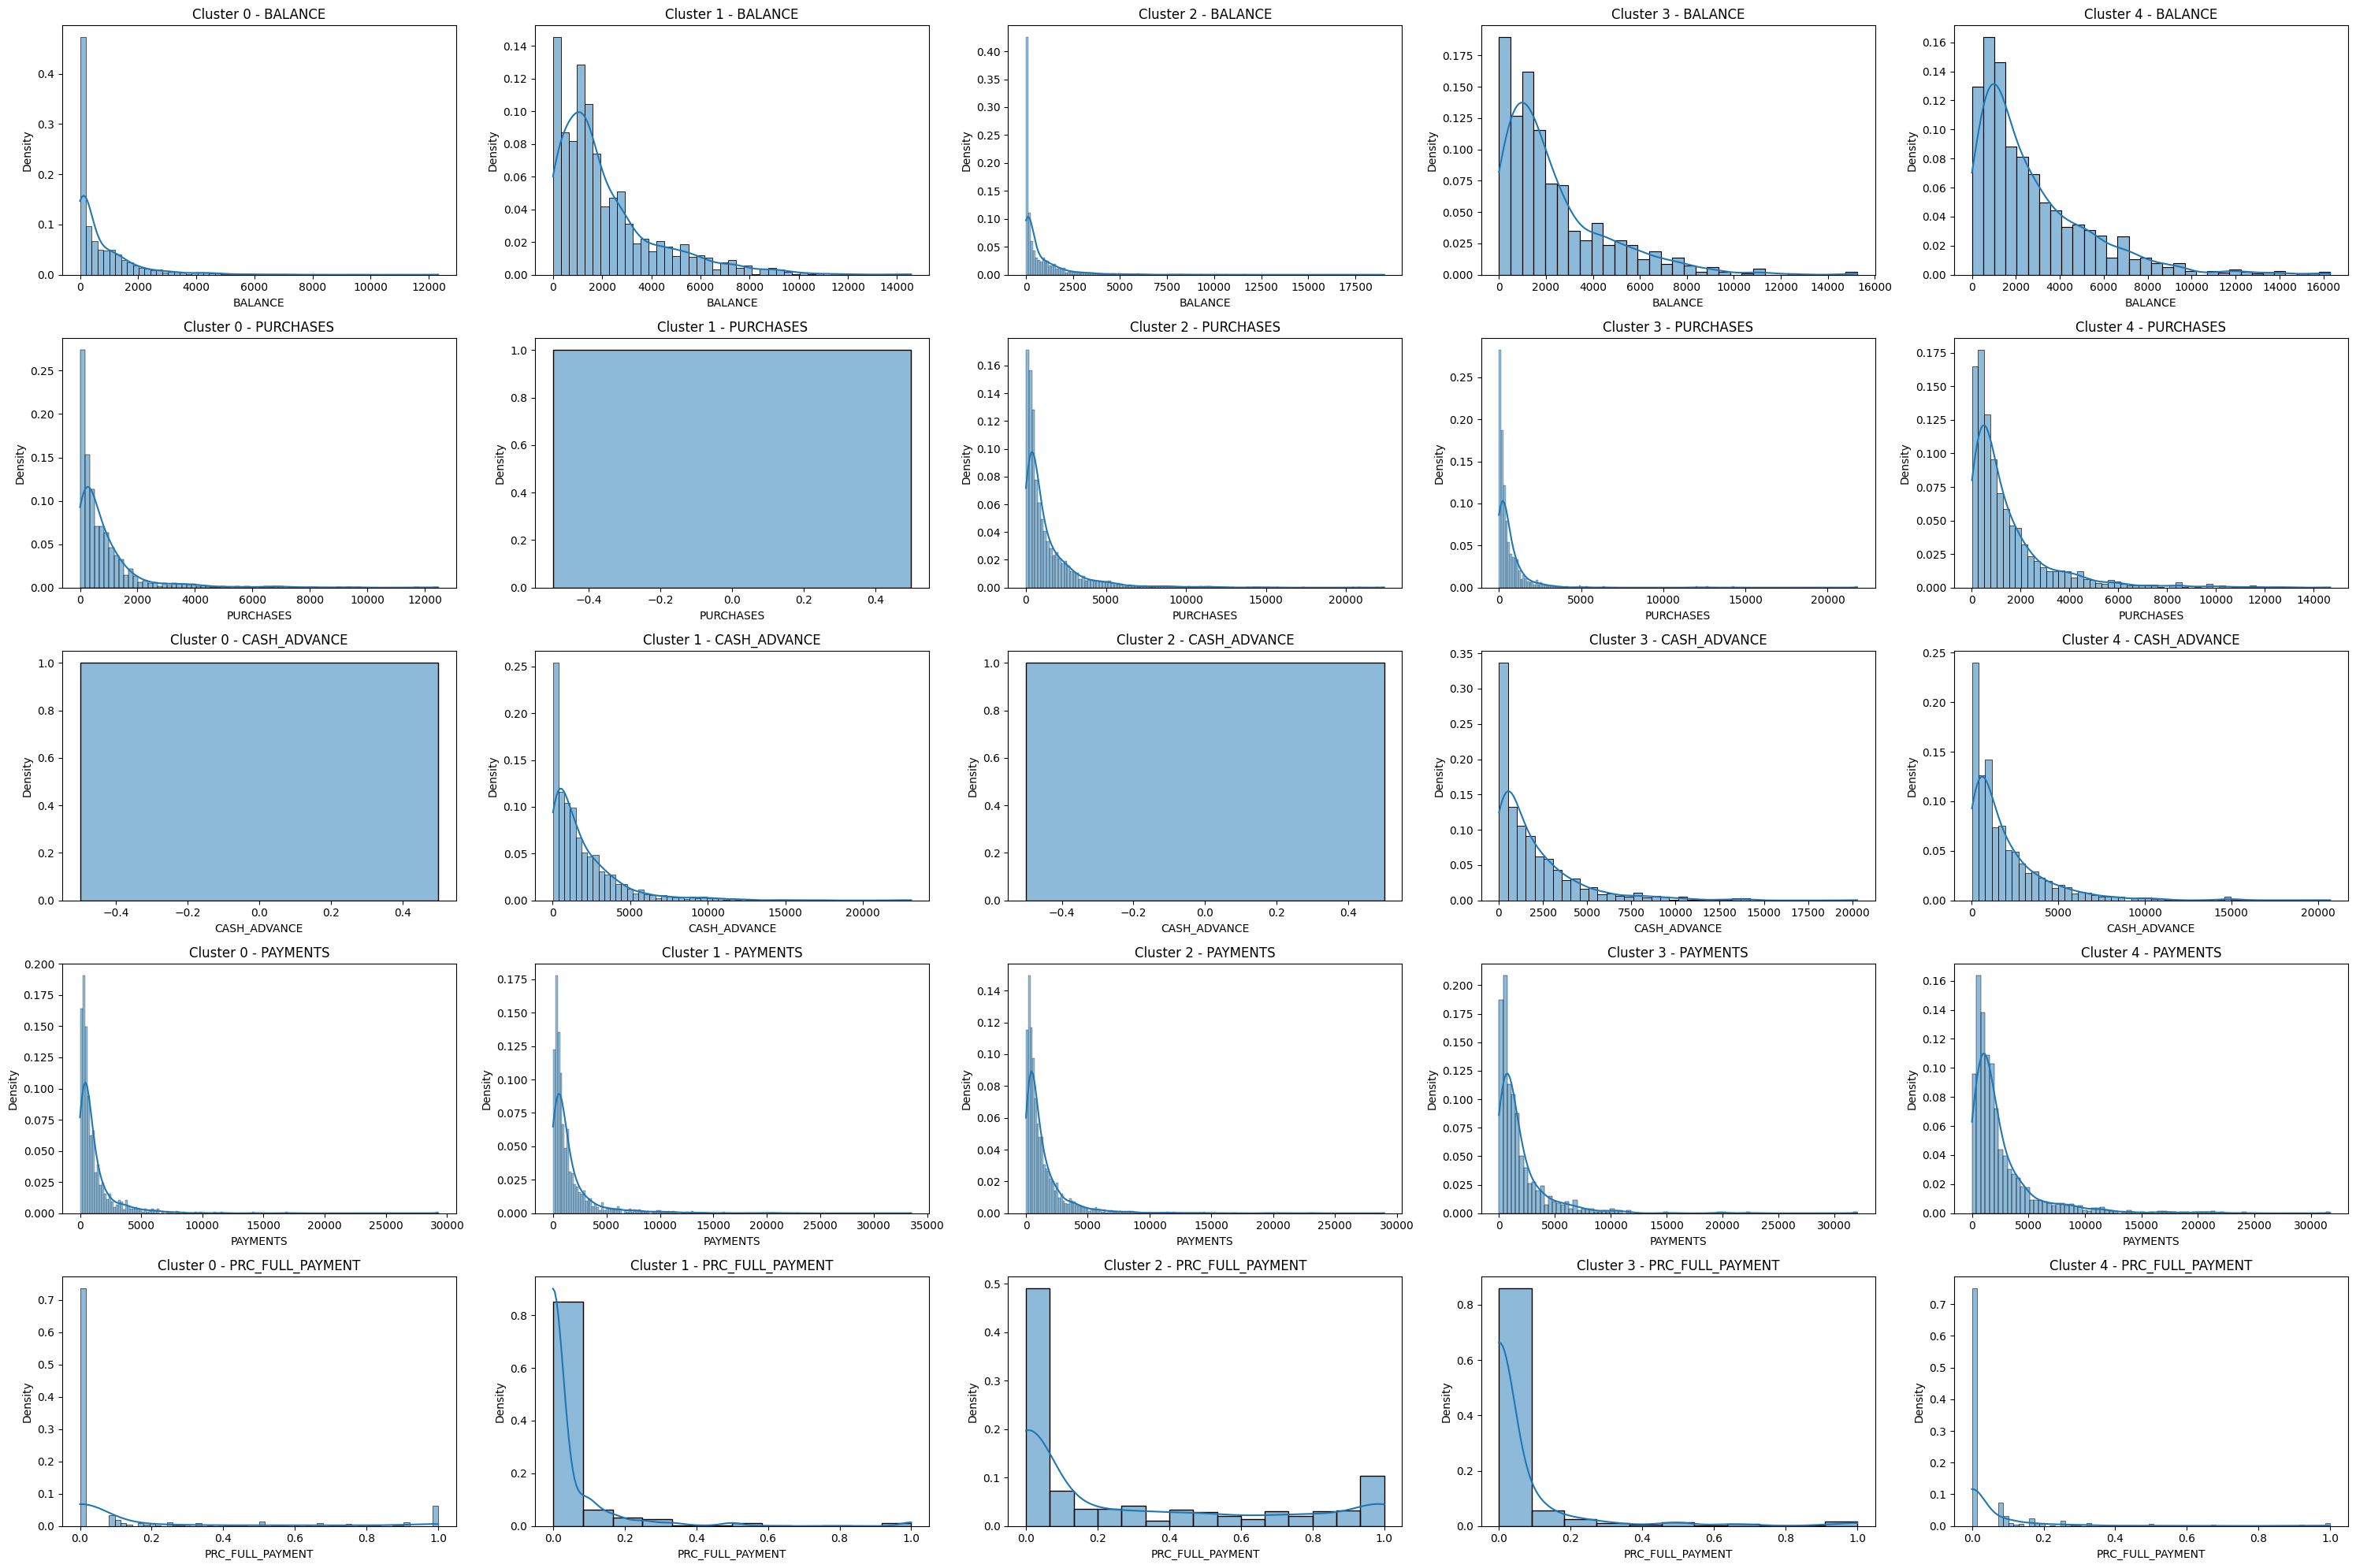

In [ ]:
columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'PRC_FULL_PAYMENT']
num_clusters = len(dfnew_copy2['pca_clusters'].unique())
fig, axes = plt.subplots(len(columns), num_clusters, figsize=(num_clusters * 6, len(columns) * 4))

for i, cluster_label in enumerate(sorted(dfnew_copy2['pca_clusters'].unique())):
    cluster_data = dfnew_copy2[dfnew_copy2['pca_clusters'] == cluster_label]
    for j, feature in enumerate(columns):
        sns.histplot(cluster_data[feature], kde=True, ax=axes[j, i], stat='proportion')
        axes[j, i].set_title(f'Cluster {cluster_label} - {feature}')
        axes[j, i].set_xlabel(feature)
        axes[j, i].set_ylabel('Density')

plt.tight_layout()
plt.show()


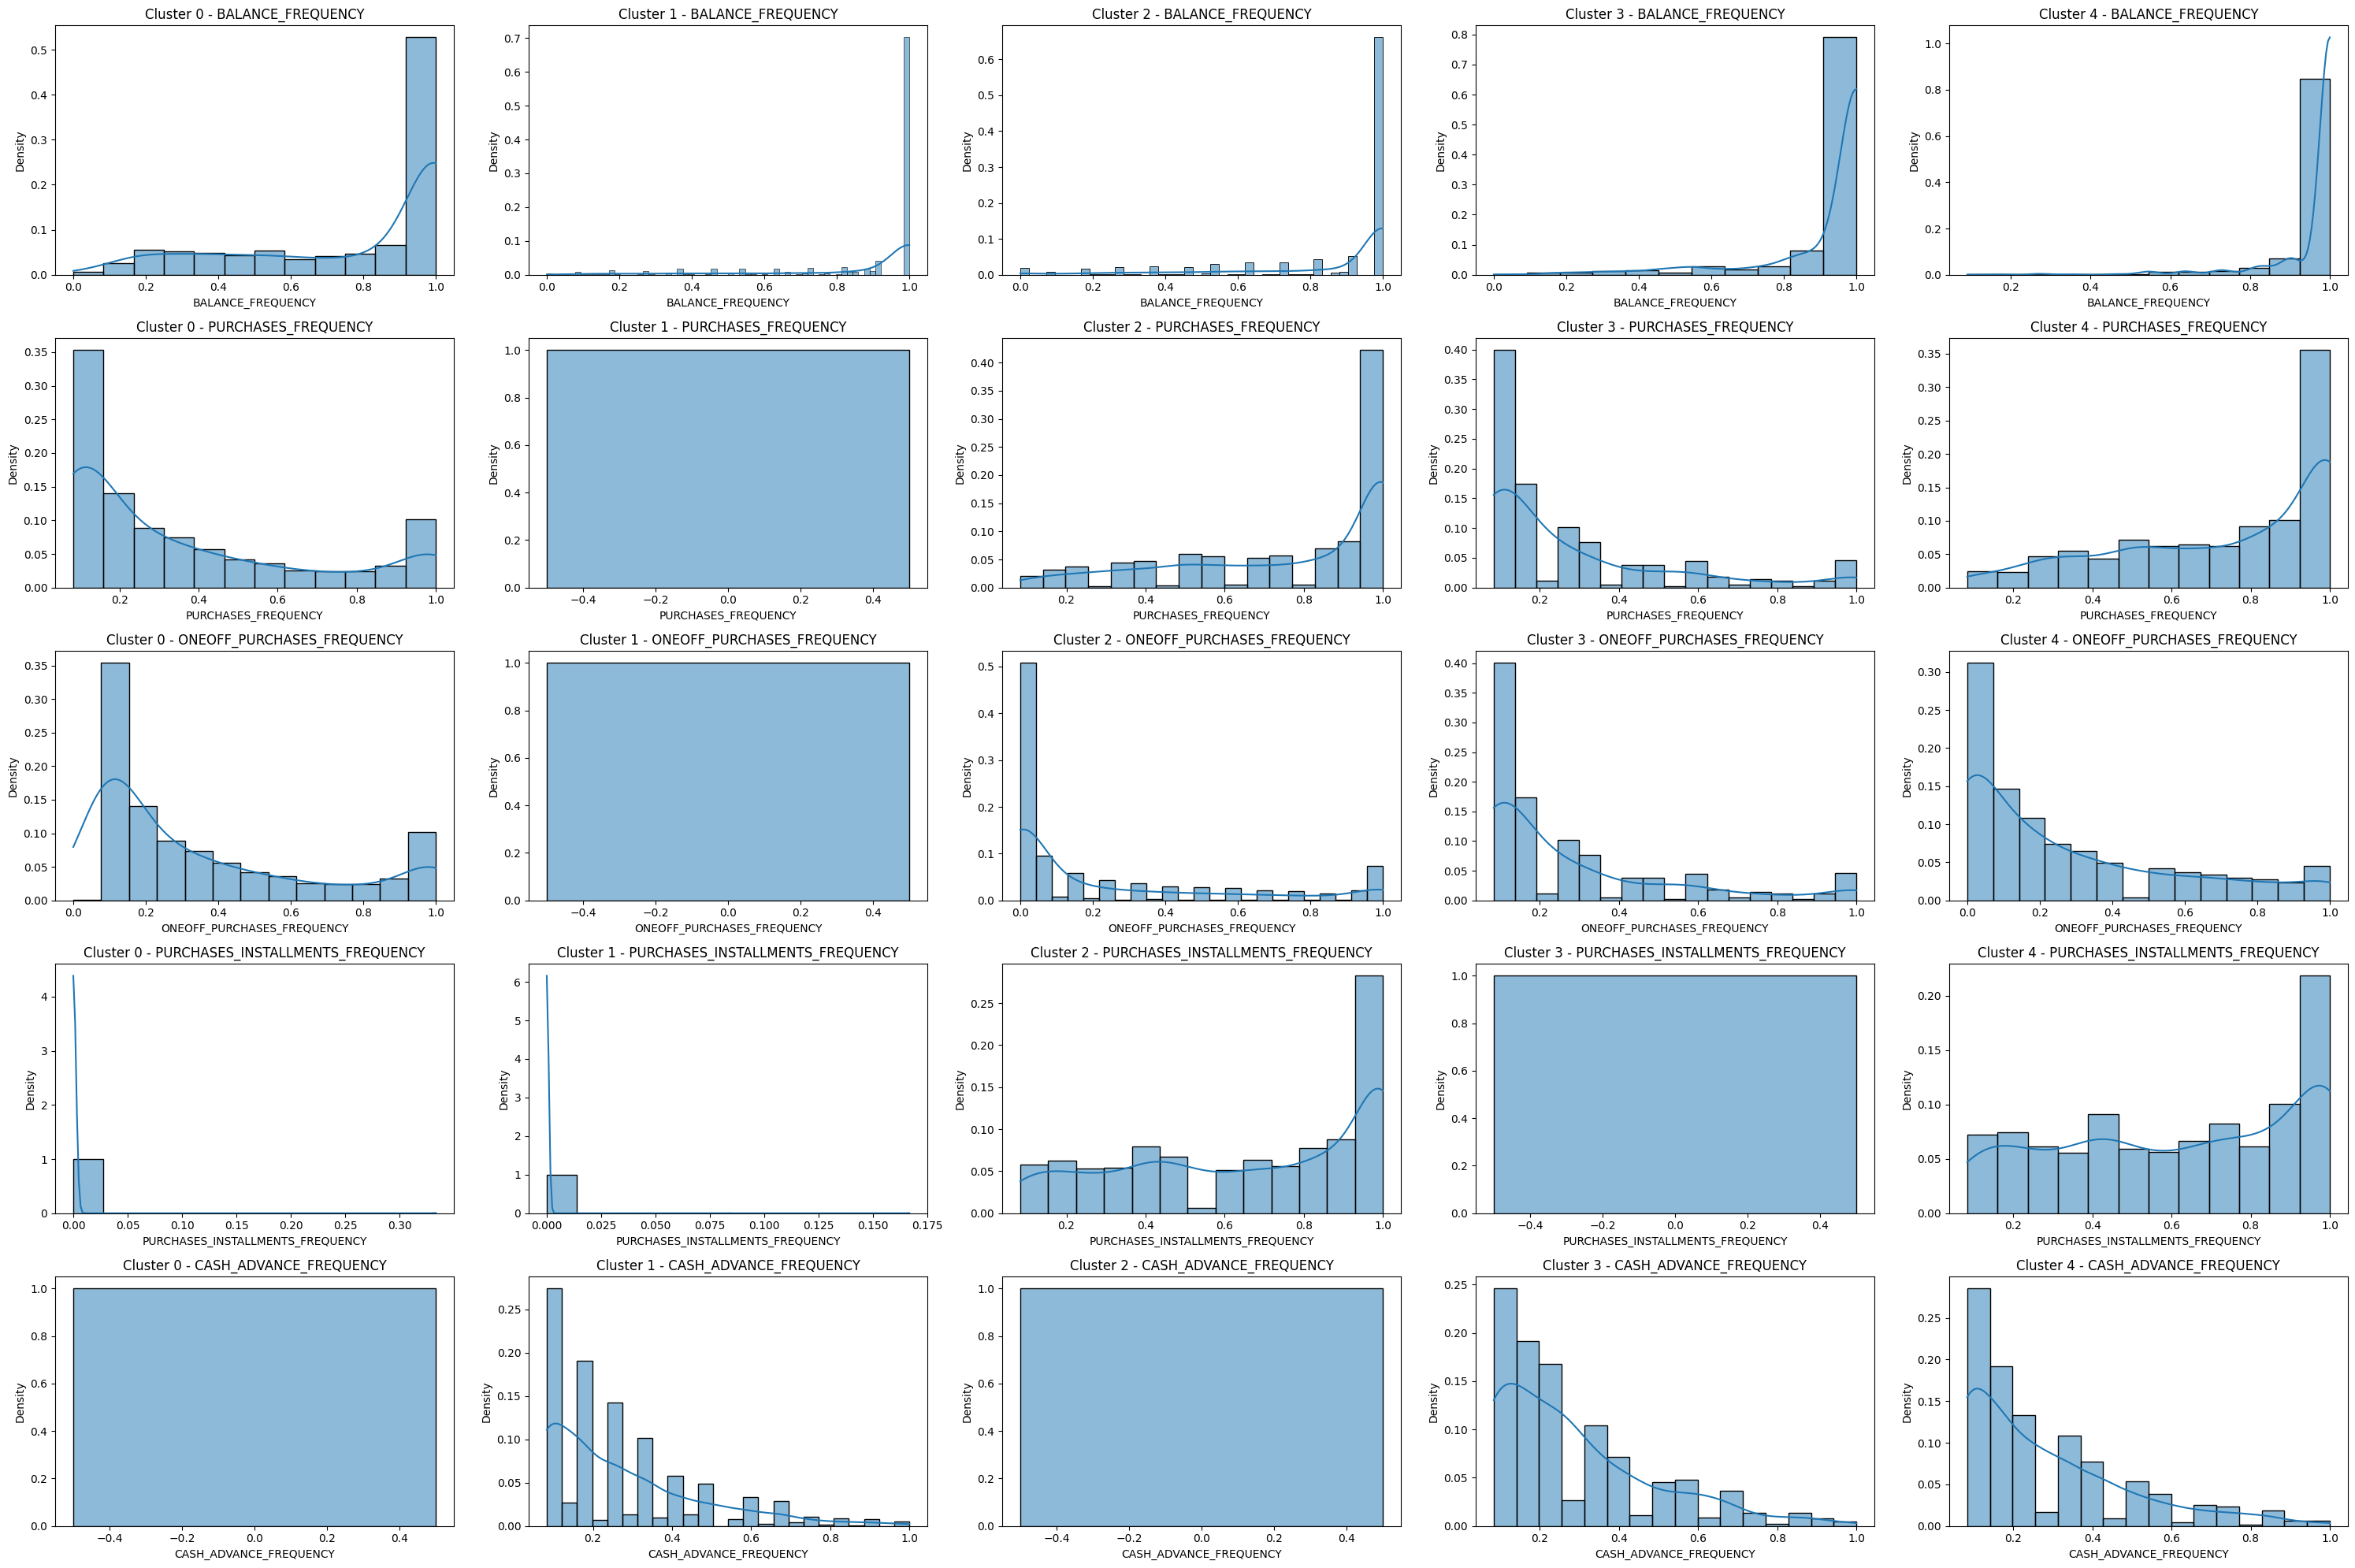

In [ ]:
columns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                   'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
num_clusters = len(dfnew_copy2['pca_clusters'].unique())
fig, axes = plt.subplots(len(columns), num_clusters, figsize=(num_clusters * 6, len(columns) * 4))

for i, cluster_label in enumerate(sorted(dfnew_copy2['pca_clusters'].unique())):
    cluster_data = dfnew_copy2[dfnew_copy2['pca_clusters'] == cluster_label]
    for j, feature in enumerate(columns):
        sns.histplot(cluster_data[feature], kde=True, ax=axes[j, i], stat='proportion')
        axes[j, i].set_title(f'Cluster {cluster_label} - {feature}')
        axes[j, i].set_xlabel(feature)
        axes[j, i].set_ylabel('Density')

plt.tight_layout()
plt.show()


cluster0<br>
users that have higher tendency to return payment and have higher purchase frequency

***cluster1***<br>
users that have zero purchases

***cluster2***<br>
Normal users that has balance in all features

***cluster3***<br>
same as cluster0 users that have low purchases and don't make any installment frequencies and they have low debt with no cash advance

***cluster4***<br>
users that have low purchases and don't make any installment frequencies

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance
    - Manhattan Distance
    - Mahalanobis distance
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

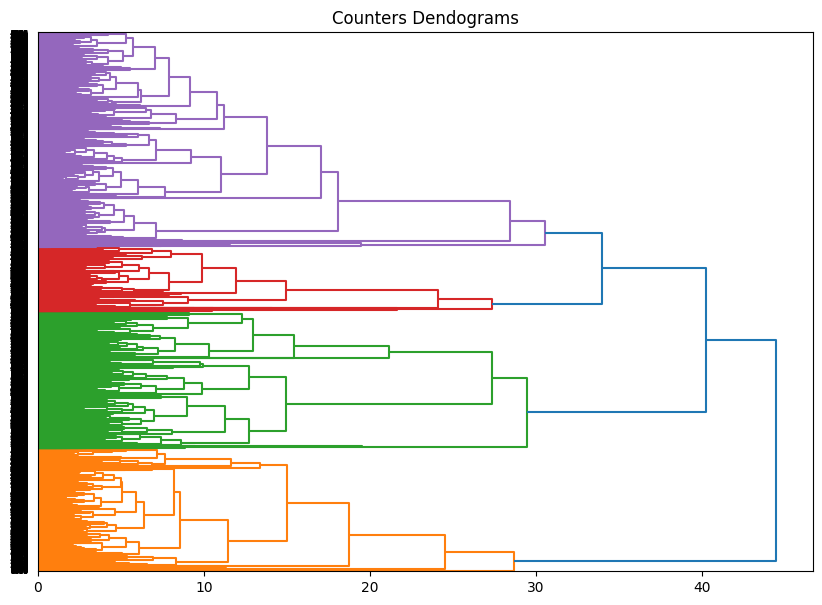

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=pca_data , method='complete',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=4)
model.fit(pca_data)



AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

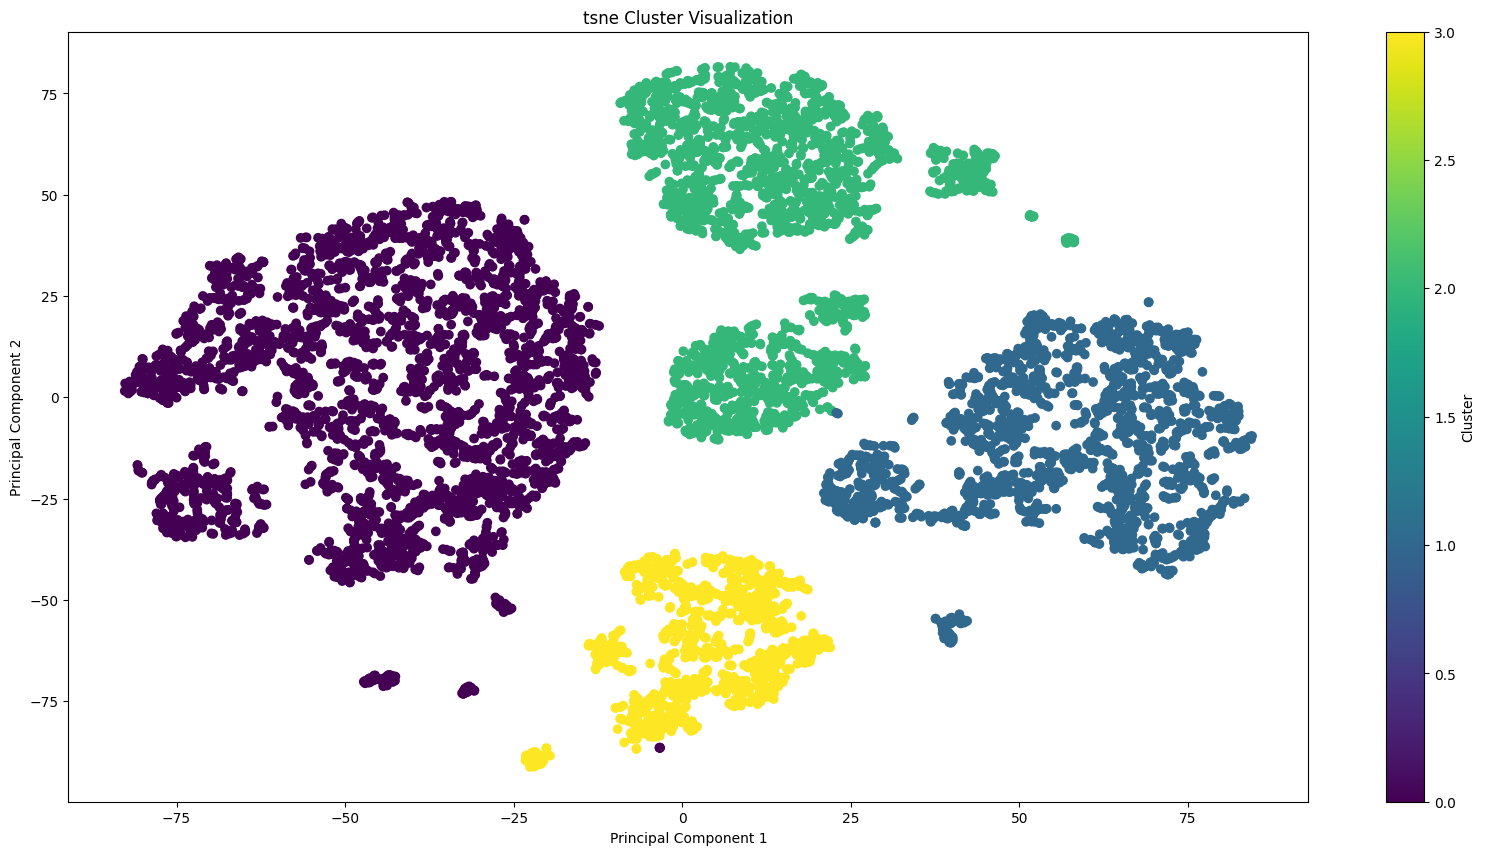

In [ ]:
draw_tsne(pca_data, c=model.labels_)

In [ ]:
dfnew_copy3 = dfnew_copy_original.copy()

In [ ]:
dfnew_copy3['hirarichal_clusters'] = model.labels_

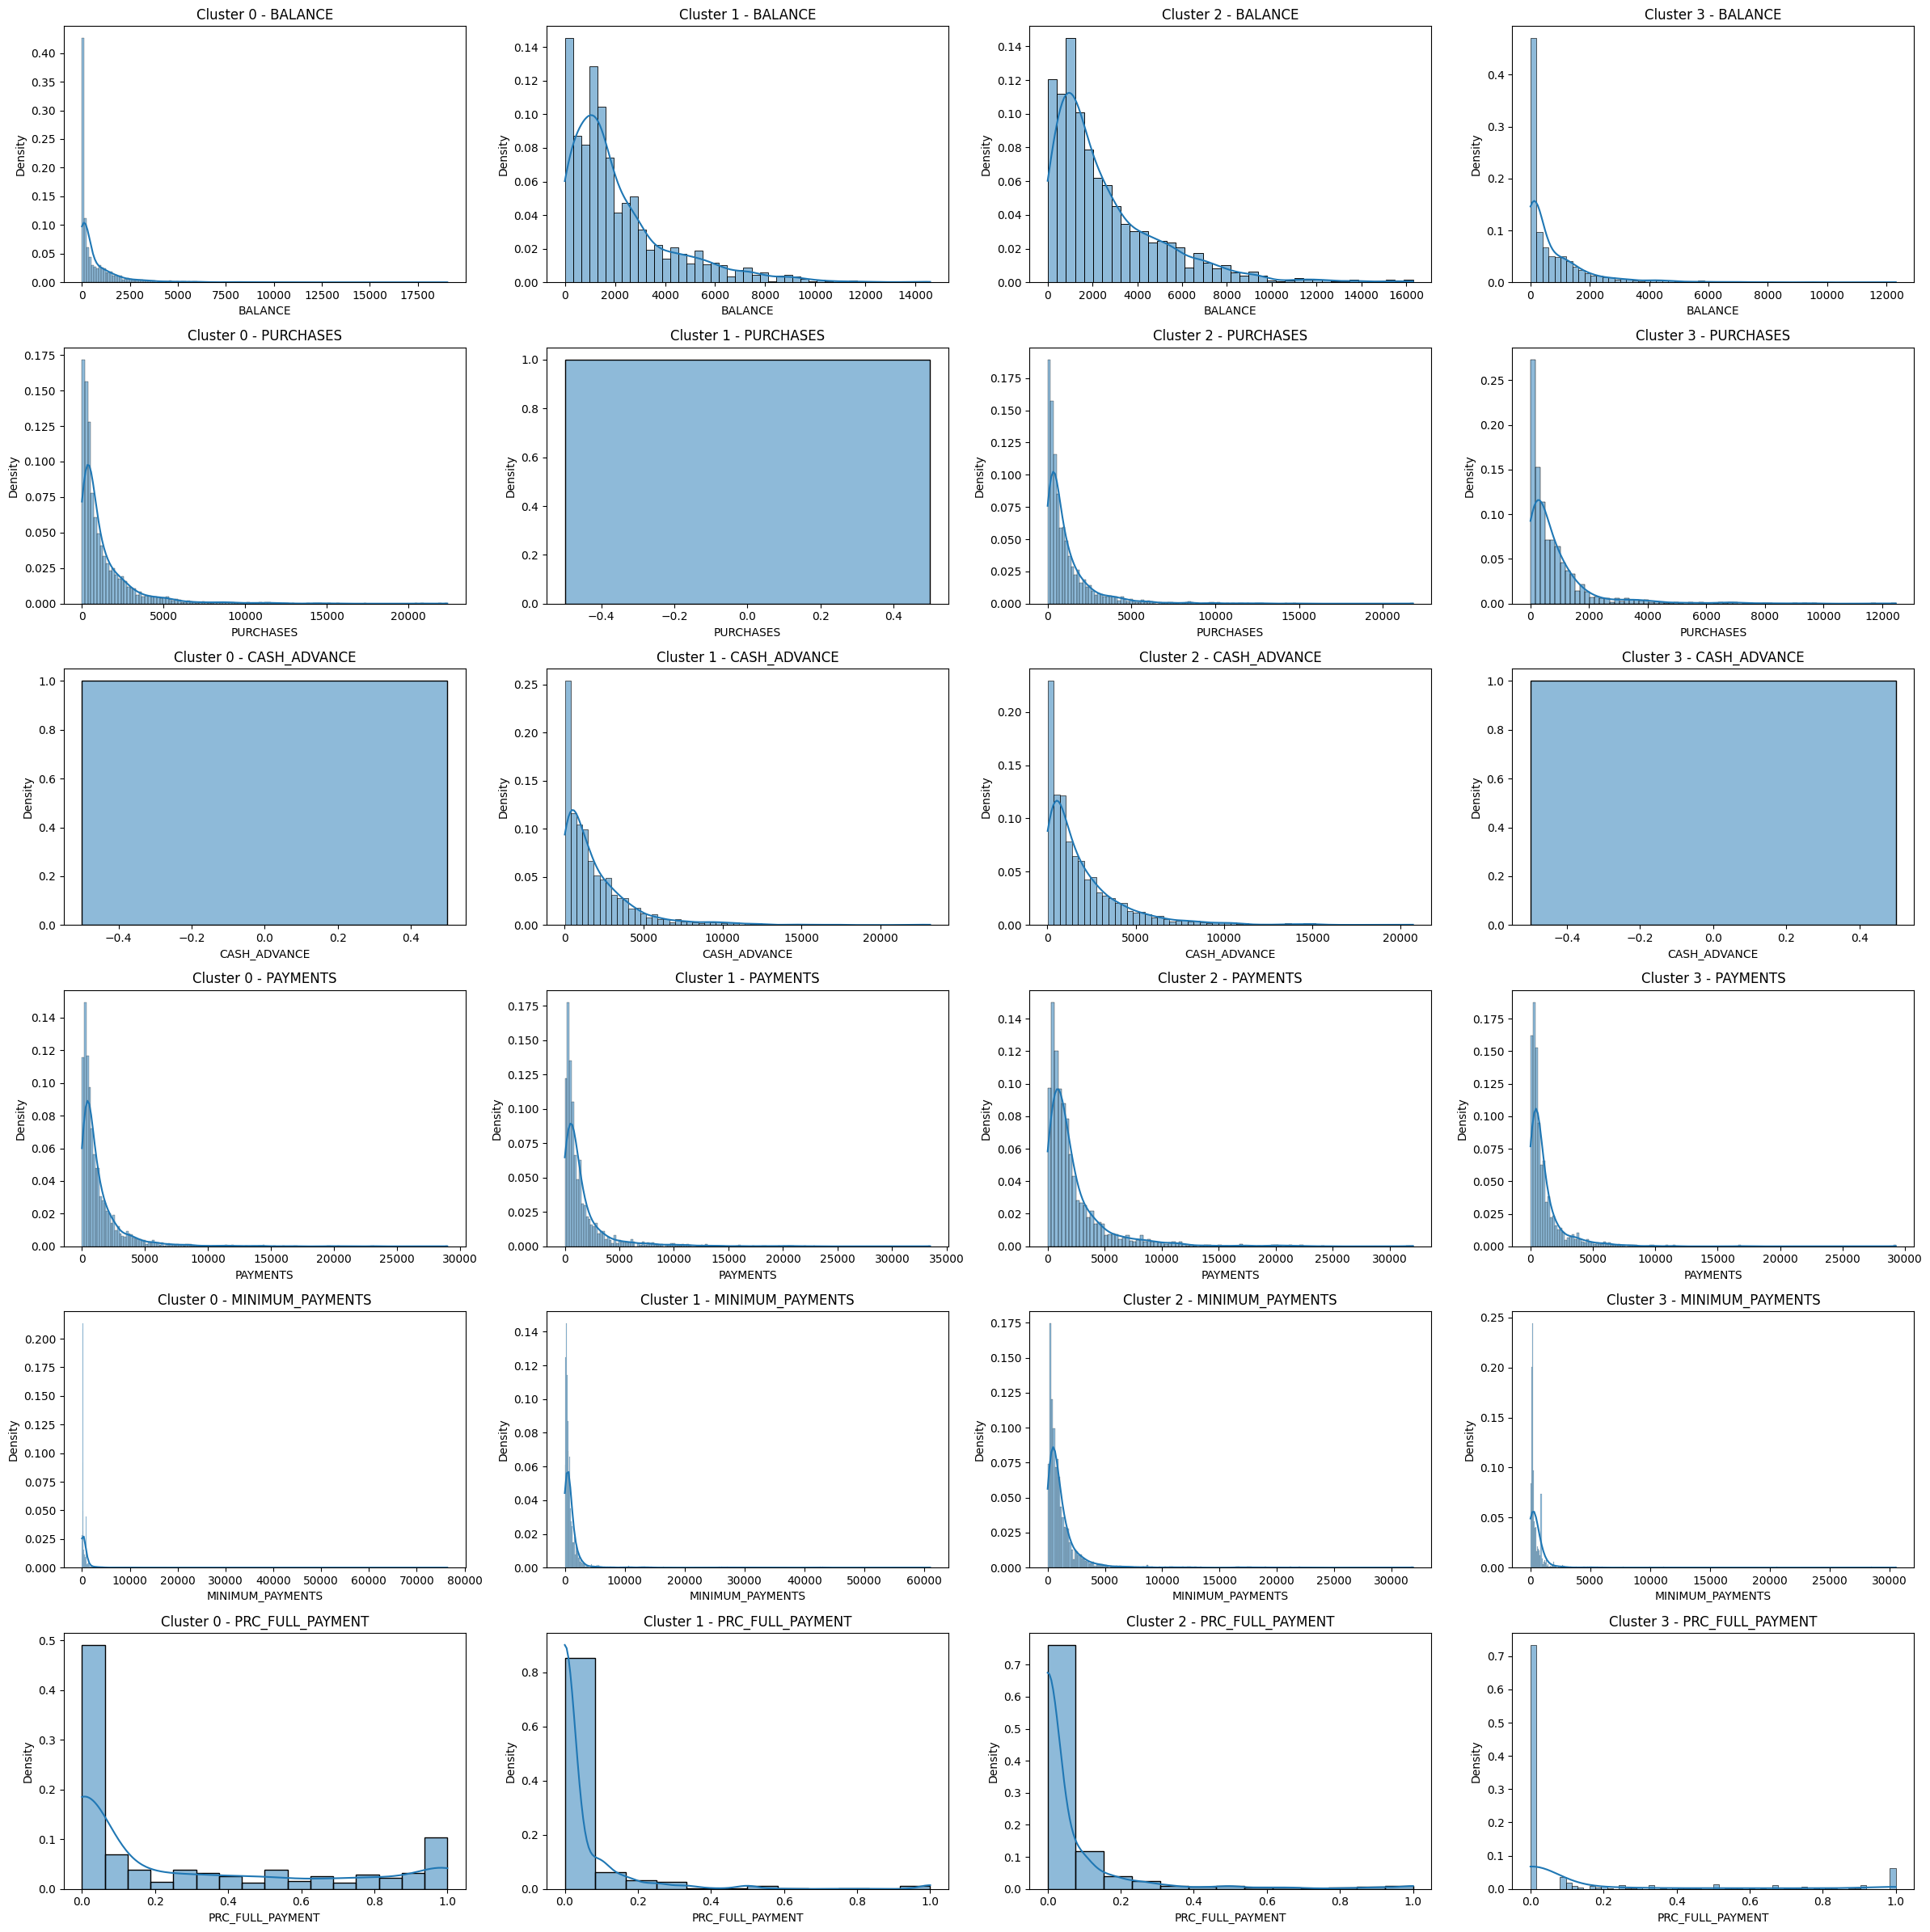

In [ ]:
columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
num_clusters = len(dfnew_copy3['hirarichal_clusters'].unique())
fig, axes = plt.subplots(len(columns), num_clusters, figsize=(num_clusters * 6, len(columns) * 4))

for i, cluster_label in enumerate(sorted(dfnew_copy3['hirarichal_clusters'].unique())):
    cluster_data = dfnew_copy3[dfnew_copy3['hirarichal_clusters'] == cluster_label]
    for j, feature in enumerate(columns):
        sns.histplot(cluster_data[feature], kde=True, ax=axes[j, i], stat='proportion')
        axes[j, i].set_title(f'Cluster {cluster_label} - {feature}')
        axes[j, i].set_xlabel(feature)
        axes[j, i].set_ylabel('Density')

plt.tight_layout()
plt.show()


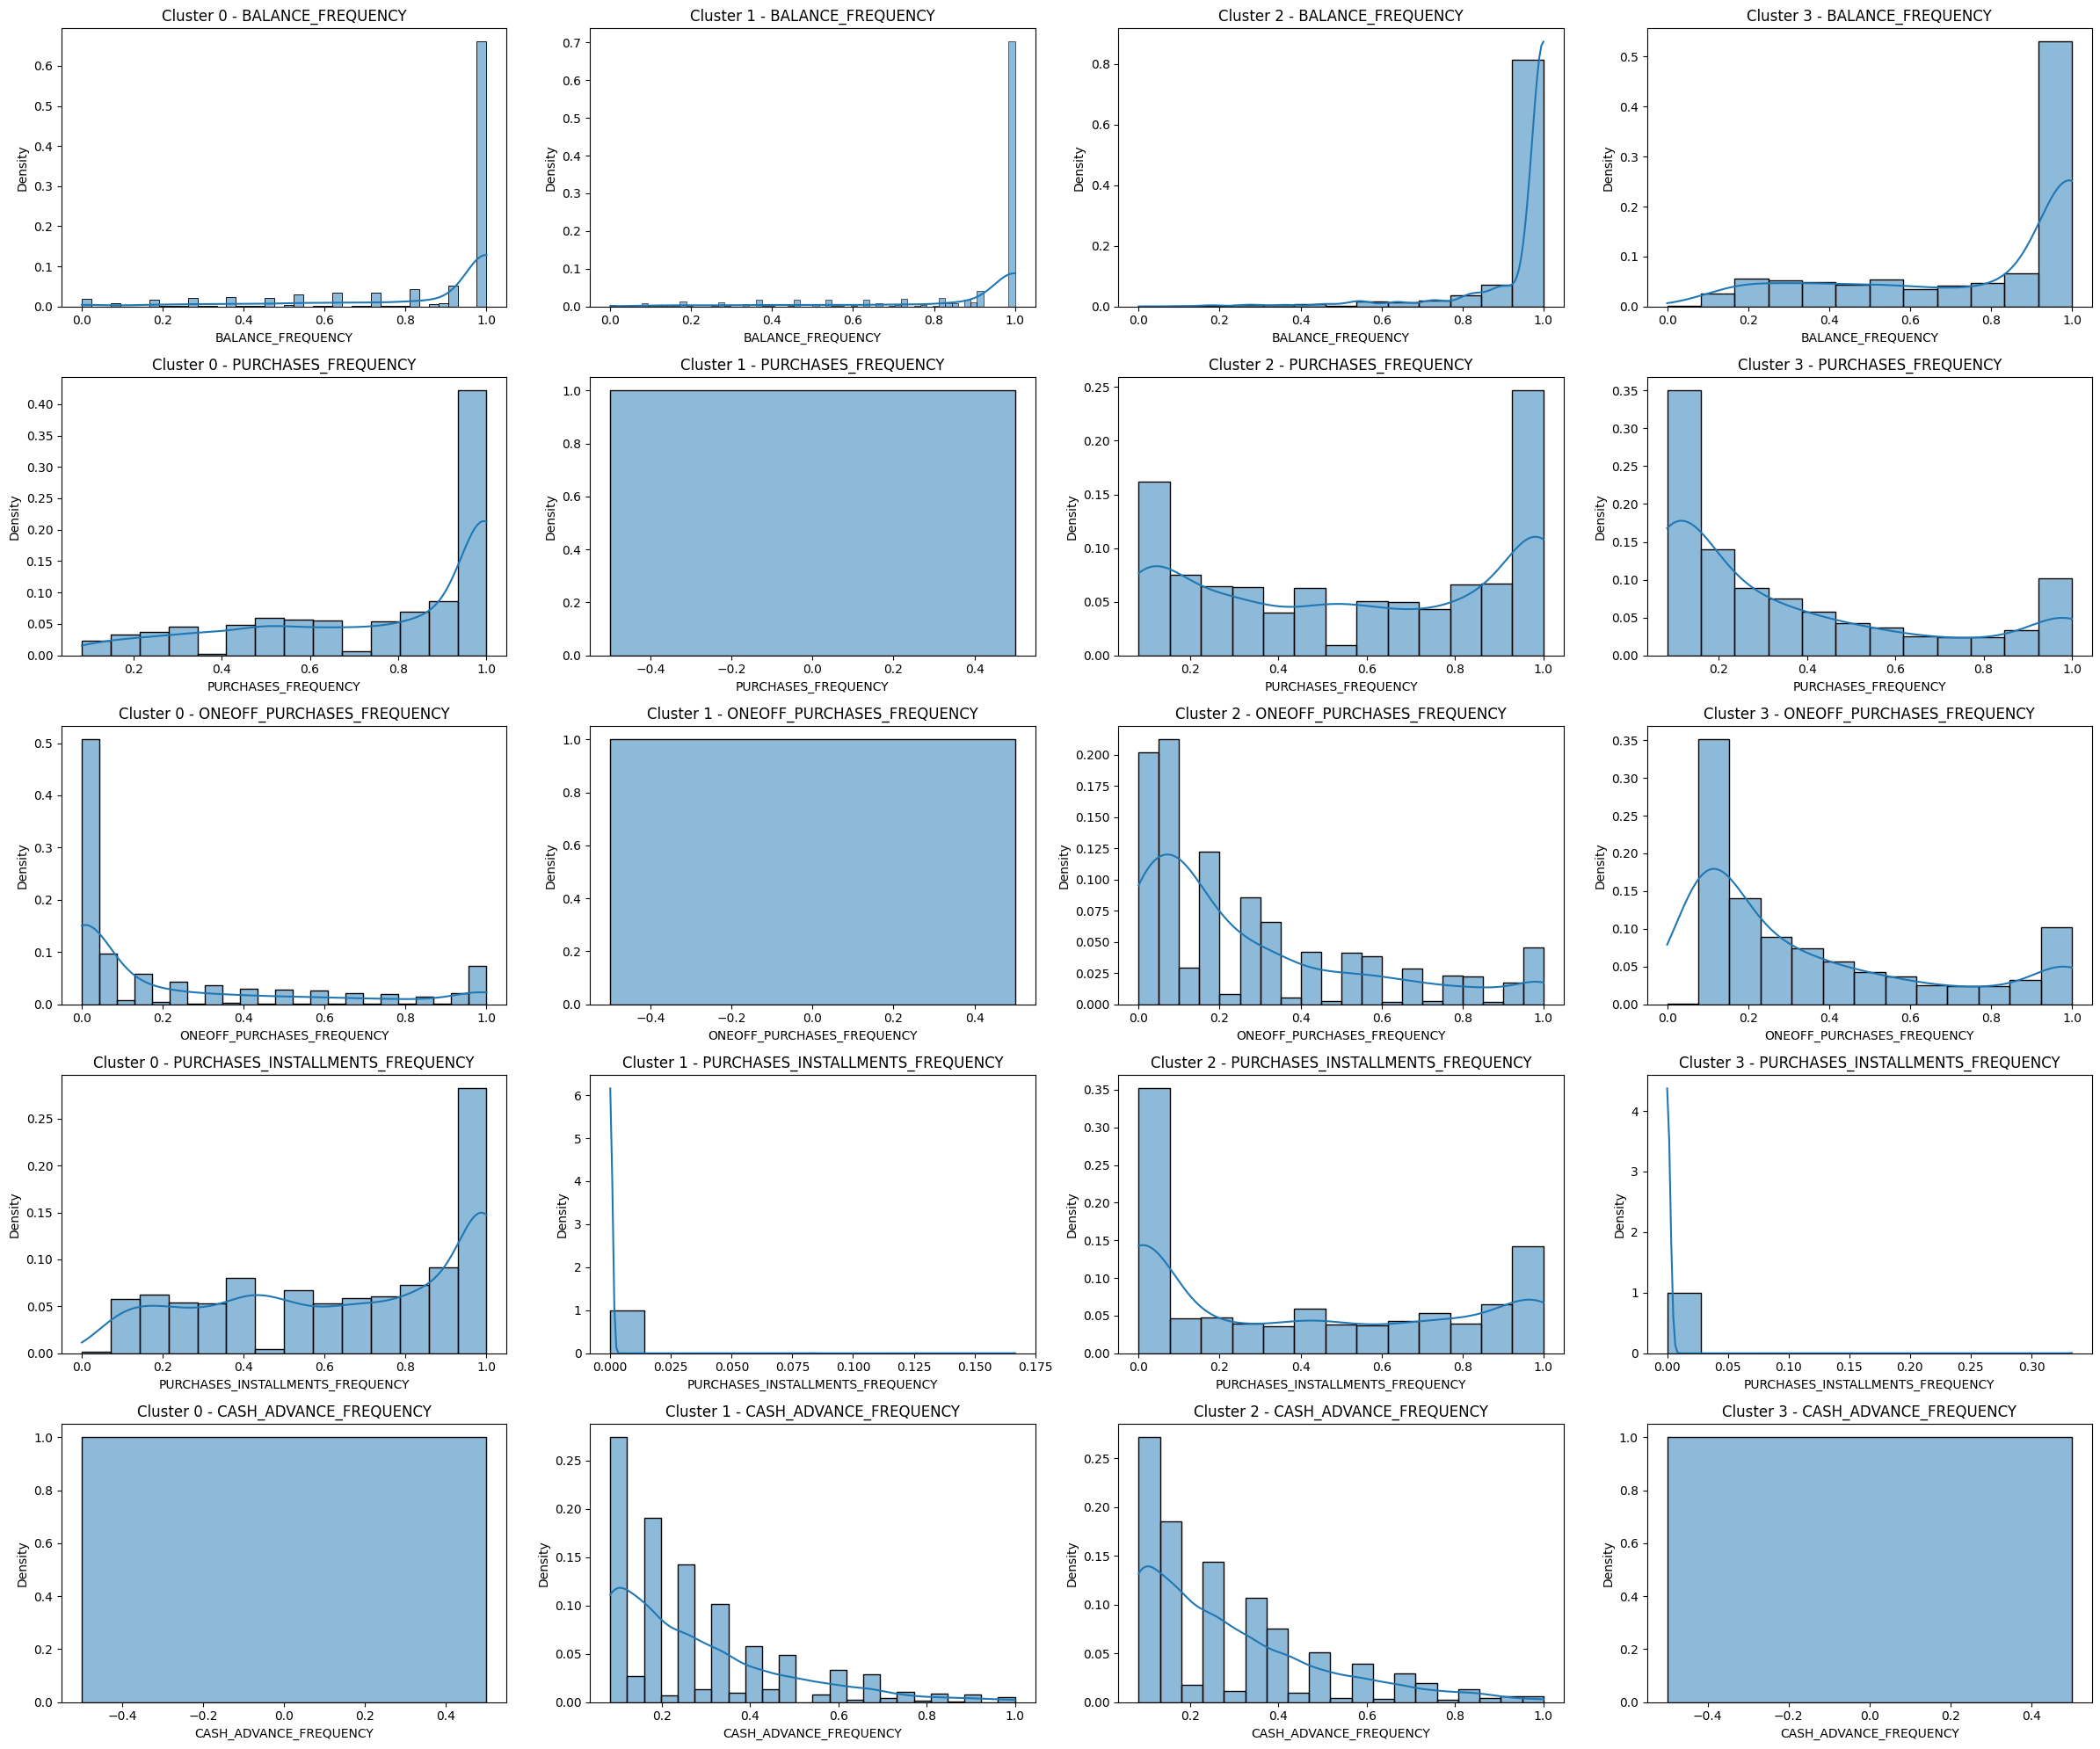

In [ ]:
columns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                   'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
num_clusters = len(dfnew_copy3['hirarichal_clusters'].unique())
fig, axes = plt.subplots(len(columns), num_clusters, figsize=(num_clusters * 6, len(columns) * 4))

for i, cluster_label in enumerate(sorted(dfnew_copy3['hirarichal_clusters'].unique())):
    cluster_data = dfnew_copy3[dfnew_copy3['hirarichal_clusters'] == cluster_label]
    for j, feature in enumerate(columns):
        sns.histplot(cluster_data[feature], kde=True, ax=axes[j, i], stat='proportion')
        axes[j, i].set_title(f'Cluster {cluster_label} - {feature}')
        axes[j, i].set_xlabel(feature)
        axes[j, i].set_ylabel('Density')

plt.tight_layout()
plt.show()


***cluster*** ***0***<br>
users that don't prefer cash and prefer installment


***cluster*** ***1***<br>
normal users balance in every feature


***cluster*** ***2***<br>
users with zero purchases


***cluster*** ***3***<br>
users that don't prefer cash or installment

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method

In [ ]:
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(dfnew)

In [ ]:
kmeans = KMeans(n_clusters=5 )
kmeans.fit(pca_data)

KMeans(n_clusters=5)

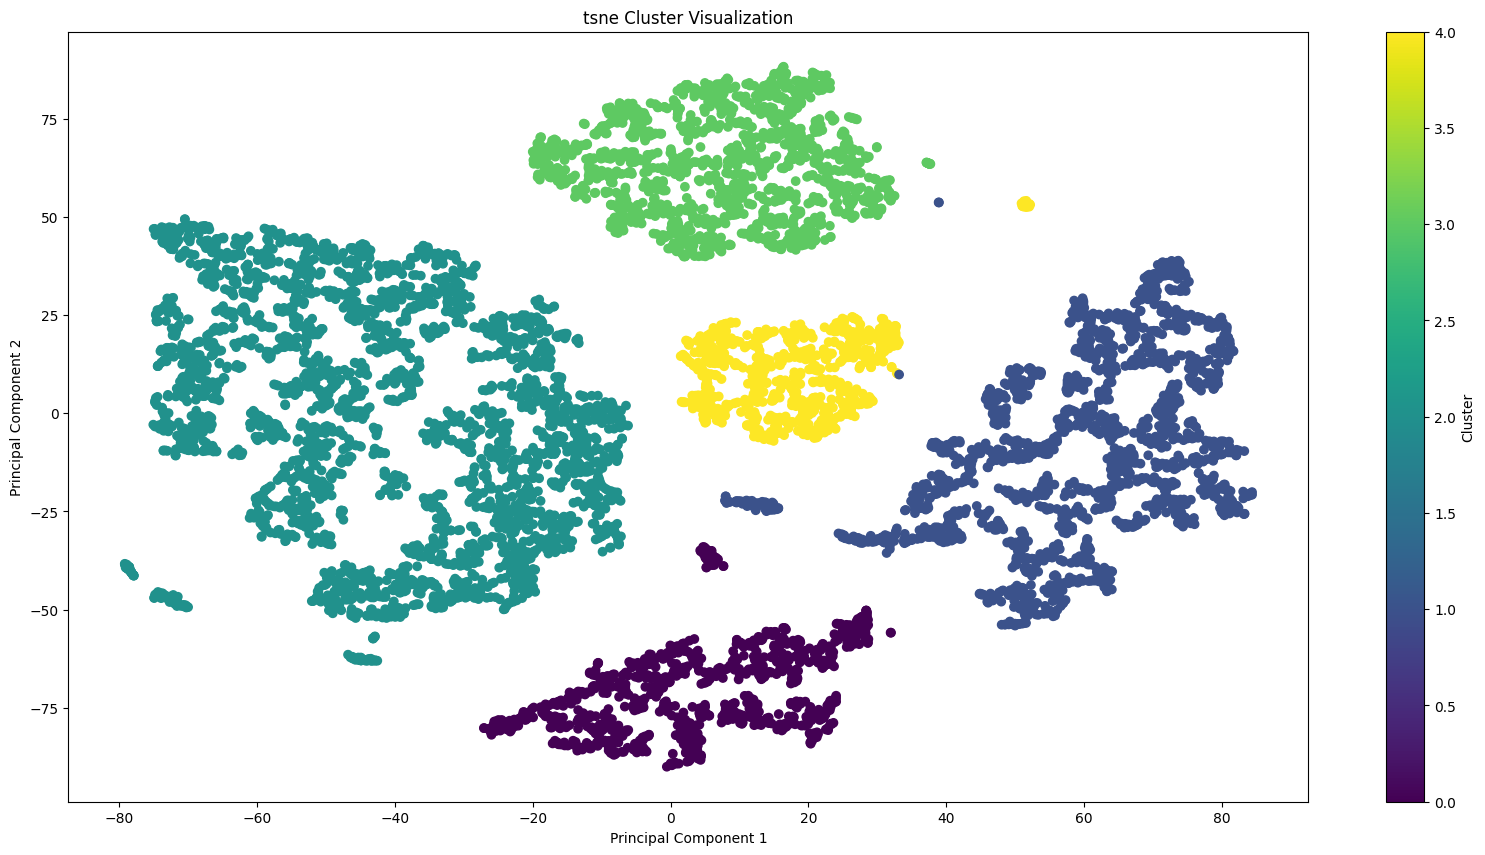

In [ ]:
draw_tsne(pca_data , c=kmeans.predict(pca_data))

In [ ]:
scaler = RobustScaler()
data_scaled = scaler.fit_transform(dfnew)

In [ ]:
kmeans8 = KMeans(n_clusters=3, random_state=0)
kmeans8.fit(data_scaled)

KMeans(n_clusters=3, random_state=0)

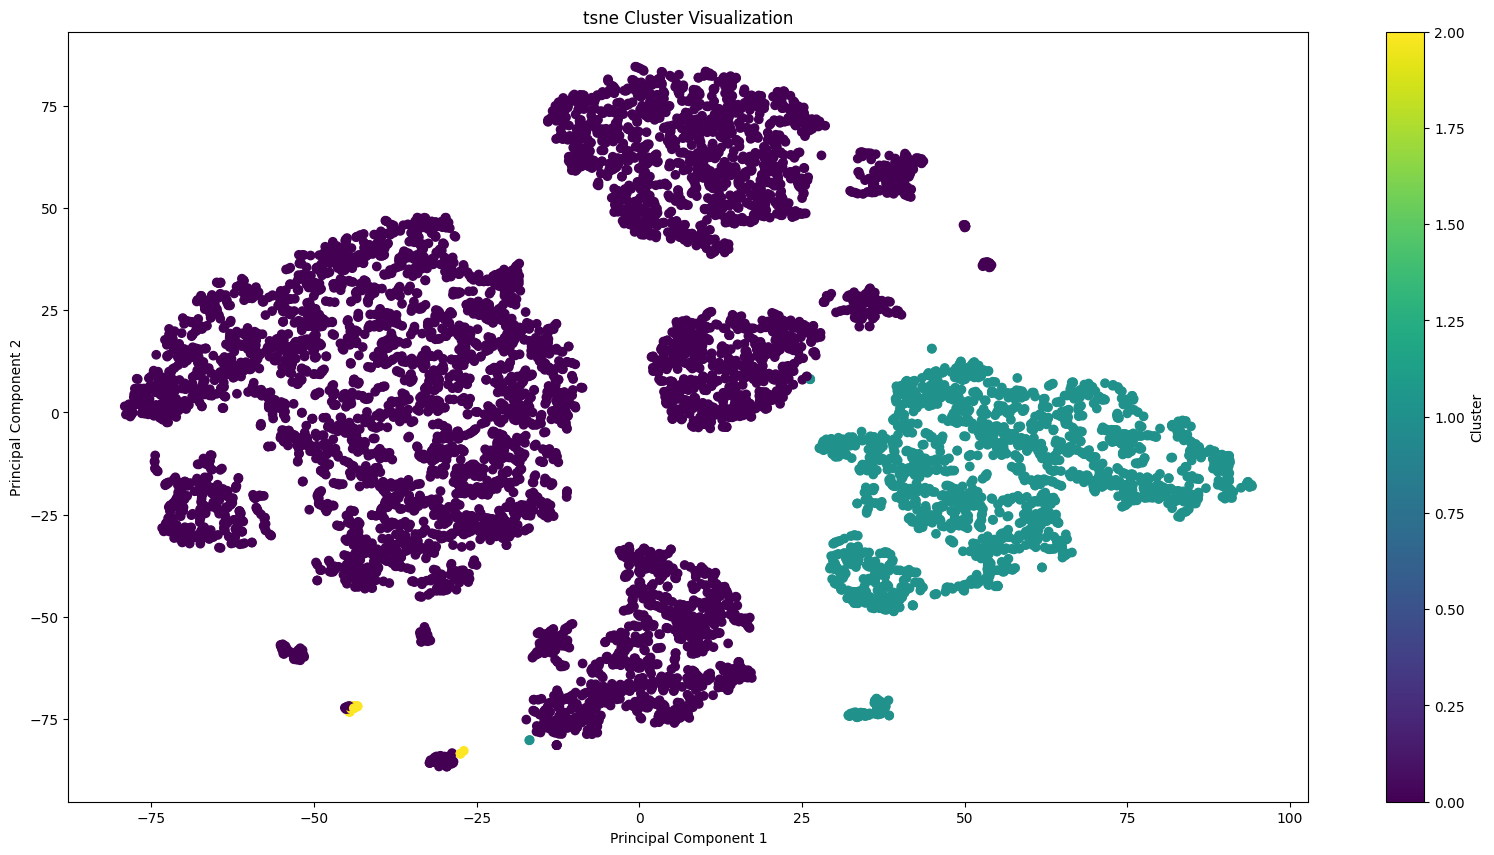

In [ ]:
draw_tsne(dfnew , kmeans8.predict(dfnew))

***Gap Statistics***

In [ ]:
from sklearn.metrics import silhouette_score
def calculate_gap_statistic(data, n_clusters_range):
    gaps = []
    for n_clusters in n_clusters_range:
        model = KMeans(n_clusters=n_clusters)
        model.fit(data)
        wcss = model.inertia_
        silhouette_avg = silhouette_score(data, model.labels_)
        gap = wcss - (silhouette_avg * data.shape[0])
        gaps.append(gap)
    return gaps


In [ ]:
n_clusters_range = range(2, 10)
gaps = calculate_gap_statistic(dfnew, n_clusters_range)


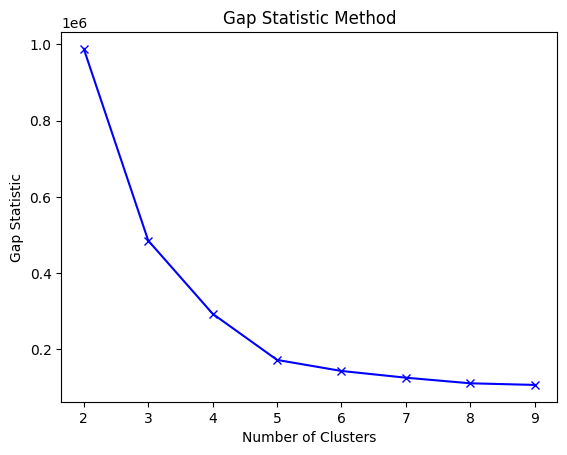

In [ ]:
# Plot the gap statistic for each number of clusters.
plt.plot(n_clusters_range, gaps, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic Method')
plt.show()